# Imports

In [1]:
#Library for the dataset manipulations.
import pandas as pd
#Libraries for encoding.
import numpy as np
from sklearn import preprocessing
#Library for split dataset for train.
from sklearn.model_selection import train_test_split
#Libraries for decision-tree based classification and report.
from sklearn import tree
from sklearn.metrics import classification_report
#Library for create a report about a dataframe.
from pandas_profiling import ProfileReport
#Library for oversampling.
from imblearn.over_sampling import SMOTE
#Libraries for Python Dash.
import dash
from dash import html
import plotly.graph_objects as go
from dash import dcc
import plotly.express as px
from dash.dependencies import Input, Output
#Libraries for random forest.
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
#Libraries for data visualization.
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")
import sys
#Libraries for feature selection.
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
#Library for KNN.
from sklearn.neighbors import KNeighborsClassifier

Setup Complete


# Functions

In [2]:
#Change a time in string type(1:30.300) to float(90.300).
def strTime_to_floatSec(strTime):
    if ':' not in strTime:
        return round(float(strTime), 3)
    else:
        strMin, strSec = strTime.split(':')
        floatSec = int(strMin) * 60 + float(strSec)
        return round(floatSec, 3)

In [3]:
#Change a time in float type(90.300) to string(1:30.300).
def floatSec_to_strTime(floatSec):
    time = ''
    minutes = int(floatSec / 60)
    sec = round(floatSec - minutes * 60, 3)
    strTime = str(minutes) + ":" + str(sec)
    if minutes != 0:
        return strTime
    else:
        return str(sec)

In [4]:
#Show the delta between two time(from string to float).
def time_difference(time_a, time_b):
    return round(strTime_to_floatSec(time_a) - strTime_to_floatSec(time_b), 3)

# Dataframe configurations

In [5]:
#Read the qualifications' datas.
Q = pd.read_csv('C:\Szakdolgozat\F1_Q_2006-2021_Clear.csv')
Q.head(5)

,Position,Number,First Name,Last Name,Short,Car,Q1,Q2,Q3,Laps,Track,Country,Day,Month,Month.1,Year
0,24,20,Karun,Chandhok,CHD,HRT Cosworth,1:40.578,NaN,NaN,7,Shanghai International Circuit,China,18,Apr,Apr,2010
1,24,25,Lucas,di Grassi,DIG,Virgin Cosworth,1:59.977,NaN,NaN,4,Sepang International Circuit,Malaysia,4,Apr,Apr,2010
2,24,12,Vitaly,Petrov,PET,Renault,NaN,NaN,NaN,1,Circuit de Spa-Francorchamps,Belgium,29,aug.,Aug,2010
3,24,20,Sakon,Yamamoto,YAM,HRT Cosworth,1:26.453,NaN,NaN,9,Hungaroring,Hungary,1,aug.,Aug,2010
4,24,21,Sakon,Yamamoto,YAM,HRT Cosworth,1:36.968,NaN,NaN,9,Silverstone Circuit,Great Britain,11,Jul,Jul,2010


Configurations of dates.

In [6]:
Q = Q.drop(columns = ['Month'])
Q = Q.rename(columns = {'Month.1': 'Month'})
Q.head(5)

,Position,Number,First Name,Last Name,Short,Car,Q1,Q2,Q3,Laps,Track,Country,Day,Month,Year
0,24,20,Karun,Chandhok,CHD,HRT Cosworth,1:40.578,NaN,NaN,7,Shanghai International Circuit,China,18,Apr,2010
1,24,25,Lucas,di Grassi,DIG,Virgin Cosworth,1:59.977,NaN,NaN,4,Sepang International Circuit,Malaysia,4,Apr,2010
2,24,12,Vitaly,Petrov,PET,Renault,NaN,NaN,NaN,1,Circuit de Spa-Francorchamps,Belgium,29,Aug,2010
3,24,20,Sakon,Yamamoto,YAM,HRT Cosworth,1:26.453,NaN,NaN,9,Hungaroring,Hungary,1,Aug,2010
4,24,21,Sakon,Yamamoto,YAM,HRT Cosworth,1:36.968,NaN,NaN,9,Silverstone Circuit,Great Britain,11,Jul,2010


In [7]:
Q.Month.unique()

array(['Apr', 'Aug', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep',
       'dec.'], dtype=object)

In [8]:
for idx in Q.index:
    if Q.loc[idx, 'Month'] == 'dec.':
        Q.loc[idx, 'Month'] = 'Dec'
Q.Month.unique()

array(['Apr', 'Aug', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep',
       'Dec'], dtype=object)

In [9]:
for idx in Q.index:
    if Q['Month'][idx] == 'Jan':
        Q.loc[idx, 'Month'] = 1
    if Q['Month'][idx] == 'Feb':
        Q.loc[idx, 'Month'] = 2
    if Q['Month'][idx] == 'Mar':
        Q.loc[idx, 'Month'] = 3
    if Q['Month'][idx] == 'Apr':
        Q.loc[idx, 'Month'] = 4
    if Q['Month'][idx] == 'May':
        Q.loc[idx, 'Month'] = 5
    if Q['Month'][idx] == 'Jun':
        Q.loc[idx, 'Month'] = 6
    if Q['Month'][idx] == 'Jul':
        Q.loc[idx, 'Month'] = 7
    if Q['Month'][idx] == 'Aug':
        Q.loc[idx, 'Month'] = 8
    if Q['Month'][idx] == 'Sep':
        Q.loc[idx, 'Month'] = 9
    if Q['Month'][idx] == 'Oct':
        Q.loc[idx, 'Month'] = 10
    if Q['Month'][idx] == 'Nov':
        Q.loc[idx, 'Month'] = 11
    if Q['Month'][idx] == 'Dec':
        Q.loc[idx, 'Month'] = 12
Q.head(5)

,Position,Number,First Name,Last Name,Short,Car,Q1,Q2,Q3,Laps,Track,Country,Day,Month,Year
0,24,20,Karun,Chandhok,CHD,HRT Cosworth,1:40.578,NaN,NaN,7,Shanghai International Circuit,China,18,4,2010
1,24,25,Lucas,di Grassi,DIG,Virgin Cosworth,1:59.977,NaN,NaN,4,Sepang International Circuit,Malaysia,4,4,2010
2,24,12,Vitaly,Petrov,PET,Renault,NaN,NaN,NaN,1,Circuit de Spa-Francorchamps,Belgium,29,8,2010
3,24,20,Sakon,Yamamoto,YAM,HRT Cosworth,1:26.453,NaN,NaN,9,Hungaroring,Hungary,1,8,2010
4,24,21,Sakon,Yamamoto,YAM,HRT Cosworth,1:36.968,NaN,NaN,9,Silverstone Circuit,Great Britain,11,7,2010


In [10]:
dates = []
for idx in Q.index:
    if Q.loc[idx, 'Month'] < 10 and Q.loc[idx, 'Day'] < 10:
        dates.append(str(Q['Year'][idx]) + '-0' + str(Q['Month'][idx]) + '-0' + str(Q['Day'][idx]))
        continue
    if Q.loc[idx, 'Month'] < 10 and Q.loc[idx, 'Day'] >= 10:
        dates.append(str(Q['Year'][idx]) + '-0' + str(Q['Month'][idx]) + '-' + str(Q['Day'][idx]))
        continue
    if Q.loc[idx, 'Month'] >= 10 and Q.loc[idx, 'Day'] < 10:
        dates.append(str(Q['Year'][idx]) + '-' + str(Q['Month'][idx]) + '-0' + str(Q['Day'][idx]))
        continue
    if Q.loc[idx, 'Month'] >= 10 and Q.loc[idx, 'Day'] >= 10:
        dates.append(str(Q['Year'][idx]) + '-' + str(Q['Month'][idx]) + '-' + str(Q['Day'][idx]))
        continue
Q['Date'] = dates
Q.head(5)

,Position,Number,First Name,Last Name,Short,Car,Q1,Q2,Q3,Laps,Track,Country,Day,Month,Year,Date
0,24,20,Karun,Chandhok,CHD,HRT Cosworth,1:40.578,NaN,NaN,7,Shanghai International Circuit,China,18,4,2010,2010-04-18
1,24,25,Lucas,di Grassi,DIG,Virgin Cosworth,1:59.977,NaN,NaN,4,Sepang International Circuit,Malaysia,4,4,2010,2010-04-04
2,24,12,Vitaly,Petrov,PET,Renault,NaN,NaN,NaN,1,Circuit de Spa-Francorchamps,Belgium,29,8,2010,2010-08-29
3,24,20,Sakon,Yamamoto,YAM,HRT Cosworth,1:26.453,NaN,NaN,9,Hungaroring,Hungary,1,8,2010,2010-08-01
4,24,21,Sakon,Yamamoto,YAM,HRT Cosworth,1:36.968,NaN,NaN,9,Silverstone Circuit,Great Britain,11,7,2010,2010-07-11


Configurations of names.

In [11]:
names = []
for idx in Q.index:
    names.append(Q['First Name'][idx] + ' ' + Q['Last Name'][idx])
Q['Name'] = names
Q = Q.drop(columns = ['Last Name', 'First Name'])
Q.head(5)

,Position,Number,Short,Car,Q1,Q2,Q3,Laps,Track,Country,Day,Month,Year,Date,Name
0,24,20,CHD,HRT Cosworth,1:40.578,NaN,NaN,7,Shanghai International Circuit,China,18,4,2010,2010-04-18,Karun Chandhok
1,24,25,DIG,Virgin Cosworth,1:59.977,NaN,NaN,4,Sepang International Circuit,Malaysia,4,4,2010,2010-04-04,Lucas di Grassi
2,24,12,PET,Renault,NaN,NaN,NaN,1,Circuit de Spa-Francorchamps,Belgium,29,8,2010,2010-08-29,Vitaly Petrov
3,24,20,YAM,HRT Cosworth,1:26.453,NaN,NaN,9,Hungaroring,Hungary,1,8,2010,2010-08-01,Sakon Yamamoto
4,24,21,YAM,HRT Cosworth,1:36.968,NaN,NaN,9,Silverstone Circuit,Great Britain,11,7,2010,2010-07-11,Sakon Yamamoto


Configurations of locations.

In [12]:
Q.Country.unique()

array(['China', 'Malaysia', 'Belgium', 'Hungary', 'Great Britain',
       'Germany', 'Canada', 'Spain', 'Bahrain', 'Australia', 'Turkey',
       'Abu Dhabi', 'Brazil', 'Japan', 'South Korea', 'Singapore',
       'Italy', 'India', 'United States', 'Monaco', 'San Marino',
       'France', 'Austria', 'Sakhir', 'Hockenheim', 'Spielberg', 'Baku',
       'Melbourne', 'Sochi', 'Catalunya', 'Yas Marina', 'São Paulo',
       'Kuala Lumpur', 'Austin', 'Suzuka', 'Monza', 'Shanghai',
       'Spa-Francorchamps', 'Budapest', 'Monte Carlo', 'Russia',
       'Silverstone', 'Montréal', 'Mexico City', 'Le Castellet',
       'Yas Island', 'Barcelona', 'Istanbul', 'Imola', 'Portimão',
       'Nürburgring', 'Mugello', 'Zandvoort'], dtype=object)

In [13]:
Q = Q.drop(columns = ['Country'])
Q.head(5)

,Position,Number,Short,Car,Q1,Q2,Q3,Laps,Track,Day,Month,Year,Date,Name
0,24,20,CHD,HRT Cosworth,1:40.578,NaN,NaN,7,Shanghai International Circuit,18,4,2010,2010-04-18,Karun Chandhok
1,24,25,DIG,Virgin Cosworth,1:59.977,NaN,NaN,4,Sepang International Circuit,4,4,2010,2010-04-04,Lucas di Grassi
2,24,12,PET,Renault,NaN,NaN,NaN,1,Circuit de Spa-Francorchamps,29,8,2010,2010-08-29,Vitaly Petrov
3,24,20,YAM,HRT Cosworth,1:26.453,NaN,NaN,9,Hungaroring,1,8,2010,2010-08-01,Sakon Yamamoto
4,24,21,YAM,HRT Cosworth,1:36.968,NaN,NaN,9,Silverstone Circuit,11,7,2010,2010-07-11,Sakon Yamamoto


In [14]:
Q.Track.unique()

array(['Shanghai International Circuit', 'Sepang International Circuit',
       'Circuit de Spa-Francorchamps', 'Hungaroring',
       'Silverstone Circuit', 'Hockenheimring',
       'Circuit Gilles-Villeneuve', 'Valencia Street Circuit',
       'Bahrain International Circuit', 'Melbourne Grand Prix Circuit',
       'Istanbul Park', 'Circuit de Catalunya', 'Yas Marina Circuit',
       'Autódromo José Carlos Pace', 'Suzuka International Racing Course',
       'Korean International Circuit', 'Marina Bay Street Circuit',
       'Autodromo Nazionale Monza', 'Buddh International Circuit',
       'Circuit of The Americas', 'Circuit de Monaco', 'Nürburgring',
       'Autodromo Enzo e Dino Ferrari', 'Circuit de Nevers Magny-Cours',
       'Indianapolis Motor Speedway', 'Fuji Speedway',
       'Circuit de Barcelona-Catalunya', 'Red Bull Ring',
       'Baku City Circuit', 'Sochi Autodrom',
       'Autódromo Hermanos Rodríguez', 'Circuit Paul Ricard',
       'Bahrain International Circuit – Outer 

In [15]:
lengths = []
for idx in Q.index:
    if Q.loc[idx, 'Track'] == 'Shanghai International Circuit':
        Q.loc[idx, 'Track'] = 'China'
        lengths.append(5451)
        continue
    if Q.loc[idx, 'Track'] == 'Sepang International Circuit':
        Q.loc[idx, 'Track'] = 'Malaysia'
        lengths.append(5543)
        continue
    if Q.loc[idx, 'Track'] == 'Circuit de Spa-Francorchamps':
        Q.loc[idx, 'Track'] = 'Belgium'
        lengths.append(7004)
        continue
    if Q.loc[idx, 'Track'] == 'Hungaroring':
        Q.loc[idx, 'Track'] = 'Hungary'
        lengths.append(4381)
        continue
    if Q.loc[idx, 'Track'] == 'Silverstone Circuit' and Q.loc[idx, 'Year'] > 2009:
        Q.loc[idx, 'Track'] = 'England'
        lengths.append(5891)
        continue
    if Q.loc[idx, 'Track'] == 'Silverstone Circuit' and Q.loc[idx, 'Year'] <= 2009:
        Q.loc[idx, 'Track'] = 'EnglandOld'
        lengths.append(5141)
        continue
    if Q.loc[idx, 'Track'] == 'Hockenheimring':
        Q.loc[idx, 'Track'] = 'Hockenheim'
        lengths.append(4574)
        continue
    if Q.loc[idx, 'Track'] == 'Circuit Gilles-Villeneuve':
        Q.loc[idx, 'Track'] = 'Canada'
        lengths.append(4361)
        continue
    if Q.loc[idx, 'Track'] == 'Valencia Street Circuit':
        Q.loc[idx, 'Track'] = 'Valencia'
        lengths.append(5419)
        continue
    if Q.loc[idx, 'Track'] == 'Bahrain International Circuit' and Q.loc[idx, 'Year'] != 2010:
        Q.loc[idx, 'Track'] = 'Bahrain'
        lengths.append(5412)
        continue
    if Q.loc[idx, 'Track'] == 'Bahrain International Circuit – Outer Track':
        Q.loc[idx, 'Track'] = 'BahreinOuter'
        lengths.append(3543)
        continue
    if Q.loc[idx, 'Track'] == 'Bahrain International Circuit' and Q.loc[idx, 'Year'] == 2010:
        Q.loc[idx, 'Track'] = 'BahreinEndurance'
        lengths.append(6299)
        continue
    if Q.loc[idx, 'Track'] == 'Melbourne Grand Prix Circuit':
        Q.loc[idx, 'Track'] = 'Australia'
        lengths.append(5280)
        continue
    if Q.loc[idx, 'Track'] == 'Circuit de Catalunya' or Q.loc[idx, 'Track'] == 'Circuit de Barcelona-Catalunya':
        Q.loc[idx, 'Track'] = 'Barcelona'
        lengths.append(4675)
        continue
    if Q.loc[idx, 'Track'] == 'Yas Marina Circuit':
        Q.loc[idx, 'Track'] = 'Abu Dhabi'
        lengths.append(5554)
        continue
    if Q.loc[idx, 'Track'] == 'Autódromo José Carlos Pace':
        Q.loc[idx, 'Track'] = 'Brazil'
        lengths.append(4308)
        continue
    if Q.loc[idx, 'Track'] == 'Suzuka International Racing Course':
        Q.loc[idx, 'Track'] = 'Suzuka'
        lengths.append(5807)
        continue
    if Q.loc[idx, 'Track'] == 'Korean International Circuit':
        Q.loc[idx, 'Track'] = 'Korea'
        lengths.append(5613)
        continue
    if Q.loc[idx, 'Track'] == 'Marina Bay Street Circuit':
        Q.loc[idx, 'Track'] = 'Singapore'
        lengths.append(5063)
        continue
    if Q.loc[idx, 'Track'] == 'Autodromo Nazionale Monza':
        Q.loc[idx, 'Track'] = 'Italy'
        lengths.append(5793)
        continue
    if Q.loc[idx, 'Track'] == 'Buddh International Circuit':
        Q.loc[idx, 'Track'] = 'India'
        lengths.append(5125)
        continue
    if Q.loc[idx, 'Track'] == 'Circuit of The Americas':
        Q.loc[idx, 'Track'] = 'Austin'
        lengths.append(5516)
        continue
    if Q.loc[idx, 'Track'] == 'Circuit de Monaco':
        Q.loc[idx, 'Track'] = 'Monaco'
        lengths.append(3340)
        continue
    if Q.loc[idx, 'Track'] == 'Nürburgring':
        Q.loc[idx, 'Track'] = 'Nürburgring'
        lengths.append(5148)
        continue
    if Q.loc[idx, 'Track'] == 'Autodromo Enzo e Dino Ferrari':
        Q.loc[idx, 'Track'] = 'Imola'
        lengths.append(4909)
        continue
    if Q.loc[idx, 'Track'] == 'Circuit de Nevers Magny-Cours':
        Q.loc[idx, 'Track'] = 'Magny-Cours'
        lengths.append(4412)
        continue
    if Q.loc[idx, 'Track'] == 'Indianapolis Motor Speedway':
        Q.loc[idx, 'Track'] = 'Indianapolis'
        lengths.append(4192)
        continue
    if Q.loc[idx, 'Track'] == 'Fuji Speedway':
        Q.loc[idx, 'Track'] = 'Fuji'
        lengths.append(4563)
        continue
    if Q.loc[idx, 'Track'] == 'Red Bull Ring':
        Q.loc[idx, 'Track'] = 'Austria'
        lengths.append(4326)
        continue
    if Q.loc[idx, 'Track'] == 'Baku City Circuit':
        Q.loc[idx, 'Track'] = 'Azerbaijan'
        lengths.append(6006)
        continue
    if Q.loc[idx, 'Track'] == 'Sochi Autodrom':
        Q.loc[idx, 'Track'] = 'Russia'
        lengths.append(5848)
        continue
    if Q.loc[idx, 'Track'] == 'Autódromo Hermanos Rodríguez':
        Q.loc[idx, 'Track'] = 'Mexico'
        lengths.append(4304)
        continue
    if Q.loc[idx, 'Track'] == 'Circuit Paul Ricard':
        Q.loc[idx, 'Track'] = 'Le Castellet'
        lengths.append(5861)
        continue
    if Q.loc[idx, 'Track'] == 'Intercity Istanbul Park' or Q.loc[idx, 'Track'] == 'Istanbul Park':
        Q.loc[idx, 'Track'] = 'Turkey'
        lengths.append(5333)
        continue
    if Q.loc[idx, 'Track'] == 'Autódromo Internacional do Algarve':
        Q.loc[idx, 'Track'] = 'Portugal'
        lengths.append(4653)
        continue
    if Q.loc[idx, 'Track'] == 'Mugello':
        Q.loc[idx, 'Track'] = 'Mugello'
        lengths.append(5245)
        continue
    if Q.loc[idx, 'Track'] == 'Circuit Zandvoort':
        Q.loc[idx, 'Track'] = 'Netherlands'
        lengths.append(4260)
        continue
Q['Length'] = lengths
Q.head(5)

,Position,Number,Short,Car,Q1,Q2,Q3,Laps,Track,Day,Month,Year,Date,Name,Length
0,24,20,CHD,HRT Cosworth,1:40.578,NaN,NaN,7,China,18,4,2010,2010-04-18,Karun Chandhok,5451
1,24,25,DIG,Virgin Cosworth,1:59.977,NaN,NaN,4,Malaysia,4,4,2010,2010-04-04,Lucas di Grassi,5543
2,24,12,PET,Renault,NaN,NaN,NaN,1,Belgium,29,8,2010,2010-08-29,Vitaly Petrov,7004
3,24,20,YAM,HRT Cosworth,1:26.453,NaN,NaN,9,Hungary,1,8,2010,2010-08-01,Sakon Yamamoto,4381
4,24,21,YAM,HRT Cosworth,1:36.968,NaN,NaN,9,England,11,7,2010,2010-07-11,Sakon Yamamoto,5891


In [16]:
Q.Track.unique()

array(['China', 'Malaysia', 'Belgium', 'Hungary', 'England', 'Hockenheim',
       'Canada', 'Valencia', 'BahreinEndurance', 'Australia', 'Turkey',
       'Barcelona', 'Abu Dhabi', 'Brazil', 'Suzuka', 'Korea', 'Singapore',
       'Italy', 'India', 'Bahrain', 'Austin', 'Monaco', 'Nürburgring',
       'Imola', 'Magny-Cours', 'Indianapolis', 'EnglandOld', 'Fuji',
       'Austria', 'Azerbaijan', 'Russia', 'Mexico', 'Le Castellet',
       'BahreinOuter', 'Portugal', 'Mugello', 'Netherlands'], dtype=object)

Configurations of teams.

In [17]:
Q.Car.unique()

array(['HRT Cosworth', 'Virgin Cosworth', 'Renault', 'Ferrari',
       'Mercedes', 'Sauber Ferrari', 'Marussia Cosworth',
       'Force India Mercedes', 'Caterham Renault', 'Super Aguri Honda',
       'STR Cosworth', 'Toyota', 'McLaren Mercedes', 'RBR Ferrari',
       'MF1 Toyota', 'Spyker Ferrari', 'STR Ferrari', 'Marussia Ferrari',
       'Lotus Renault', 'MRT-Mercedes', 'MRT Mercedes', 'McLaren Honda',
       'Red Bull Renault', 'Force India Ferrari', 'Lotus Cosworth',
       'Toro Rosso Ferrari', 'Haas Ferrari', 'Red Bull Racing TAG Heuer',
       'Williams Toyota', 'Williams Renault', 'STR Renault', 'Toro Rosso',
       'Williams Mercedes', 'McLaren Renault',
       'Scuderia Toro Rosso Honda', 'Red Bull Racing Honda',
       'Alfa Romeo Racing Ferrari', 'Racing Point BWT Mercedes',
       'AlphaTauri Honda', 'Williams Cosworth', 'Honda', 'RBR Renault',
       'Sauber BMW', 'Red Bull Racing Renault', 'Aston Martin Mercedes',
       'Lotus Mercedes', 'Alpine Renault', 'Brawn Merced

In [18]:
Q.loc[(Q.Car == 'Red Bull Racing TAG Heuer')].sort_values(by = 'Year')

,Position,Number,Short,Car,Q1,Q2,Q3,Laps,Track,Day,Month,Year,Date,Name,Length
402,21,33,VER,Red Bull Racing TAG Heuer,1:22.467,NaN,NaN,3,Monaco,29,5,2016,2016-05-29,Max Verstappen,3340
5675,3,3,RIC,Red Bull Racing TAG Heuer,1:39.968,1:23.234,1:20.280,27,Hungary,24,7,2016,2016-07-24,Daniel Ricciardo,4381
4767,6,26,KVY,Red Bull Racing TAG Heuer,1:37.719,1:36.948,1:36.399,14,China,17,4,2016,2016-04-17,Daniil Kvyat,5451
4777,6,3,RIC,Red Bull Racing TAG Heuer,1:38.091,1:37.569,1:37.125,22,Russia,1,5,2016,2016-05-01,Daniel Ricciardo,5848
4781,6,33,VER,Red Bull Racing TAG Heuer,1:40.424,1:39.903,1:39.818,13,Abu Dhabi,27,11,2016,2016-11-27,Max Verstappen,5554
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5417,4,33,VER,Red Bull Racing TAG Heuer,1:13.127,1:12.188,1:11.822,18,Hockenheim,22,7,2018,2018-07-22,Max Verstappen,4574
5419,4,33,VER,Red Bull Racing TAG Heuer,1:31.531,1:30.818,1:30.705,20,Le Castellet,24,6,2018,2018-06-24,Max Verstappen,5861
5421,4,33,VER,Red Bull Racing TAG Heuer,1:23.483,1:22.416,1:21.879,18,Australia,25,3,2018,2018-03-25,Max Verstappen,5280
4514,7,33,VER,Red Bull Racing TAG Heuer,1:16.940,1:31.178,1:38.032,24,Hungary,29,7,2018,2018-07-29,Max Verstappen,4381


In [19]:
Q.loc[(Q.Car == 'Toro Rosso')].sort_values(by = 'Year')

,Position,Number,Short,Car,Q1,Q2,Q3,Laps,Track,Day,Month,Year,Date,Name,Length
608,20,26,KVY,Toro Rosso,1:22.746,NaN,NaN,6,Barcelona,14,5,2017,2017-05-14,Daniil Kvyat,4675
2704,13,26,KVY,Toro Rosso,1:42.544,1:42.338,NaN,14,Singapore,17,9,2017,2017-09-17,Daniil Kvyat,5063
2990,12,26,KVY,Toro Rosso,1:41.726,1:30.355,NaN,20,England,16,7,2017,2017-07-16,Daniil Kvyat,5891
2993,12,55,SAI,Toro Rosso,1:43.489,1:43.347,NaN,20,Azerbaijan,25,6,2017,2017-06-25,Carlos Sainz,6006
2996,12,55,SAI,Toro Rosso,1:21.941,1:21.371,NaN,12,Barcelona,14,5,2017,2017-05-14,Carlos Sainz,4675
3000,12,26,KVY,Toro Rosso,1:36.073,1:35.529,NaN,15,Austin,22,10,2017,2017-10-22,Daniil Kvyat,5516
3285,11,26,KVY,Toro Rosso,1:31.531,1:30.923,NaN,12,Bahrain,16,4,2017,2017-04-16,Daniil Kvyat,5412
3286,11,55,SAI,Toro Rosso,1:34.567,1:34.150,NaN,11,China,9,4,2017,2017-04-09,Carlos Sainz,5451
2702,13,28,HAR,Toro Rosso,1:18.683,NaN,NaN,12,Mexico,29,10,2017,2017-10-29,Brendon Hartley,4304
3287,11,55,SAI,Toro Rosso,1:35.827,1:35.948,NaN,18,Russia,30,4,2017,2017-04-30,Carlos Sainz,5848


In [20]:
Q.loc[(Q.Car == 'Lotus Mercedes')].sort_values(by = 'Year')

,Position,Number,Short,Car,Q1,Q2,Q3,Laps,Track,Day,Month,Year,Date,Name,Length
1159,18,13,MAL,Lotus Mercedes,1:47.323,NaN,NaN,6,Singapore,20,9,2015,2015-09-20,Pastor Maldonado,5063
3261,11,13,MAL,Lotus Mercedes,1:25.429,1:24.525,NaN,16,Italy,6,9,2015,2015-09-06,Pastor Maldonado,5793
3545,10,8,GRO,Lotus Mercedes,1:35.007,1:34.123,1:34.484,20,Bahrain,19,4,2015,2015-04-19,Romain Grosjean,5412
3549,10,8,GRO,Lotus Mercedes,1:24.242,1:23.805,1:24.181,18,Hungary,26,7,2015,2015-07-26,Romain Grosjean,4381
3550,10,8,GRO,Lotus Mercedes,1:11.821,1:09.920,NaN,22,Austria,21,6,2015,2015-06-21,Romain Grosjean,4326
3553,10,13,MAL,Lotus Mercedes,1:29.847,1:28.726,1:29.480,20,Australia,15,3,2015,2015-03-15,Pastor Maldonado,5280
3561,10,8,GRO,Lotus Mercedes,1:46.860,1:45.805,1:46.413,18,Singapore,20,9,2015,2015-09-20,Romain Grosjean,5063
3852,9,8,GRO,Lotus Mercedes,1:29.537,1:28.589,1:28.560,20,Australia,15,3,2015,2015-03-15,Romain Grosjean,5280
3854,9,13,MAL,Lotus Mercedes,1:17.630,1:16.775,1:16.946,30,Monaco,24,5,2015,2015-05-24,Pastor Maldonado,3340
4146,8,8,GRO,Lotus Mercedes,1:38.209,1:38.063,1:37.905,20,China,12,4,2015,2015-04-12,Romain Grosjean,5451


In [21]:
Q.loc[(Q.Car == 'Lotus Renault') & (Q.Year == 2011)]

,Position,Number,Short,Car,Q1,Q2,Q3,Laps,Track,Day,Month,Year,Date,Name,Length
310,21,21,TRU,Lotus Renault,1:36.456,NaN,NaN,4,England,10,7,2011,2011-07-10,Jarno Trulli,5891
490,20,21,TRU,Lotus Renault,1:38.791,NaN,NaN,8,Malaysia,10,4,2011,2011-04-10,Jarno Trulli,5543
491,20,21,TRU,Lotus Renault,1:38.318,NaN,NaN,10,China,17,4,2011,2011-04-17,Jarno Trulli,5451
493,20,21,TRU,Lotus Renault,1:24.534,NaN,NaN,7,Hungary,31,7,2011,2011-07-31,Jarno Trulli,4381
494,20,21,CHD,Lotus Renault,1:36.422,NaN,NaN,11,Nürburgring,24,7,2011,2011-07-24,Karun Chandhok,5148
496,20,20,KOV,Lotus Renault,1:16.786,NaN,NaN,10,Canada,12,6,2011,2011-06-12,Heikki Kovalainen,4361
497,20,21,TRU,Lotus Renault,1:42.234,NaN,NaN,9,Valencia,26,6,2011,2011-06-26,Jarno Trulli,5419
498,20,21,TRU,Lotus Renault,1:29.342,NaN,NaN,12,Australia,27,3,2011,2011-03-27,Jarno Trulli,5280
502,20,21,TRU,Lotus Renault,1:15.358,NaN,NaN,14,Brazil,27,11,2011,2011-11-27,Jarno Trulli,4308
504,20,21,TRU,Lotus Renault,1:41.101,NaN,NaN,6,Korea,16,10,2011,2011-10-16,Jarno Trulli,5613


In [22]:
Q.loc[(Q.Car == 'Lotus Renault') & (Q.Year == 2012)]

,Position,Number,Short,Car,Q1,Q2,Q3,Laps,Track,Day,Month,Year,Date,Name,Length
1091,18,9,RAI,Lotus Renault,1:27.758,NaN,NaN,9,Australia,18,3,2012,2012-03-18,Kimi Räikkönen,5280
1095,18,10,GRO,Lotus Renault,1:16.967,NaN,NaN,8,Brazil,25,11,2012,2012-11-25,Romain Grosjean,4308
1702,16,10,DAM,Lotus Renault,1:25.834,1:25.408,NaN,19,Italy,9,9,2012,2012-09-09,Jerome d'Ambrosio,5793
1987,15,10,GRO,Lotus Renault,1:16.685,1:40.574,NaN,18,Hockenheim,22,7,2012,2012-07-22,Romain Grosjean,4574
2893,12,9,RAI,Lotus Renault,1:14.995,1:14.734,NaN,22,Canada,10,6,2012,2012-06-10,Kimi Räikkönen,4361
2904,12,9,RAI,Lotus Renault,1:48.169,1:48.261,NaN,14,Singapore,23,9,2012,2012-09-23,Kimi Räikkönen,5063
3188,11,9,RAI,Lotus Renault,1:34.552,1:33.789,NaN,6,Bahrain,22,4,2012,2012-04-22,Kimi Räikkönen,5412
3203,11,10,GRO,Lotus Renault,1:26.897,1:26.136,NaN,16,India,28,10,2012,2012-10-28,Romain Grosjean,5125
3487,10,10,GRO,Lotus Renault,1:36.343,1:35.903,NaN,15,China,15,4,2012,2012-04-15,Romain Grosjean,5451
3489,10,9,RAI,Lotus Renault,1:15.693,1:39.729,1:45.811,20,Hockenheim,22,7,2012,2012-07-22,Kimi Räikkönen,4574


In [23]:
engines = []
for idx in Q.index:
    if Q.loc[idx, 'Car'] == 'HRT Cosworth':
        Q.loc[idx, 'Car'] = 'HRT'
        engines.append('Cosworth')
        continue
    if Q.loc[idx, 'Car'] == 'Virgin Cosworth' or Q.loc[idx, 'Car'] == 'Marussia Cosworth':
        Q.loc[idx, 'Car'] = 'Manor'
        engines.append('Cosworth')
        continue
    if Q.loc[idx, 'Car'] == 'Marussia Ferrari':
        Q.loc[idx, 'Car'] = 'Manor'
        engines.append('Ferrari')
        continue
    if Q.loc[idx, 'Car'] == 'MRT-Mercedes' or Q.loc[idx, 'Car'] == 'MRT Mercedes':
        Q.loc[idx, 'Car'] = 'Manor'
        engines.append('Mercedes')
        continue
    if Q.loc[idx, 'Car'] == 'Renault' or Q.loc[idx, 'Car'] == 'Alpine Renault':
        Q.loc[idx, 'Car'] = 'Alpine'
        engines.append('Renault')
        continue
    if Q.loc[idx, 'Car'] == 'Lotus Renault' and Q.loc[idx, 'Year'] != 2011:
        Q.loc[idx, 'Car'] = 'Alpine'
        engines.append('Renault')
        continue
    if Q.loc[idx, 'Car'] == 'Lotus Mercedes':
        Q.loc[idx, 'Car'] = 'Alpine'
        engines.append('Mercedes')
        continue
    if Q.loc[idx, 'Car'] == 'Lotus Cosworth':
        Q.loc[idx, 'Car'] = 'Caterham'
        engines.append('Cosworth')
        continue
    if Q.loc[idx, 'Car'] == 'Caterham Renault':
        Q.loc[idx, 'Car'] = 'Caterham'
        engines.append('Renault')
        continue
    if Q.loc[idx, 'Car'] == 'Lotus Renault' and Q.loc[idx, 'Year'] == 2011:
        Q.loc[idx, 'Car'] = 'Caterham'
        engines.append('Renault')
        continue
    if Q.loc[idx, 'Car'] == 'Ferrari':
        Q.loc[idx, 'Car'] = 'Ferrari'
        engines.append('Ferrari')
        continue
    if Q.loc[idx, 'Car'] == 'Mercedes' or Q.loc[idx, 'Car'] == 'Brawn Mercedes' or Q.loc[idx, 'Car'] == 'Honda':
        Q.loc[idx, 'Car'] = 'Mercedes'
        engines.append('Mercedes')
        continue
    if Q.loc[idx, 'Car'] == 'Sauber Ferrari' or Q.loc[idx, 'Car'] == 'Alfa Romeo Racing Ferrari':
        Q.loc[idx, 'Car'] = 'Alfa Romeo'
        engines.append('Ferrari')
        continue
    if Q.loc[idx, 'Car'] == 'Sauber BMW':
        Q.loc[idx, 'Car'] = 'Alfa Romeo'
        engines.append('BMW')
        continue
    if Q.loc[idx, 'Car'] == 'Force India Mercedes' or Q.loc[idx, 'Car'] == 'Racing Point BWT Mercedes' or Q.loc[idx, 'Car'] == 'Aston Martin Mercedes':
        Q.loc[idx, 'Car'] = 'Aston Martin'
        engines.append('Mercedes')
        continue
    if Q.loc[idx, 'Car'] == 'Force India Ferrari' or Q.loc[idx, 'Car'] == 'Spyker Ferrari':
        Q.loc[idx, 'Car'] = 'Aston Martin'
        engines.append('Ferrari')
        continue
    if Q.loc[idx, 'Car'] == 'MF1 Toyota':
        Q.loc[idx, 'Car'] = 'Aston Martin'
        engines.append('Toyota')
        continue
    if Q.loc[idx, 'Car'] == 'Super Aguri Honda':
        Q.loc[idx, 'Car'] = 'Super Aguri'
        engines.append('Honda')
        continue
    if Q.loc[idx, 'Car'] == 'Toyota':
        Q.loc[idx, 'Car'] = 'Toyota'
        engines.append('Toyota')
        continue
    if Q.loc[idx, 'Car'] == 'McLaren Mercedes':
        Q.loc[idx, 'Car'] = 'McLaren'
        engines.append('Mercedes')
        continue
    if Q.loc[idx, 'Car'] == 'McLaren Renault':
        Q.loc[idx, 'Car'] = 'McLaren'
        engines.append('Renault')
        continue
    if Q.loc[idx, 'Car'] == 'McLaren Honda':
        Q.loc[idx, 'Car'] = 'McLaren'
        engines.append('Honda')
        continue
    if Q.loc[idx, 'Car'] == 'Haas Ferrari':
        Q.loc[idx, 'Car'] = 'Haas'
        engines.append('Ferrari')
        continue
    if Q.loc[idx, 'Car'] == 'STR Renault' or Q.loc[idx, 'Car'] == 'Toro Rosso':
        Q.loc[idx, 'Car'] = 'AlphaTauri'
        engines.append('Renault')
        continue
    if Q.loc[idx, 'Car'] == 'AlphaTauri Honda' or Q.loc[idx, 'Car'] == 'Scuderia Toro Rosso Honda':
        Q.loc[idx, 'Car'] = 'AlphaTauri'
        engines.append('Honda')
        continue
    if Q.loc[idx, 'Car'] == 'Toro Rosso-Ferrari' or Q.loc[idx, 'Car'] == 'Toro Rosso Ferrari' or Q.loc[idx, 'Car'] == 'STR Ferrari':
        Q.loc[idx, 'Car'] = 'AlphaTauri'
        engines.append('Ferrari')
        continue
    if Q.loc[idx, 'Car'] == 'STR Cosworth':
        Q.loc[idx, 'Car'] = 'AlphaTauri'
        engines.append('Cosworth')
        continue
    if Q.loc[idx, 'Car'] == 'Williams Mercedes':
        Q.loc[idx, 'Car'] = 'Williams'
        engines.append('Mercedes')
        continue
    if Q.loc[idx, 'Car'] == 'Williams Cosworth':
        Q.loc[idx, 'Car'] = 'Williams'
        engines.append('Cosworth')
        continue
    if Q.loc[idx, 'Car'] == 'Williams Toyota':
        Q.loc[idx, 'Car'] = 'Williams'
        engines.append('Toyota')
        continue
    if Q.loc[idx, 'Car'] == 'Williams Renault':
        Q.loc[idx, 'Car'] = 'Williams'
        engines.append('Renault')
        continue
    if Q.loc[idx, 'Car'] == 'Red Bull Racing Honda':
        Q.loc[idx, 'Car'] = 'Red Bull'
        engines.append('Honda')
        continue
    if Q.loc[idx, 'Car'] == 'RBR Renault' or Q.loc[idx, 'Car'] == 'Red Bull Racing Renault' or Q.loc[idx, 'Car'] == 'Red Bull Renault' or Q.loc[idx, 'Car'] == 'Red Bull Racing TAG Heuer':
        Q.loc[idx, 'Car'] = 'Red Bull'
        engines.append('Renault')
        continue
    if Q.loc[idx, 'Car'] == 'RBR Ferrari':
        Q.loc[idx, 'Car'] = 'Red Bull'
        engines.append('Ferrari')
        continue
Q['Engine'] = engines
Q.head(5)

,Position,Number,Short,Car,Q1,Q2,Q3,Laps,Track,Day,Month,Year,Date,Name,Length,Engine
0,24,20,CHD,HRT,1:40.578,NaN,NaN,7,China,18,4,2010,2010-04-18,Karun Chandhok,5451,Cosworth
1,24,25,DIG,Manor,1:59.977,NaN,NaN,4,Malaysia,4,4,2010,2010-04-04,Lucas di Grassi,5543,Cosworth
2,24,12,PET,Alpine,NaN,NaN,NaN,1,Belgium,29,8,2010,2010-08-29,Vitaly Petrov,7004,Renault
3,24,20,YAM,HRT,1:26.453,NaN,NaN,9,Hungary,1,8,2010,2010-08-01,Sakon Yamamoto,4381,Cosworth
4,24,21,YAM,HRT,1:36.968,NaN,NaN,9,England,11,7,2010,2010-07-11,Sakon Yamamoto,5891,Cosworth


In [24]:
Q.Car.unique()

array(['HRT', 'Manor', 'Alpine', 'Ferrari', 'Mercedes', 'Alfa Romeo',
       'Aston Martin', 'Caterham', 'Super Aguri', 'AlphaTauri', 'Toyota',
       'McLaren', 'Red Bull', 'Haas', 'Williams'], dtype=object)

Configurations of times.

In [25]:
Q = Q.fillna('0')
for idx in Q.index:
    Q.loc[idx, 'Q1'] = strTime_to_floatSec(Q.loc[idx, 'Q1'])
    Q.loc[idx, 'Q2'] = strTime_to_floatSec(Q.loc[idx, 'Q2'])
    Q.loc[idx, 'Q3'] = strTime_to_floatSec(Q.loc[idx, 'Q3'])
Q.head(5)

,Position,Number,Short,Car,Q1,Q2,Q3,Laps,Track,Day,Month,Year,Date,Name,Length,Engine
0,24,20,CHD,HRT,100.578,0.0,0.0,7,China,18,4,2010,2010-04-18,Karun Chandhok,5451,Cosworth
1,24,25,DIG,Manor,119.977,0.0,0.0,4,Malaysia,4,4,2010,2010-04-04,Lucas di Grassi,5543,Cosworth
2,24,12,PET,Alpine,0.0,0.0,0.0,1,Belgium,29,8,2010,2010-08-29,Vitaly Petrov,7004,Renault
3,24,20,YAM,HRT,86.453,0.0,0.0,9,Hungary,1,8,2010,2010-08-01,Sakon Yamamoto,4381,Cosworth
4,24,21,YAM,HRT,96.968,0.0,0.0,9,England,11,7,2010,2010-07-11,Sakon Yamamoto,5891,Cosworth


In [26]:
best = []
for idx in Q.index:
    if Q.loc[idx, 'Q1'] == 0 and Q.loc[idx, 'Q2'] == 0 and Q.loc[idx, 'Q3'] == 0:
        best.append(0)
    if Q.loc[idx, 'Q1'] != 0 and Q.loc[idx, 'Q2'] == 0 and Q.loc[idx, 'Q3'] == 0:
        best.append(Q.loc[idx, 'Q1'])
    if Q.loc[idx, 'Q1'] == 0 and Q.loc[idx, 'Q2'] != 0 and Q.loc[idx, 'Q3'] == 0:
        best.append(Q.loc[idx, 'Q2'])
    if Q.loc[idx, 'Q1'] == 0 and Q.loc[idx, 'Q2'] == 0 and Q.loc[idx, 'Q3'] != 0:
        best.append(Q.loc[idx, 'Q3'])
    if Q.loc[idx, 'Q1'] != 0 and Q.loc[idx, 'Q2'] != 0 and Q.loc[idx, 'Q3'] == 0:
        if Q.loc[idx, 'Q1'] <= Q.loc[idx, 'Q2']:
            best.append(Q.loc[idx, 'Q1'])
        else:
            best.append(Q.loc[idx, 'Q2'])
    if Q.loc[idx, 'Q1'] != 0 and Q.loc[idx, 'Q2'] == 0 and Q.loc[idx, 'Q3'] != 0:
        if Q.loc[idx, 'Q1'] <= Q.loc[idx, 'Q3']:
            best.append(Q.loc[idx, 'Q1'])
        else:
            best.append(Q.loc[idx, 'Q3'])
    if Q.loc[idx, 'Q1'] == 0 and Q.loc[idx, 'Q2'] != 0 and Q.loc[idx, 'Q3'] != 0:
        if Q.loc[idx, 'Q2'] <= Q.loc[idx, 'Q3']:
            best.append(Q.loc[idx, 'Q2'])
        else:
            best.append(Q.loc[idx, 'Q3'])
    if Q.loc[idx, 'Q1'] != 0 and Q.loc[idx, 'Q2'] != 0 and Q.loc[idx, 'Q3'] != 0:
        if Q.loc[idx, 'Q1'] <= Q.loc[idx, 'Q2'] and Q.loc[idx, 'Q1'] <= Q.loc[idx, 'Q3']:
            best.append(Q.loc[idx, 'Q1'])
        if Q.loc[idx, 'Q2'] < Q.loc[idx, 'Q1'] and Q.loc[idx, 'Q2'] <= Q.loc[idx, 'Q3']:
            best.append(Q.loc[idx, 'Q2'])
        if Q.loc[idx, 'Q3'] < Q.loc[idx, 'Q1'] and Q.loc[idx, 'Q3'] < Q.loc[idx, 'Q2']:
            best.append(Q.loc[idx, 'Q3'])
Q['Best'] = best
Q.head(5)

,Position,Number,Short,Car,Q1,Q2,Q3,Laps,Track,Day,Month,Year,Date,Name,Length,Engine,Best
0,24,20,CHD,HRT,100.578,0.0,0.0,7,China,18,4,2010,2010-04-18,Karun Chandhok,5451,Cosworth,100.578
1,24,25,DIG,Manor,119.977,0.0,0.0,4,Malaysia,4,4,2010,2010-04-04,Lucas di Grassi,5543,Cosworth,119.977
2,24,12,PET,Alpine,0.0,0.0,0.0,1,Belgium,29,8,2010,2010-08-29,Vitaly Petrov,7004,Renault,0.000
3,24,20,YAM,HRT,86.453,0.0,0.0,9,Hungary,1,8,2010,2010-08-01,Sakon Yamamoto,4381,Cosworth,86.453
4,24,21,YAM,HRT,96.968,0.0,0.0,9,England,11,7,2010,2010-07-11,Sakon Yamamoto,5891,Cosworth,96.968


In [27]:
#Read datas of the free practices.
FP = pd.read_csv('C:\Szakdolgozat\F1_FP_2006-2021_Clear.csv')

Configurations of free practices.

In [28]:
FP.head(5)

,Country,Track,City,Day,Month,Year,Position,Number,Event,FirstName,LastName,Car,Time,Gap,Laps
0,Sakhir,Bahrain International Circuit – Outer Track,Sakhir,6,dec.,2020,20,89,Practice 1,Jack,Aitken,Williams Mercedes,57.187,+2.641s,33
1,Sakhir,Bahrain International Circuit – Outer Track,Sakhir,6,dec.,2020,19,51,Practice 1,Pietro,Fittipaldi,Haas Ferrari,57.077,+2.531s,24
2,Sakhir,Bahrain International Circuit – Outer Track,Sakhir,6,dec.,2020,18,6,Practice 1,Nicholas,Latifi,Williams Mercedes,56.764,+2.218s,48
3,Sakhir,Bahrain International Circuit – Outer Track,Sakhir,6,dec.,2020,17,20,Practice 1,Kevin,Magnussen,Haas Ferrari,56.130,+1.584s,37
4,Sakhir,Bahrain International Circuit – Outer Track,Sakhir,6,dec.,2020,16,4,Practice 1,Lando,Norris,McLaren Renault,56.078,+1.532s,47


In [29]:
FP = FP.drop(columns = ['Country'])
FP.head(5)

,Track,City,Day,Month,Year,Position,Number,Event,FirstName,LastName,Car,Time,Gap,Laps
0,Bahrain International Circuit – Outer Track,Sakhir,6,dec.,2020,20,89,Practice 1,Jack,Aitken,Williams Mercedes,57.187,+2.641s,33
1,Bahrain International Circuit – Outer Track,Sakhir,6,dec.,2020,19,51,Practice 1,Pietro,Fittipaldi,Haas Ferrari,57.077,+2.531s,24
2,Bahrain International Circuit – Outer Track,Sakhir,6,dec.,2020,18,6,Practice 1,Nicholas,Latifi,Williams Mercedes,56.764,+2.218s,48
3,Bahrain International Circuit – Outer Track,Sakhir,6,dec.,2020,17,20,Practice 1,Kevin,Magnussen,Haas Ferrari,56.130,+1.584s,37
4,Bahrain International Circuit – Outer Track,Sakhir,6,dec.,2020,16,4,Practice 1,Lando,Norris,McLaren Renault,56.078,+1.532s,47


In [30]:
FP = FP.drop(columns = ['City'])
FP.head(5)

,Track,Day,Month,Year,Position,Number,Event,FirstName,LastName,Car,Time,Gap,Laps
0,Bahrain International Circuit – Outer Track,6,dec.,2020,20,89,Practice 1,Jack,Aitken,Williams Mercedes,57.187,+2.641s,33
1,Bahrain International Circuit – Outer Track,6,dec.,2020,19,51,Practice 1,Pietro,Fittipaldi,Haas Ferrari,57.077,+2.531s,24
2,Bahrain International Circuit – Outer Track,6,dec.,2020,18,6,Practice 1,Nicholas,Latifi,Williams Mercedes,56.764,+2.218s,48
3,Bahrain International Circuit – Outer Track,6,dec.,2020,17,20,Practice 1,Kevin,Magnussen,Haas Ferrari,56.130,+1.584s,37
4,Bahrain International Circuit – Outer Track,6,dec.,2020,16,4,Practice 1,Lando,Norris,McLaren Renault,56.078,+1.532s,47


In [31]:
FP = FP.drop(columns = ['Gap'])
FP.head(5)

,Track,Day,Month,Year,Position,Number,Event,FirstName,LastName,Car,Time,Laps
0,Bahrain International Circuit – Outer Track,6,dec.,2020,20,89,Practice 1,Jack,Aitken,Williams Mercedes,57.187,33
1,Bahrain International Circuit – Outer Track,6,dec.,2020,19,51,Practice 1,Pietro,Fittipaldi,Haas Ferrari,57.077,24
2,Bahrain International Circuit – Outer Track,6,dec.,2020,18,6,Practice 1,Nicholas,Latifi,Williams Mercedes,56.764,48
3,Bahrain International Circuit – Outer Track,6,dec.,2020,17,20,Practice 1,Kevin,Magnussen,Haas Ferrari,56.130,37
4,Bahrain International Circuit – Outer Track,6,dec.,2020,16,4,Practice 1,Lando,Norris,McLaren Renault,56.078,47


In [32]:
for idx in FP.index:
    if FP['Month'][idx] == 'Jan':
        FP.loc[idx, 'Month'] = 1
    if FP['Month'][idx] == 'Feb':
        FP.loc[idx, 'Month'] = 2
    if FP['Month'][idx] == 'Mar':
        FP.loc[idx, 'Month'] = 3
    if FP['Month'][idx] == 'Apr':
        FP.loc[idx, 'Month'] = 4
    if FP['Month'][idx] == 'May':
        FP.loc[idx, 'Month'] = 5
    if FP['Month'][idx] == 'Jun':
        FP.loc[idx, 'Month'] = 6
    if FP['Month'][idx] == 'Jul':
        FP.loc[idx, 'Month'] = 7
    if FP['Month'][idx] == 'aug.':
        FP.loc[idx, 'Month'] = 8
    if FP['Month'][idx] == 'Sep':
        FP.loc[idx, 'Month'] = 9
    if FP['Month'][idx] == 'Oct':
        FP.loc[idx, 'Month'] = 10
    if FP['Month'][idx] == 'nov.':
        FP.loc[idx, 'Month'] = 11
    if FP['Month'][idx] == 'dec.':
        FP.loc[idx, 'Month'] = 12
FP.head(5)

,Track,Day,Month,Year,Position,Number,Event,FirstName,LastName,Car,Time,Laps
0,Bahrain International Circuit – Outer Track,6,12,2020,20,89,Practice 1,Jack,Aitken,Williams Mercedes,57.187,33
1,Bahrain International Circuit – Outer Track,6,12,2020,19,51,Practice 1,Pietro,Fittipaldi,Haas Ferrari,57.077,24
2,Bahrain International Circuit – Outer Track,6,12,2020,18,6,Practice 1,Nicholas,Latifi,Williams Mercedes,56.764,48
3,Bahrain International Circuit – Outer Track,6,12,2020,17,20,Practice 1,Kevin,Magnussen,Haas Ferrari,56.130,37
4,Bahrain International Circuit – Outer Track,6,12,2020,16,4,Practice 1,Lando,Norris,McLaren Renault,56.078,47


In [33]:
dates = []
for idx in FP.index:
    if FP.loc[idx, 'Month'] < 10 and FP.loc[idx, 'Day'] < 10:
        dates.append(str(FP['Year'][idx]) + '-0' + str(FP['Month'][idx]) + '-0' + str(FP['Day'][idx]))
        continue
    if FP.loc[idx, 'Month'] < 10 and FP.loc[idx, 'Day'] >= 10:
        dates.append(str(FP['Year'][idx]) + '-0' + str(FP['Month'][idx]) + '-' + str(FP['Day'][idx]))
        continue
    if FP.loc[idx, 'Month'] >= 10 and FP.loc[idx, 'Day'] < 10:
        dates.append(str(FP['Year'][idx]) + '-' + str(FP['Month'][idx]) + '-0' + str(FP['Day'][idx]))
        continue
    if FP.loc[idx, 'Month'] >= 10 and FP.loc[idx, 'Day'] >= 10:
        dates.append(str(FP['Year'][idx]) + '-' + str(FP['Month'][idx]) + '-' + str(FP['Day'][idx]))
        continue
FP['Date'] = dates
FP.head(5)

,Track,Day,Month,Year,Position,Number,Event,FirstName,LastName,Car,Time,Laps,Date
0,Bahrain International Circuit – Outer Track,6,12,2020,20,89,Practice 1,Jack,Aitken,Williams Mercedes,57.187,33,2020-12-06
1,Bahrain International Circuit – Outer Track,6,12,2020,19,51,Practice 1,Pietro,Fittipaldi,Haas Ferrari,57.077,24,2020-12-06
2,Bahrain International Circuit – Outer Track,6,12,2020,18,6,Practice 1,Nicholas,Latifi,Williams Mercedes,56.764,48,2020-12-06
3,Bahrain International Circuit – Outer Track,6,12,2020,17,20,Practice 1,Kevin,Magnussen,Haas Ferrari,56.130,37,2020-12-06
4,Bahrain International Circuit – Outer Track,6,12,2020,16,4,Practice 1,Lando,Norris,McLaren Renault,56.078,47,2020-12-06


In [34]:
names = []
for idx in FP.index:
    names.append(FP['FirstName'][idx] + ' ' + FP['LastName'][idx])
FP['Name'] = names
FP = FP.drop(columns = ['LastName', 'FirstName'])
FP.head(5)

,Track,Day,Month,Year,Position,Number,Event,Car,Time,Laps,Date,Name
0,Bahrain International Circuit – Outer Track,6,12,2020,20,89,Practice 1,Williams Mercedes,57.187,33,2020-12-06,Jack Aitken
1,Bahrain International Circuit – Outer Track,6,12,2020,19,51,Practice 1,Haas Ferrari,57.077,24,2020-12-06,Pietro Fittipaldi
2,Bahrain International Circuit – Outer Track,6,12,2020,18,6,Practice 1,Williams Mercedes,56.764,48,2020-12-06,Nicholas Latifi
3,Bahrain International Circuit – Outer Track,6,12,2020,17,20,Practice 1,Haas Ferrari,56.130,37,2020-12-06,Kevin Magnussen
4,Bahrain International Circuit – Outer Track,6,12,2020,16,4,Practice 1,McLaren Renault,56.078,47,2020-12-06,Lando Norris


In [35]:
FP = FP.drop(columns = ['Year'])
FP = FP.drop(columns = ['Month'])
FP = FP.drop(columns = ['Day'])
FP = FP.drop(columns = ['Number'])
FP = FP.drop(columns = ['Track'])
FP = FP.drop(columns = ['Car'])
FP.head(5)

,Position,Event,Time,Laps,Date,Name
0,20,Practice 1,57.187,33,2020-12-06,Jack Aitken
1,19,Practice 1,57.077,24,2020-12-06,Pietro Fittipaldi
2,18,Practice 1,56.764,48,2020-12-06,Nicholas Latifi
3,17,Practice 1,56.130,37,2020-12-06,Kevin Magnussen
4,16,Practice 1,56.078,47,2020-12-06,Lando Norris


In [36]:
FP = FP.fillna('0')
for idx in FP.index:
    FP.loc[idx, 'Time'] = strTime_to_floatSec(FP.loc[idx, 'Time'])
FP.head(5)

,Position,Event,Time,Laps,Date,Name
0,20,Practice 1,57.187,33,2020-12-06,Jack Aitken
1,19,Practice 1,57.077,24,2020-12-06,Pietro Fittipaldi
2,18,Practice 1,56.764,48,2020-12-06,Nicholas Latifi
3,17,Practice 1,56.13,37,2020-12-06,Kevin Magnussen
4,16,Practice 1,56.078,47,2020-12-06,Lando Norris


In [37]:
Q.head(5)

,Position,Number,Short,Car,Q1,Q2,Q3,Laps,Track,Day,Month,Year,Date,Name,Length,Engine,Best
0,24,20,CHD,HRT,100.578,0.0,0.0,7,China,18,4,2010,2010-04-18,Karun Chandhok,5451,Cosworth,100.578
1,24,25,DIG,Manor,119.977,0.0,0.0,4,Malaysia,4,4,2010,2010-04-04,Lucas di Grassi,5543,Cosworth,119.977
2,24,12,PET,Alpine,0.0,0.0,0.0,1,Belgium,29,8,2010,2010-08-29,Vitaly Petrov,7004,Renault,0.000
3,24,20,YAM,HRT,86.453,0.0,0.0,9,Hungary,1,8,2010,2010-08-01,Sakon Yamamoto,4381,Cosworth,86.453
4,24,21,YAM,HRT,96.968,0.0,0.0,9,England,11,7,2010,2010-07-11,Sakon Yamamoto,5891,Cosworth,96.968


In [38]:
Q['FP1'] = ''
Q['FP2'] = ''
Q['FP3'] = ''
Q['BestFP'] = ''
Q['PositionFP'] = ''
Q['LapsFP'] = ''
Q = Q.rename(columns = {'Best': 'BestQ'})
Q = Q.rename(columns = {'Position': 'PositionQ'})
Q = Q.rename(columns = {'Laps': 'LapsQ'})
Q.head(5)

,PositionQ,Number,Short,Car,Q1,Q2,Q3,LapsQ,Track,Day,...,Name,Length,Engine,BestQ,FP1,FP2,FP3,BestFP,PositionFP,LapsFP
0,24,20,CHD,HRT,100.578,0.0,0.0,7,China,18,...,Karun Chandhok,5451,Cosworth,100.578,,,,,,
1,24,25,DIG,Manor,119.977,0.0,0.0,4,Malaysia,4,...,Lucas di Grassi,5543,Cosworth,119.977,,,,,,
2,24,12,PET,Alpine,0.0,0.0,0.0,1,Belgium,29,...,Vitaly Petrov,7004,Renault,0.000,,,,,,
3,24,20,YAM,HRT,86.453,0.0,0.0,9,Hungary,1,...,Sakon Yamamoto,4381,Cosworth,86.453,,,,,,
4,24,21,YAM,HRT,96.968,0.0,0.0,9,England,11,...,Sakon Yamamoto,5891,Cosworth,96.968,,,,,,


Match the two dataframes.

In [39]:
TMP = FP
for idx in Q.index:
    print(idx)
    laps = 0
    TMP = FP.loc[(FP.Name == Q.loc[idx, 'Name']) & (FP.Date == Q.loc[idx, 'Date'])]
    TMP = TMP.reset_index()
    TMP = TMP.drop(columns = ['index'])
    for idx2 in TMP.index:
        if TMP.loc[idx2, 'Event'] == 'Practice 1':
            Q.loc[idx, 'FP1'] = TMP['Time'][idx2]
            laps = laps + TMP['Laps'][idx2]
        if TMP.loc[idx2, 'Event'] == 'Practice 2':
            Q.loc[idx, 'FP2'] = TMP['Time'][idx2]
            laps = laps + TMP['Laps'][idx2]
        if TMP.loc[idx2, 'Event'] == 'Practice 3':
            Q.loc[idx, 'FP3'] = TMP['Time'][idx2]
            laps = laps + TMP['Laps'][idx2]
    Q.loc[idx, 'LapsFP'] = str(laps)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064


3504
3505
3506
3507
3508
3509
3510
3511
3512
3513
3514
3515
3516
3517
3518
3519
3520
3521
3522
3523
3524
3525
3526
3527
3528
3529
3530
3531
3532
3533
3534
3535
3536
3537
3538
3539
3540
3541
3542
3543
3544
3545
3546
3547
3548
3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700
3701
3702
3703


5154
5155
5156
5157
5158
5159
5160
5161
5162
5163
5164
5165
5166
5167
5168
5169
5170
5171
5172
5173
5174
5175
5176
5177
5178
5179
5180
5181
5182
5183
5184
5185
5186
5187
5188
5189
5190
5191
5192
5193
5194
5195
5196
5197
5198
5199
5200
5201
5202
5203
5204
5205
5206
5207
5208
5209
5210
5211
5212
5213
5214
5215
5216
5217
5218
5219
5220
5221
5222
5223
5224
5225
5226
5227
5228
5229
5230
5231
5232
5233
5234
5235
5236
5237
5238
5239
5240
5241
5242
5243
5244
5245
5246
5247
5248
5249
5250
5251
5252
5253
5254
5255
5256
5257
5258
5259
5260
5261
5262
5263
5264
5265
5266
5267
5268
5269
5270
5271
5272
5273
5274
5275
5276
5277
5278
5279
5280
5281
5282
5283
5284
5285
5286
5287
5288
5289
5290
5291
5292
5293
5294
5295
5296
5297
5298
5299
5300
5301
5302
5303
5304
5305
5306
5307
5308
5309
5310
5311
5312
5313
5314
5315
5316
5317
5318
5319
5320
5321
5322
5323
5324
5325
5326
5327
5328
5329
5330
5331
5332
5333
5334
5335
5336
5337
5338
5339
5340
5341
5342
5343
5344
5345
5346
5347
5348
5349
5350
5351
5352
5353


In [40]:
Q

,PositionQ,Number,Short,Car,Q1,Q2,Q3,LapsQ,Track,Day,...,Name,Length,Engine,BestQ,FP1,FP2,FP3,BestFP,PositionFP,LapsFP
0,24,20,CHD,HRT,100.578,0.0,0.0,7,China,18,...,Karun Chandhok,5451,Cosworth,100.578,103.949,101.008,101.141,,,70
1,24,25,DIG,Manor,119.977,0.0,0.0,4,Malaysia,4,...,Lucas di Grassi,5543,Cosworth,119.977,100.159,99.158,98.783,,,67
2,24,12,PET,Alpine,0.0,0.0,0.0,1,Belgium,29,...,Vitaly Petrov,7004,Renault,0.000,124.69,110.251,107.406,,,54
3,24,20,YAM,HRT,86.453,0.0,0.0,9,Hungary,1,...,Sakon Yamamoto,4381,Cosworth,86.453,88.157,86.798,87.176,,,77
4,24,21,YAM,HRT,96.968,0.0,0.0,9,England,11,...,Sakon Yamamoto,5891,Cosworth,96.968,99.673,98.303,97.178,,,77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6382,1,44,HAM,Mercedes,78.245,77.166,76.741,19,Barcelona,9,...,Lewis Hamilton,4675,Mercedes,76.741,78.627,78.17,78.07,,,68
6383,1,77,BOT,Mercedes,78.722,78.458,78.348,23,Portugal,2,...,Valtteri Bottas,4653,Mercedes,78.348,79.648,80.181,78.82,,,78
6384,1,4,NOR,McLaren,107.238,105.827,101.993,23,Russia,26,...,Lando Norris,5848,Mercedes,101.993,95.959,94.154,,,,58
6385,1,33,VER,Red Bull,70.036,69.071,68.885,15,Netherlands,5,...,Max Verstappen,4260,Honda,68.885,71.597,71.264,69.623,,,59


In [41]:
for idx in Q.index:
    if Q.loc[idx, 'FP1'] == '':
        Q.loc[idx, 'FP1'] = 0
    if Q.loc[idx, 'FP2'] == '':
        Q.loc[idx, 'FP2'] = 0
    if Q.loc[idx, 'FP3'] == '':
        Q.loc[idx, 'FP3'] = 0
Q

,PositionQ,Number,Short,Car,Q1,Q2,Q3,LapsQ,Track,Day,...,Name,Length,Engine,BestQ,FP1,FP2,FP3,BestFP,PositionFP,LapsFP
0,24,20,CHD,HRT,100.578,0.0,0.0,7,China,18,...,Karun Chandhok,5451,Cosworth,100.578,103.949,101.008,101.141,,,70
1,24,25,DIG,Manor,119.977,0.0,0.0,4,Malaysia,4,...,Lucas di Grassi,5543,Cosworth,119.977,100.159,99.158,98.783,,,67
2,24,12,PET,Alpine,0.0,0.0,0.0,1,Belgium,29,...,Vitaly Petrov,7004,Renault,0.000,124.69,110.251,107.406,,,54
3,24,20,YAM,HRT,86.453,0.0,0.0,9,Hungary,1,...,Sakon Yamamoto,4381,Cosworth,86.453,88.157,86.798,87.176,,,77
4,24,21,YAM,HRT,96.968,0.0,0.0,9,England,11,...,Sakon Yamamoto,5891,Cosworth,96.968,99.673,98.303,97.178,,,77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6382,1,44,HAM,Mercedes,78.245,77.166,76.741,19,Barcelona,9,...,Lewis Hamilton,4675,Mercedes,76.741,78.627,78.17,78.07,,,68
6383,1,77,BOT,Mercedes,78.722,78.458,78.348,23,Portugal,2,...,Valtteri Bottas,4653,Mercedes,78.348,79.648,80.181,78.82,,,78
6384,1,4,NOR,McLaren,107.238,105.827,101.993,23,Russia,26,...,Lando Norris,5848,Mercedes,101.993,95.959,94.154,0,,,58
6385,1,33,VER,Red Bull,70.036,69.071,68.885,15,Netherlands,5,...,Max Verstappen,4260,Honda,68.885,71.597,71.264,69.623,,,59


In [42]:
for idx in Q.index:
    if Q.loc[idx, 'FP1'] == 0:
        Q.loc[idx, 'FP1'] = float(0)
    if Q.loc[idx, 'FP2'] == 0:
        Q.loc[idx, 'FP2'] = float(0)
    if Q.loc[idx, 'FP3'] == 0:
        Q.loc[idx, 'FP3'] = float(0)
Q

,PositionQ,Number,Short,Car,Q1,Q2,Q3,LapsQ,Track,Day,...,Name,Length,Engine,BestQ,FP1,FP2,FP3,BestFP,PositionFP,LapsFP
0,24,20,CHD,HRT,100.578,0.0,0.0,7,China,18,...,Karun Chandhok,5451,Cosworth,100.578,103.949,101.008,101.141,,,70
1,24,25,DIG,Manor,119.977,0.0,0.0,4,Malaysia,4,...,Lucas di Grassi,5543,Cosworth,119.977,100.159,99.158,98.783,,,67
2,24,12,PET,Alpine,0.0,0.0,0.0,1,Belgium,29,...,Vitaly Petrov,7004,Renault,0.000,124.69,110.251,107.406,,,54
3,24,20,YAM,HRT,86.453,0.0,0.0,9,Hungary,1,...,Sakon Yamamoto,4381,Cosworth,86.453,88.157,86.798,87.176,,,77
4,24,21,YAM,HRT,96.968,0.0,0.0,9,England,11,...,Sakon Yamamoto,5891,Cosworth,96.968,99.673,98.303,97.178,,,77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6382,1,44,HAM,Mercedes,78.245,77.166,76.741,19,Barcelona,9,...,Lewis Hamilton,4675,Mercedes,76.741,78.627,78.17,78.07,,,68
6383,1,77,BOT,Mercedes,78.722,78.458,78.348,23,Portugal,2,...,Valtteri Bottas,4653,Mercedes,78.348,79.648,80.181,78.82,,,78
6384,1,4,NOR,McLaren,107.238,105.827,101.993,23,Russia,26,...,Lando Norris,5848,Mercedes,101.993,95.959,94.154,0.0,,,58
6385,1,33,VER,Red Bull,70.036,69.071,68.885,15,Netherlands,5,...,Max Verstappen,4260,Honda,68.885,71.597,71.264,69.623,,,59


In [43]:
Q = Q.iloc[:, [13, 2, 1, 3, 15, 12, 11, 10, 9, 8, 14, 17, 18, 19, 20, 22, 21, 4, 5, 6, 16, 7, 0]]
Q

,Name,Short,Number,Car,Engine,Date,Year,Month,Day,Track,...,FP3,BestFP,LapsFP,PositionFP,Q1,Q2,Q3,BestQ,LapsQ,PositionQ
0,Karun Chandhok,CHD,20,HRT,Cosworth,2010-04-18,2010,4,18,China,...,101.141,,70,,100.578,0.0,0.0,100.578,7,24
1,Lucas di Grassi,DIG,25,Manor,Cosworth,2010-04-04,2010,4,4,Malaysia,...,98.783,,67,,119.977,0.0,0.0,119.977,4,24
2,Vitaly Petrov,PET,12,Alpine,Renault,2010-08-29,2010,8,29,Belgium,...,107.406,,54,,0.0,0.0,0.0,0.000,1,24
3,Sakon Yamamoto,YAM,20,HRT,Cosworth,2010-08-01,2010,8,1,Hungary,...,87.176,,77,,86.453,0.0,0.0,86.453,9,24
4,Sakon Yamamoto,YAM,21,HRT,Cosworth,2010-07-11,2010,7,11,England,...,97.178,,77,,96.968,0.0,0.0,96.968,9,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6382,Lewis Hamilton,HAM,44,Mercedes,Mercedes,2021-05-09,2021,5,9,Barcelona,...,78.07,,68,,78.245,77.166,76.741,76.741,19,1
6383,Valtteri Bottas,BOT,77,Mercedes,Mercedes,2021-05-02,2021,5,2,Portugal,...,78.82,,78,,78.722,78.458,78.348,78.348,23,1
6384,Lando Norris,NOR,4,McLaren,Mercedes,2021-09-26,2021,9,26,Russia,...,0.0,,58,,107.238,105.827,101.993,101.993,23,1
6385,Max Verstappen,VER,33,Red Bull,Honda,2021-09-05,2021,9,5,Netherlands,...,69.623,,59,,70.036,69.071,68.885,68.885,15,1


In [44]:
best = []
for idx in Q.index:
    if Q.loc[idx, 'FP1'] == 0 and Q.loc[idx, 'FP2'] == 0 and Q.loc[idx, 'FP3'] == 0:
        best.append(0)
    if Q.loc[idx, 'FP1'] != 0 and Q.loc[idx, 'FP2'] == 0 and Q.loc[idx, 'FP3'] == 0:
        best.append(Q.loc[idx, 'FP1'])
    if Q.loc[idx, 'FP1'] == 0 and Q.loc[idx, 'FP2'] != 0 and Q.loc[idx, 'FP3'] == 0:
        best.append(Q.loc[idx, 'FP2'])
    if Q.loc[idx, 'FP1'] == 0 and Q.loc[idx, 'FP2'] == 0 and Q.loc[idx, 'FP3'] != 0:
        best.append(Q.loc[idx, 'FP3'])
    if Q.loc[idx, 'FP1'] != 0 and Q.loc[idx, 'FP2'] != 0 and Q.loc[idx, 'FP3'] == 0:
        if Q.loc[idx, 'FP1'] <= Q.loc[idx, 'FP2']:
            best.append(Q.loc[idx, 'FP1'])
        else:
            best.append(Q.loc[idx, 'FP2'])
    if Q.loc[idx, 'FP1'] != 0 and Q.loc[idx, 'FP2'] == 0 and Q.loc[idx, 'FP3'] != 0:
        if Q.loc[idx, 'FP1'] <= Q.loc[idx, 'FP3']:
            best.append(Q.loc[idx, 'FP1'])
        else:
            best.append(Q.loc[idx, 'FP3'])
    if Q.loc[idx, 'FP1'] == 0 and Q.loc[idx, 'FP2'] != 0 and Q.loc[idx, 'FP3'] != 0:
        if Q.loc[idx, 'FP2'] <= Q.loc[idx, 'FP3']:
            best.append(Q.loc[idx, 'FP2'])
        else:
            best.append(Q.loc[idx, 'FP3'])
    if Q.loc[idx, 'FP1'] != 0 and Q.loc[idx, 'FP2'] != 0 and Q.loc[idx, 'FP3'] != 0:
        if Q.loc[idx, 'FP1'] <= Q.loc[idx, 'FP2'] and Q.loc[idx, 'FP1'] <= Q.loc[idx, 'FP3']:
            best.append(Q.loc[idx, 'FP1'])
        if Q.loc[idx, 'FP2'] < Q.loc[idx, 'FP1'] and Q.loc[idx, 'FP2'] <= Q.loc[idx, 'FP3']:
            best.append(Q.loc[idx, 'FP2'])
        if Q.loc[idx, 'FP3'] < Q.loc[idx, 'FP1'] and Q.loc[idx, 'FP3'] < Q.loc[idx, 'FP2']:
            best.append(Q.loc[idx, 'FP3'])
Q['BestFP'] = best
Q.head(5)

,Name,Short,Number,Car,Engine,Date,Year,Month,Day,Track,...,FP3,BestFP,LapsFP,PositionFP,Q1,Q2,Q3,BestQ,LapsQ,PositionQ
0,Karun Chandhok,CHD,20,HRT,Cosworth,2010-04-18,2010,4,18,China,...,101.141,101.008,70,,100.578,0.0,0.0,100.578,7,24
1,Lucas di Grassi,DIG,25,Manor,Cosworth,2010-04-04,2010,4,4,Malaysia,...,98.783,98.783,67,,119.977,0.0,0.0,119.977,4,24
2,Vitaly Petrov,PET,12,Alpine,Renault,2010-08-29,2010,8,29,Belgium,...,107.406,107.406,54,,0.0,0.0,0.0,0.000,1,24
3,Sakon Yamamoto,YAM,20,HRT,Cosworth,2010-08-01,2010,8,1,Hungary,...,87.176,86.798,77,,86.453,0.0,0.0,86.453,9,24
4,Sakon Yamamoto,YAM,21,HRT,Cosworth,2010-07-11,2010,7,11,England,...,97.178,97.178,77,,96.968,0.0,0.0,96.968,9,24


In [45]:
for idx in Q.index:
    if Q.loc[idx, 'BestFP'] == 0:
        Q.loc[idx, 'BestFP'] = 1000
Q = Q.sort_values(['Year', 'Month', 'Day', 'BestFP'])
Q = Q.reset_index()
Q = Q.drop(columns = ['index'])
i = 1
for idx in Q.index:
    if idx == 0:
        Q.loc[idx, 'PositionFP'] = i
        i = i + 1
    else:
        if Q.loc[idx, 'Date'] != Q.loc[idx - 1, 'Date']:
            i = 1
        Q.loc[idx, 'PositionFP'] = i
        i = i + 1
Q

,Name,Short,Number,Car,Engine,Date,Year,Month,Day,Track,...,FP3,BestFP,LapsFP,PositionFP,Q1,Q2,Q3,BestQ,LapsQ,PositionQ
0,Michael Schumacher,MSC,5,Ferrari,Ferrari,2006-03-12,2006,3,12,Bahrain,...,91.868,91.751,28,1,93.31,92.025,91.431,91.431,20,1
1,Jenson Button,BUT,12,Mercedes,Mercedes,2006-03-12,2006,3,12,Bahrain,...,91.857,91.857,28,2,92.603,92.025,91.549,91.549,23,3
2,Fernando Alonso,ALO,1,Alpine,Renault,2006-03-12,2006,3,12,Bahrain,...,91.975,91.975,26,3,92.433,91.215,91.702,91.215,20,4
3,Giancarlo Fisichella,FIS,2,Alpine,Renault,2006-03-12,2006,3,12,Bahrain,...,92.05,92.050,28,4,92.934,91.831,93.496,91.831,20,9
4,Felipe Massa,MAS,6,Ferrari,Ferrari,2006-03-12,2006,3,12,Bahrain,...,92.826,92.175,25,5,93.579,92.014,91.478,91.478,20,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6382,Nicholas Latifi,LAT,6,Williams,Mercedes,2021-09-26,2021,9,26,Russia,...,0.0,95.411,59,16,108.252,0.0,0.0,108.252,12,14
6383,Daniel Ricciardo,RIC,3,McLaren,Mercedes,2021-09-26,2021,9,26,Russia,...,0.0,95.630,47,17,108.345,106.361,104.156,104.156,23,5
6384,Yuki Tsunoda,TSU,22,AlphaTauri,Honda,2021-09-26,2021,9,26,Russia,...,0.0,95.954,72,18,108.854,106.751,0.0,106.751,20,13
6385,Nikita Mazepin,MAZ,9,Haas,Ferrari,2021-09-26,2021,9,26,Russia,...,0.0,96.099,60,19,113.764,0.0,0.0,113.764,10,19


In [46]:
Q.PositionFP.unique()

array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24], dtype=object)

In [47]:
for idx in Q.index:
    if Q.loc[idx, 'BestFP'] == 1000:
        Q.loc[idx, 'BestFP'] = 0

In [48]:
Q = Q.sort_values(['Track'])
Q = Q.reset_index()
Q = Q.drop(columns = ['index'])

In [49]:
records = []
better = 0.0
i = 0
for idx in Q.index:
    if idx == 0:
        if Q.loc[idx, 'BestQ'] < Q.loc[idx, 'BestFP']:
            better = Q.loc[idx, 'BestQ']
        else:
            better = Q.loc[idx, 'BestFP']
        if better == 0:
            continue
        records.append(better)
    else:
        if Q.loc[idx, 'Track'] != Q.loc[idx - 1, 'Track']:
            if Q.loc[idx, 'BestQ'] < Q.loc[idx, 'BestFP']:
                better = Q.loc[idx, 'BestQ']
            else:
                better = Q.loc[idx, 'BestFP']
            if better == 0:
                continue
            i = i + 1
            records.append(better)
        else:
            if Q.loc[idx, 'BestQ'] < Q.loc[idx, 'BestFP']:
                better = Q.loc[idx, 'BestQ']
            else:
                better = Q.loc[idx, 'BestFP']
            if better == 0:
                continue
            if better < records[i]:
                records[i] = better
                
i = 0
best = []
for idx in Q.index:
    if idx == 0:
        best.append(records[i])
    else:
        if Q.loc[idx, 'Track'] != Q.loc[idx - 1, 'Track']:
            i = i + 1
        best.append(records[i])
Q['Record'] = best
Q

,Name,Short,Number,Car,Engine,Date,Year,Month,Day,Track,...,BestFP,LapsFP,PositionFP,Q1,Q2,Q3,BestQ,LapsQ,PositionQ,Record
0,Marcus Ericsson,ERI,9,Alfa Romeo,Ferrari,2016-11-27,2016,11,27,Abu Dhabi,...,104.045,74,21,102.637,0.0,0.0,102.637,8,22,94.779
1,Lucas di Grassi,DIG,25,Manor,Cosworth,2010-11-14,2010,11,14,Abu Dhabi,...,105.629,64,23,104.51,0.0,0.0,104.510,9,22,94.779
2,Bruno Senna,SEN,21,HRT,Cosworth,2010-11-14,2010,11,14,Abu Dhabi,...,105.490,62,22,105.085,0.0,0.0,105.085,10,23,94.779
3,Timo Glock,GLO,24,Manor,Cosworth,2010-11-14,2010,11,14,Abu Dhabi,...,105.050,70,21,104.095,0.0,0.0,104.095,10,21,94.779
4,Jarno Trulli,TRU,18,Caterham,Cosworth,2010-11-14,2010,11,14,Abu Dhabi,...,105.048,75,20,103.516,0.0,0.0,103.516,11,19,94.779
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6382,Jenson Button,BUT,16,Mercedes,Mercedes,2008-08-24,2008,8,24,Valencia,...,99.546,74,13,98.88,0.0,0.0,98.880,6,16,96.975
6383,Mark Webber,WEB,10,Red Bull,Renault,2008-08-24,2008,8,24,Valencia,...,99.597,65,14,98.559,98.515,0.0,98.515,15,14,96.975
6384,Heikki Kovalainen,KOV,23,McLaren,Mercedes,2008-08-24,2008,8,24,Valencia,...,99.802,67,15,98.656,98.12,99.937,98.120,18,5,96.975
6385,Lewis Hamilton,HAM,22,McLaren,Mercedes,2008-08-24,2008,8,24,Valencia,...,99.314,65,7,98.464,97.954,99.199,97.954,15,2,96.975


In [50]:
speed = []
for idx in Q.index:
    x = round(round(float(Q.loc[idx, 'Length'] / 1000),3) / round(float(Q.loc[idx, 'Record'] / 3600), 3), 3)
    speed.append(x)
Q['Speed'] = speed
Q

,Name,Short,Number,Car,Engine,Date,Year,Month,Day,Track,...,LapsFP,PositionFP,Q1,Q2,Q3,BestQ,LapsQ,PositionQ,Record,Speed
0,Marcus Ericsson,ERI,9,Alfa Romeo,Ferrari,2016-11-27,2016,11,27,Abu Dhabi,...,74,21,102.637,0.0,0.0,102.637,8,22,94.779,213.615
1,Lucas di Grassi,DIG,25,Manor,Cosworth,2010-11-14,2010,11,14,Abu Dhabi,...,64,23,104.51,0.0,0.0,104.510,9,22,94.779,213.615
2,Bruno Senna,SEN,21,HRT,Cosworth,2010-11-14,2010,11,14,Abu Dhabi,...,62,22,105.085,0.0,0.0,105.085,10,23,94.779,213.615
3,Timo Glock,GLO,24,Manor,Cosworth,2010-11-14,2010,11,14,Abu Dhabi,...,70,21,104.095,0.0,0.0,104.095,10,21,94.779,213.615
4,Jarno Trulli,TRU,18,Caterham,Cosworth,2010-11-14,2010,11,14,Abu Dhabi,...,75,20,103.516,0.0,0.0,103.516,11,19,94.779,213.615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6382,Jenson Button,BUT,16,Mercedes,Mercedes,2008-08-24,2008,8,24,Valencia,...,74,13,98.88,0.0,0.0,98.880,6,16,96.975,200.704
6383,Mark Webber,WEB,10,Red Bull,Renault,2008-08-24,2008,8,24,Valencia,...,65,14,98.559,98.515,0.0,98.515,15,14,96.975,200.704
6384,Heikki Kovalainen,KOV,23,McLaren,Mercedes,2008-08-24,2008,8,24,Valencia,...,67,15,98.656,98.12,99.937,98.120,18,5,96.975,200.704
6385,Lewis Hamilton,HAM,22,McLaren,Mercedes,2008-08-24,2008,8,24,Valencia,...,65,7,98.464,97.954,99.199,97.954,15,2,96.975,200.704


In [51]:
Q.Speed.describe()

count    6387.000000
mean      225.111380
std        20.928317
min       175.789000
25%       214.500000
50%       222.619000
75%       240.000000
max       263.318000
Name: Speed, dtype: float64

In [52]:
Q = Q.sort_values(['Year', 'Month', 'Day', 'Car'])
Q = Q.reset_index()
Q = Q.drop(columns = ['index'])
win = []
teammate = []
i = 0
while i < len(Q.index):
    if i == 6386:
        if Q['Date'][i] == Q['Date'][i - 1] and Q['Car'][i] == Q['Car'][i - 1]:
            if Q['BestQ'][i - 1] == 0:
                win.append(True)
                teammate.append(Q['Name'][i - 1])
                i = i + 1
                continue
            if Q['BestQ'][i] == 0:
                win.append(False)
                teammate.append(Q['Name'][i - 1])
                i = i + 1
                continue
            if Q['BestQ'][i] < Q['BestQ'][i - 1]:
                win.append(True)
            else:
                win.append(False)
            teammate.append(Q['Name'][i - 1])
            i = i + 1
            continue
        win.append(True)
        teammate.append('')
        i = i + 1
        continue
    if Q['Date'][i] == Q['Date'][i + 1] and Q['Car'][i] == Q['Car'][i + 1]:
        if Q['BestQ'][i + 1] == 0:
            win.append(True)
            teammate.append(Q['Name'][i + 1])
            i = i + 1
            continue
        if Q['BestQ'][i] == 0:
            win.append(False)
            teammate.append(Q['Name'][i + 1])
            i = i + 1
            continue
        if Q['BestQ'][i] < Q['BestQ'][i + 1]:
            win.append(True)
        else:
            win.append(False)
        teammate.append(Q['Name'][i + 1])
        i = i + 1
        continue
    if Q['Date'][i] == Q['Date'][i - 1] and Q['Car'][i] == Q['Car'][i - 1]:
        if Q['BestQ'][i - 1] == 0:
            win.append(True)
            teammate.append(Q['Name'][i - 1])
            i = i + 1
            continue
        if Q['BestQ'][i] == 0:
            win.append(False)
            teammate.append(Q['Name'][i - 1])
            i = i + 1
            continue
        if Q['BestQ'][i] < Q['BestQ'][i - 1]:
            win.append(True)
        else:
            win.append(False)
        teammate.append(Q['Name'][i - 1])
        i = i + 1
        continue
    teammate.append('')
    win.append(True)
    i = i + 1
len(teammate)

6387

In [53]:
Q['Win'] = win
Q['Teammate'] = teammate
Q

,Name,Short,Number,Car,Engine,Date,Year,Month,Day,Track,...,Q1,Q2,Q3,BestQ,LapsQ,PositionQ,Record,Speed,Win,Teammate
0,Nick Heidfeld,HEI,16,Alfa Romeo,BMW,2006-03-12,2006,3,12,Bahrain,...,93.374,91.958,93.926,91.958,24,10,87.264,225.50,True,Jacques Villeneuve
1,Jacques Villeneuve,VIL,17,Alfa Romeo,BMW,2006-03-12,2006,3,12,Bahrain,...,93.882,92.456,0.0,92.456,11,11,87.264,225.50,False,Nick Heidfeld
2,Scott Speed,SPE,21,AlphaTauri,Cosworth,2006-03-12,2006,3,12,Bahrain,...,93.995,94.606,0.0,93.995,10,16,87.264,225.50,False,Vitantonio Liuzzi
3,Vitantonio Liuzzi,LIU,20,AlphaTauri,Cosworth,2006-03-12,2006,3,12,Bahrain,...,94.439,93.416,0.0,93.416,13,15,87.264,225.50,True,Scott Speed
4,Giancarlo Fisichella,FIS,2,Alpine,Renault,2006-03-12,2006,3,12,Bahrain,...,92.934,91.831,93.496,91.831,20,9,87.264,225.50,False,Fernando Alonso
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6382,Lewis Hamilton,HAM,44,Mercedes,Mercedes,2021-09-26,2021,9,26,Russia,...,105.992,105.129,104.05,104.050,24,4,91.304,233.92,True,Valtteri Bottas
6383,Max Verstappen,VER,33,Red Bull,Honda,2021-09-26,2021,9,26,Russia,...,0.0,0.0,0.0,0.000,2,20,91.304,233.92,False,Sergio Perez
6384,Sergio Perez,PER,11,Red Bull,Honda,2021-09-26,2021,9,26,Russia,...,106.455,105.834,105.337,105.337,24,9,91.304,233.92,True,Max Verstappen
6385,Nicholas Latifi,LAT,6,Williams,Mercedes,2021-09-26,2021,9,26,Russia,...,108.252,0.0,0.0,108.252,12,14,91.304,233.92,False,George Russell


In [54]:
for idx in Q.index:
    if Q.loc[idx, 'Teammate'] == '':
        print(str(idx) + Q.loc[idx, 'Name'] + Q.loc[idx, 'Date'])

140Felipe Massa2006-05-28
335Tiago Monteiro2006-10-01
898Sebastien Bourdais2008-06-08
1429Sebastian Vettel2009-10-04
1604Felipe Massa2010-05-16
2029Vitaly Petrov2011-05-22
2356Pastor Maldonado2011-11-13
2563Charles Pic2012-06-24
2980Fernando Alonso2013-05-26
3409Adrian Sutil2014-06-08
3618Max Chilton2014-10-21
3711Roberto Merhi2015-03-29
3812Fernando Alonso2015-06-07
3961Max Verstappen2015-10-11
4010Fernando Alonso2015-11-01
4193Jolyon Palmer2016-06-12
4254Felipe Nasr2016-07-10
4455Kevin Magnussen2016-10-30
4660Nico Hulkenberg2017-06-25
4857Brendon Hartley2017-10-29
4996Pierre Gasly2018-05-13
5029Daniel Ricciardo2018-05-27
5042Kevin Magnussen2018-06-10
5093Pierre Gasly2018-07-08
5372Daniil Kvyat2019-04-14
6179Nikita Mazepin2021-05-23
6298Nikita Mazepin2021-08-01


In [55]:
Q.loc[140, 'Teammate'] = 'Michael Schumacher'
Q.loc[335, 'Teammate'] = 'Christijan Albers'
Q.loc[898, 'Teammate'] = 'Sebastian Vettel'
Q.loc[1429, 'Teammate'] = 'Mark Webber'
Q.loc[1604, 'Teammate'] = 'Fernando Alonso'
Q.loc[2029, 'Teammate'] = 'Nick Heidfeld'
Q.loc[2356, 'Teammate'] = 'Rubens Barrichello'
Q.loc[2563, 'Teammate'] = 'Timo Glock'
Q.loc[2980, 'Teammate'] = 'Felipe Massa'
Q.loc[3409, 'Teammate'] = 'Esteban Gutiérrez'
Q.loc[3618, 'Teammate'] = 'Jules Bianchi'
Q.loc[3711, 'Teammate'] = 'Will Stevens'
Q.loc[3812, 'Teammate'] = 'Jenson Button'
Q.loc[3961, 'Teammate'] = 'Carlos Sainz'
Q.loc[4010, 'Teammate'] = 'Jenson Button'
Q.loc[4193, 'Teammate'] = 'Kevin Magnussen'
Q.loc[4254, 'Teammate'] = 'Marcus Ericsson'
Q.loc[4455, 'Teammate'] = 'Jolyon Palmer'
Q.loc[4660, 'Teammate'] = 'Jolyon Palmer'
Q.loc[4857, 'Teammate'] = 'Pierre Gasly'
Q.loc[4996, 'Teammate'] = 'Brendon Hartley'
Q.loc[5029, 'Teammate'] = 'Max Verstappen'
Q.loc[5042, 'Teammate'] = 'Romain Grosjean'
Q.loc[5093, 'Teammate'] = 'Brendon Hartley'
Q.loc[5372, 'Teammate'] = 'Alexander Albon'
Q.loc[6179, 'Teammate'] = 'Mick Schumacher'
Q.loc[6298, 'Teammate'] = 'Mick Schumacher'

In [56]:
Q

,Name,Short,Number,Car,Engine,Date,Year,Month,Day,Track,...,Q1,Q2,Q3,BestQ,LapsQ,PositionQ,Record,Speed,Win,Teammate
0,Nick Heidfeld,HEI,16,Alfa Romeo,BMW,2006-03-12,2006,3,12,Bahrain,...,93.374,91.958,93.926,91.958,24,10,87.264,225.50,True,Jacques Villeneuve
1,Jacques Villeneuve,VIL,17,Alfa Romeo,BMW,2006-03-12,2006,3,12,Bahrain,...,93.882,92.456,0.0,92.456,11,11,87.264,225.50,False,Nick Heidfeld
2,Scott Speed,SPE,21,AlphaTauri,Cosworth,2006-03-12,2006,3,12,Bahrain,...,93.995,94.606,0.0,93.995,10,16,87.264,225.50,False,Vitantonio Liuzzi
3,Vitantonio Liuzzi,LIU,20,AlphaTauri,Cosworth,2006-03-12,2006,3,12,Bahrain,...,94.439,93.416,0.0,93.416,13,15,87.264,225.50,True,Scott Speed
4,Giancarlo Fisichella,FIS,2,Alpine,Renault,2006-03-12,2006,3,12,Bahrain,...,92.934,91.831,93.496,91.831,20,9,87.264,225.50,False,Fernando Alonso
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6382,Lewis Hamilton,HAM,44,Mercedes,Mercedes,2021-09-26,2021,9,26,Russia,...,105.992,105.129,104.05,104.050,24,4,91.304,233.92,True,Valtteri Bottas
6383,Max Verstappen,VER,33,Red Bull,Honda,2021-09-26,2021,9,26,Russia,...,0.0,0.0,0.0,0.000,2,20,91.304,233.92,False,Sergio Perez
6384,Sergio Perez,PER,11,Red Bull,Honda,2021-09-26,2021,9,26,Russia,...,106.455,105.834,105.337,105.337,24,9,91.304,233.92,True,Max Verstappen
6385,Nicholas Latifi,LAT,6,Williams,Mercedes,2021-09-26,2021,9,26,Russia,...,108.252,0.0,0.0,108.252,12,14,91.304,233.92,False,George Russell


Above add more features.

In [57]:
#Read datas of the races.
R = pd.read_csv('C:\Szakdolgozat\F1_R_2006-2021_Clear.csv')
R.head(5)

,Pos,FirstName,Surname,Laps,Time/Retired,PTS,Country,Day,Month,Year,Event
0,NC,Pierre,Gasly,1.0,DNF,0.0,Styria,27,Jun,2021,Race result
1,NC,Fernando,Alonso,49.0,DNF,0.0,United States,24,Oct,2021,Race result
2,NC,Max,Verstappen,25.0,DNF,0.0,Italy,12,Sep,2021,Race result
3,NC,Max,Verstappen,0.0,DNF,0.0,Great Britain,18,Jul,2021,Race result
4,NC,Esteban,Ocon,0.0,DNF,0.0,Austria,4,Jul,2021,Race result


The usual configurations.

In [58]:
names = []
for idx in R.index:
    names.append(R['FirstName'][idx] + ' ' + R['Surname'][idx])
R['Name'] = names
R = R.drop(columns = ['Surname', 'FirstName'])
R.head(5)

,Pos,Laps,Time/Retired,PTS,Country,Day,Month,Year,Event,Name
0,NC,1.0,DNF,0.0,Styria,27,Jun,2021,Race result,Pierre Gasly
1,NC,49.0,DNF,0.0,United States,24,Oct,2021,Race result,Fernando Alonso
2,NC,25.0,DNF,0.0,Italy,12,Sep,2021,Race result,Max Verstappen
3,NC,0.0,DNF,0.0,Great Britain,18,Jul,2021,Race result,Max Verstappen
4,NC,0.0,DNF,0.0,Austria,4,Jul,2021,Race result,Esteban Ocon


In [59]:
R = R.drop(columns = ['Event'])

In [60]:
R.head(5)

,Pos,Laps,Time/Retired,PTS,Country,Day,Month,Year,Name
0,NC,1.0,DNF,0.0,Styria,27,Jun,2021,Pierre Gasly
1,NC,49.0,DNF,0.0,United States,24,Oct,2021,Fernando Alonso
2,NC,25.0,DNF,0.0,Italy,12,Sep,2021,Max Verstappen
3,NC,0.0,DNF,0.0,Great Britain,18,Jul,2021,Max Verstappen
4,NC,0.0,DNF,0.0,Austria,4,Jul,2021,Esteban Ocon


In [61]:
R = R.drop(columns = ['Country'])
R.head(5)

,Pos,Laps,Time/Retired,PTS,Day,Month,Year,Name
0,NC,1.0,DNF,0.0,27,Jun,2021,Pierre Gasly
1,NC,49.0,DNF,0.0,24,Oct,2021,Fernando Alonso
2,NC,25.0,DNF,0.0,12,Sep,2021,Max Verstappen
3,NC,0.0,DNF,0.0,18,Jul,2021,Max Verstappen
4,NC,0.0,DNF,0.0,4,Jul,2021,Esteban Ocon


In [62]:
R.Month.unique()

array(['Jun', 'Oct', 'Sep', 'Jul', 'May', 'Apr', 'aug.', 'Mar', 'nov.',
       'dec.'], dtype=object)

In [63]:
for idx in R.index:
    if R['Month'][idx] == 'Jan':
        R.loc[idx, 'Month'] = 1
    if R['Month'][idx] == 'Feb':
        R.loc[idx, 'Month'] = 2
    if R['Month'][idx] == 'Mar':
        R.loc[idx, 'Month'] = 3
    if R['Month'][idx] == 'Apr':
        R.loc[idx, 'Month'] = 4
    if R['Month'][idx] == 'May':
        R.loc[idx, 'Month'] = 5
    if R['Month'][idx] == 'Jun':
        R.loc[idx, 'Month'] = 6
    if R['Month'][idx] == 'Jul':
        R.loc[idx, 'Month'] = 7
    if R['Month'][idx] == 'aug.':
        R.loc[idx, 'Month'] = 8
    if R['Month'][idx] == 'Sep':
        R.loc[idx, 'Month'] = 9
    if R['Month'][idx] == 'Oct':
        R.loc[idx, 'Month'] = 10
    if R['Month'][idx] == 'nov.':
        R.loc[idx, 'Month'] = 11
    if R['Month'][idx] == 'dec.':
        R.loc[idx, 'Month'] = 12

dates = []
for idx in R.index:
    if R.loc[idx, 'Month'] < 10 and R.loc[idx, 'Day'] < 10:
        dates.append(str(R['Year'][idx]) + '-0' + str(R['Month'][idx]) + '-0' + str(R['Day'][idx]))
        continue
    if R.loc[idx, 'Month'] < 10 and R.loc[idx, 'Day'] >= 10:
        dates.append(str(R['Year'][idx]) + '-0' + str(R['Month'][idx]) + '-' + str(R['Day'][idx]))
        continue
    if R.loc[idx, 'Month'] >= 10 and R.loc[idx, 'Day'] < 10:
        dates.append(str(R['Year'][idx]) + '-' + str(R['Month'][idx]) + '-0' + str(R['Day'][idx]))
        continue
    if R.loc[idx, 'Month'] >= 10 and R.loc[idx, 'Day'] >= 10:
        dates.append(str(R['Year'][idx]) + '-' + str(R['Month'][idx]) + '-' + str(R['Day'][idx]))
        continue
R['Date'] = dates
R = R.drop(columns = ['Year', 'Month', 'Day'])
R.head(5)

,Pos,Laps,Time/Retired,PTS,Name,Date
0,NC,1.0,DNF,0.0,Pierre Gasly,2021-06-27
1,NC,49.0,DNF,0.0,Fernando Alonso,2021-10-24
2,NC,25.0,DNF,0.0,Max Verstappen,2021-09-12
3,NC,0.0,DNF,0.0,Max Verstappen,2021-07-18
4,NC,0.0,DNF,0.0,Esteban Ocon,2021-07-04


In [64]:
R = R.rename(columns = {'Time/Retired': 'Time'})
R.head(5)

,Pos,Laps,Time,PTS,Name,Date
0,NC,1.0,DNF,0.0,Pierre Gasly,2021-06-27
1,NC,49.0,DNF,0.0,Fernando Alonso,2021-10-24
2,NC,25.0,DNF,0.0,Max Verstappen,2021-09-12
3,NC,0.0,DNF,0.0,Max Verstappen,2021-07-18
4,NC,0.0,DNF,0.0,Esteban Ocon,2021-07-04


In [65]:
R = R.fillna(0)

In [66]:
R.Laps.unique()

array([ 1., 49., 25.,  0., 36.,  6., 30.,  3., 48., 32.,  2., 29., 40.,
       14., 41., 43., 24.,  4., 39.,  9., 53., 20.,  5., 50., 22., 23.,
       42., 11., 18.,  7., 17., 47., 51., 52., 12.,  8., 15., 38., 27.,
       44., 58., 16., 13., 56., 59., 34., 33., 26., 31., 28., 45., 10.,
       37., 62., 54., 61., 35., 46., 21., 55., 60., 63., 66., 57., 19.,
       64., 65., 67., 70., 69., 68., 76., 75., 77., 87., 72., 71., 74.,
       78., 73.])

In [67]:
Q['PositionR'] = ''
Q['LapsR'] = ''
Q['TimeR'] = ''
Q['Points'] = ''

In [68]:
TMP = R
for idx in Q.index:
    print(idx)
    TMP = R.loc[(R.Name == Q.loc[idx, 'Name']) & (R.Date == Q.loc[idx, 'Date'])]
    TMP = TMP.reset_index()
    TMP = TMP.drop(columns = ['index'])
    if len(TMP.index) > 0:
        Q.loc[idx, 'PositionR'] = TMP['Pos'][0]
        Q.loc[idx, 'LapsR'] = TMP['Laps'][0]
        Q.loc[idx, 'TimeR'] = TMP['Time'][0]
        Q.loc[idx, 'Points'] = TMP['PTS'][0]
Q

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064


3513
3514
3515
3516
3517
3518
3519
3520
3521
3522
3523
3524
3525
3526
3527
3528
3529
3530
3531
3532
3533
3534
3535
3536
3537
3538
3539
3540
3541
3542
3543
3544
3545
3546
3547
3548
3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700
3701
3702
3703
3704
3705
3706
3707
3708
3709
3710
3711
3712


5171
5172
5173
5174
5175
5176
5177
5178
5179
5180
5181
5182
5183
5184
5185
5186
5187
5188
5189
5190
5191
5192
5193
5194
5195
5196
5197
5198
5199
5200
5201
5202
5203
5204
5205
5206
5207
5208
5209
5210
5211
5212
5213
5214
5215
5216
5217
5218
5219
5220
5221
5222
5223
5224
5225
5226
5227
5228
5229
5230
5231
5232
5233
5234
5235
5236
5237
5238
5239
5240
5241
5242
5243
5244
5245
5246
5247
5248
5249
5250
5251
5252
5253
5254
5255
5256
5257
5258
5259
5260
5261
5262
5263
5264
5265
5266
5267
5268
5269
5270
5271
5272
5273
5274
5275
5276
5277
5278
5279
5280
5281
5282
5283
5284
5285
5286
5287
5288
5289
5290
5291
5292
5293
5294
5295
5296
5297
5298
5299
5300
5301
5302
5303
5304
5305
5306
5307
5308
5309
5310
5311
5312
5313
5314
5315
5316
5317
5318
5319
5320
5321
5322
5323
5324
5325
5326
5327
5328
5329
5330
5331
5332
5333
5334
5335
5336
5337
5338
5339
5340
5341
5342
5343
5344
5345
5346
5347
5348
5349
5350
5351
5352
5353
5354
5355
5356
5357
5358
5359
5360
5361
5362
5363
5364
5365
5366
5367
5368
5369
5370


,Name,Short,Number,Car,Engine,Date,Year,Month,Day,Track,...,LapsQ,PositionQ,Record,Speed,Win,Teammate,PositionR,LapsR,TimeR,Points
0,Nick Heidfeld,HEI,16,Alfa Romeo,BMW,2006-03-12,2006,3,12,Bahrain,...,24,10,87.264,225.50,True,Jacques Villeneuve,12,56.0,+1 lap,0.0
1,Jacques Villeneuve,VIL,17,Alfa Romeo,BMW,2006-03-12,2006,3,12,Bahrain,...,11,11,87.264,225.50,False,Nick Heidfeld,NC,29.0,DNF,0.0
2,Scott Speed,SPE,21,AlphaTauri,Cosworth,2006-03-12,2006,3,12,Bahrain,...,10,16,87.264,225.50,False,Vitantonio Liuzzi,13,56.0,+1 lap,0.0
3,Vitantonio Liuzzi,LIU,20,AlphaTauri,Cosworth,2006-03-12,2006,3,12,Bahrain,...,13,15,87.264,225.50,True,Scott Speed,11,57.0,+85.997s,0.0
4,Giancarlo Fisichella,FIS,2,Alpine,Renault,2006-03-12,2006,3,12,Bahrain,...,20,9,87.264,225.50,False,Fernando Alonso,NC,21.0,DNF,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6382,Lewis Hamilton,HAM,44,Mercedes,Mercedes,2021-09-26,2021,9,26,Russia,...,24,4,91.304,233.92,True,Valtteri Bottas,1,53.0,1:30:41.001,25.0
6383,Max Verstappen,VER,33,Red Bull,Honda,2021-09-26,2021,9,26,Russia,...,2,20,91.304,233.92,False,Sergio Perez,2,53.0,+53.271s,18.0
6384,Sergio Perez,PER,11,Red Bull,Honda,2021-09-26,2021,9,26,Russia,...,24,9,91.304,233.92,True,Max Verstappen,9,53.0,+90.076s,2.0
6385,Nicholas Latifi,LAT,6,Williams,Mercedes,2021-09-26,2021,9,26,Russia,...,12,14,91.304,233.92,False,George Russell,19,47.0,DNF,0.0


In [69]:
Q

,Name,Short,Number,Car,Engine,Date,Year,Month,Day,Track,...,LapsQ,PositionQ,Record,Speed,Win,Teammate,PositionR,LapsR,TimeR,Points
0,Nick Heidfeld,HEI,16,Alfa Romeo,BMW,2006-03-12,2006,3,12,Bahrain,...,24,10,87.264,225.50,True,Jacques Villeneuve,12,56.0,+1 lap,0.0
1,Jacques Villeneuve,VIL,17,Alfa Romeo,BMW,2006-03-12,2006,3,12,Bahrain,...,11,11,87.264,225.50,False,Nick Heidfeld,NC,29.0,DNF,0.0
2,Scott Speed,SPE,21,AlphaTauri,Cosworth,2006-03-12,2006,3,12,Bahrain,...,10,16,87.264,225.50,False,Vitantonio Liuzzi,13,56.0,+1 lap,0.0
3,Vitantonio Liuzzi,LIU,20,AlphaTauri,Cosworth,2006-03-12,2006,3,12,Bahrain,...,13,15,87.264,225.50,True,Scott Speed,11,57.0,+85.997s,0.0
4,Giancarlo Fisichella,FIS,2,Alpine,Renault,2006-03-12,2006,3,12,Bahrain,...,20,9,87.264,225.50,False,Fernando Alonso,NC,21.0,DNF,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6382,Lewis Hamilton,HAM,44,Mercedes,Mercedes,2021-09-26,2021,9,26,Russia,...,24,4,91.304,233.92,True,Valtteri Bottas,1,53.0,1:30:41.001,25.0
6383,Max Verstappen,VER,33,Red Bull,Honda,2021-09-26,2021,9,26,Russia,...,2,20,91.304,233.92,False,Sergio Perez,2,53.0,+53.271s,18.0
6384,Sergio Perez,PER,11,Red Bull,Honda,2021-09-26,2021,9,26,Russia,...,24,9,91.304,233.92,True,Max Verstappen,9,53.0,+90.076s,2.0
6385,Nicholas Latifi,LAT,6,Williams,Mercedes,2021-09-26,2021,9,26,Russia,...,12,14,91.304,233.92,False,George Russell,19,47.0,DNF,0.0


In [70]:
Q.PositionR.unique()

array(['12', 'NC', '13', '11', '1', '17', '2', '9', '5', '3', '15', '4',
       '10', '8', '18', '14', '16', '7', '6', '', '19', '21', '20', 'DQ',
       '22', '23', '24', 'EX'], dtype=object)

In [71]:
for idx in Q.index:
    if Q.loc[idx, 'PositionR'] == 'NC' or Q.loc[idx, 'PositionR'] == 'DQ' or Q.loc[idx, 'PositionR'] == 'EX' or Q.loc[idx, 'PositionR'] == '':
        Q.loc[idx, 'PositionR'] = '25'

In [72]:
Q.PositionR.unique()

array(['12', '25', '13', '11', '1', '17', '2', '9', '5', '3', '15', '4',
       '10', '8', '18', '14', '16', '7', '6', '19', '21', '20', '22',
       '23', '24'], dtype=object)

In [73]:
Q

,Name,Short,Number,Car,Engine,Date,Year,Month,Day,Track,...,LapsQ,PositionQ,Record,Speed,Win,Teammate,PositionR,LapsR,TimeR,Points
0,Nick Heidfeld,HEI,16,Alfa Romeo,BMW,2006-03-12,2006,3,12,Bahrain,...,24,10,87.264,225.50,True,Jacques Villeneuve,12,56.0,+1 lap,0.0
1,Jacques Villeneuve,VIL,17,Alfa Romeo,BMW,2006-03-12,2006,3,12,Bahrain,...,11,11,87.264,225.50,False,Nick Heidfeld,25,29.0,DNF,0.0
2,Scott Speed,SPE,21,AlphaTauri,Cosworth,2006-03-12,2006,3,12,Bahrain,...,10,16,87.264,225.50,False,Vitantonio Liuzzi,13,56.0,+1 lap,0.0
3,Vitantonio Liuzzi,LIU,20,AlphaTauri,Cosworth,2006-03-12,2006,3,12,Bahrain,...,13,15,87.264,225.50,True,Scott Speed,11,57.0,+85.997s,0.0
4,Giancarlo Fisichella,FIS,2,Alpine,Renault,2006-03-12,2006,3,12,Bahrain,...,20,9,87.264,225.50,False,Fernando Alonso,25,21.0,DNF,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6382,Lewis Hamilton,HAM,44,Mercedes,Mercedes,2021-09-26,2021,9,26,Russia,...,24,4,91.304,233.92,True,Valtteri Bottas,1,53.0,1:30:41.001,25.0
6383,Max Verstappen,VER,33,Red Bull,Honda,2021-09-26,2021,9,26,Russia,...,2,20,91.304,233.92,False,Sergio Perez,2,53.0,+53.271s,18.0
6384,Sergio Perez,PER,11,Red Bull,Honda,2021-09-26,2021,9,26,Russia,...,24,9,91.304,233.92,True,Max Verstappen,9,53.0,+90.076s,2.0
6385,Nicholas Latifi,LAT,6,Williams,Mercedes,2021-09-26,2021,9,26,Russia,...,12,14,91.304,233.92,False,George Russell,19,47.0,DNF,0.0


In [74]:
for idx in Q.index:
    Q.loc[idx, 'PositionR'] = int(Q.loc[idx, 'PositionR'])

In [75]:
Q.PositionR.unique()

array([12, 25, 13, 11, 1, 17, 2, 9, 5, 3, 15, 4, 10, 8, 18, 14, 16, 7, 6,
       19, 21, 20, 22, 23, 24], dtype=object)

In [76]:
Q.LapsR.unique()

array([56.0, 29.0, 57.0, 21.0, 55.0, 0.0, 53.0, 35.0, 48.0, 41.0, 54.0,
       10.0, 26.0, 33.0, 15.0, 6.0, 37.0, 39.0, 32.0, 46.0, 4.0, 22.0,
       62.0, 61.0, 60.0, 40.0, 47.0, 44.0, 23.0, 5.0, 59.0, 52.0, 28.0,
       2.0, 45.0, 12.0, 65.0, 63.0, 66.0, 17.0, 31.0, 77.0, 78.0, 76.0,
       50.0, 75.0, 72.0, 51.0, 1.0, 58.0, 8.0, 69.0, 68.0, 70.0, 13.0,
       11.0, 64.0, 73.0, 9.0, 3.0, 18.0, 67.0, 30.0, '', 38.0, 25.0, 19.0,
       43.0, 20.0, 49.0, 36.0, 71.0, 14.0, 7.0, 42.0, 34.0, 16.0, 24.0,
       27.0, 74.0, 87.0], dtype=object)

In [77]:
Q.Points.unique()

array([0.0, 10.0, 8.0, 4.0, 6.0, 5.0, 1.0, 2.0, 3.0, '', 1.5, 2.5, 0.5,
       25.0, 18.0, 15.0, 12.0, 16.0, 20.0, 50.0, 24.0, 30.0, 36.0, 26.0,
       9.0, 11.0, 13.0, 19.0, 7.0, 7.5, 12.5], dtype=object)

In [78]:
for idx in Q.index:
    if Q.loc[idx, 'LapsR'] == '':
        Q.loc[idx, 'LapsR'] = 0.0
    if Q.loc[idx, 'Points'] == '':
        Q.loc[idx, 'Points'] = 0.0
Q = Q.drop(columns = ['TimeR'])

In [79]:
Q.Points.unique()

array([0.0, 10.0, 8.0, 4.0, 6.0, 5.0, 1.0, 2.0, 3.0, 1.5, 2.5, 0.5, 25.0,
       18.0, 15.0, 12.0, 16.0, 20.0, 50.0, 24.0, 30.0, 36.0, 26.0, 9.0,
       11.0, 13.0, 19.0, 7.0, 7.5, 12.5], dtype=object)

In [80]:
Q.LapsR.unique()

array([56.0, 29.0, 57.0, 21.0, 55.0, 0.0, 53.0, 35.0, 48.0, 41.0, 54.0,
       10.0, 26.0, 33.0, 15.0, 6.0, 37.0, 39.0, 32.0, 46.0, 4.0, 22.0,
       62.0, 61.0, 60.0, 40.0, 47.0, 44.0, 23.0, 5.0, 59.0, 52.0, 28.0,
       2.0, 45.0, 12.0, 65.0, 63.0, 66.0, 17.0, 31.0, 77.0, 78.0, 76.0,
       50.0, 75.0, 72.0, 51.0, 1.0, 58.0, 8.0, 69.0, 68.0, 70.0, 13.0,
       11.0, 64.0, 73.0, 9.0, 3.0, 18.0, 67.0, 30.0, 38.0, 25.0, 19.0,
       43.0, 20.0, 49.0, 36.0, 71.0, 14.0, 7.0, 42.0, 34.0, 16.0, 24.0,
       27.0, 74.0, 87.0], dtype=object)

In [81]:
Q = Q.sort_values(['Year', 'Month', 'Day', 'PositionR', 'LapsR'])
Q = Q.reset_index()
Q = Q.drop(columns = ['index'])

In [82]:
for idx in Q.index:
    if Q.loc[idx, 'PositionR'] == 25:
        Q.loc[idx, 'PositionR'] = Q.loc[idx - 1, 'PositionR'] + 1

In [83]:
Q.head(20)

,Name,Short,Number,Car,Engine,Date,Year,Month,Day,Track,...,BestQ,LapsQ,PositionQ,Record,Speed,Win,Teammate,PositionR,LapsR,Points
0,Fernando Alonso,ALO,1,Alpine,Renault,2006-03-12,2006,3,12,Bahrain,...,91.215,20,4,87.264,225.5,True,Giancarlo Fisichella,1,57.0,10.0
1,Michael Schumacher,MSC,5,Ferrari,Ferrari,2006-03-12,2006,3,12,Bahrain,...,91.431,20,1,87.264,225.5,True,Felipe Massa,2,57.0,8.0
2,Kimi Räikkönen,RAI,3,McLaren,Mercedes,2006-03-12,2006,3,12,Bahrain,...,0.000,2,22,87.264,225.5,False,Juan Pablo Montoya,3,57.0,6.0
3,Jenson Button,BUT,12,Mercedes,Mercedes,2006-03-12,2006,3,12,Bahrain,...,91.549,23,3,87.264,225.5,True,Rubens Barrichello,4,57.0,5.0
4,Juan Pablo Montoya,MOY,4,McLaren,Mercedes,2006-03-12,2006,3,12,Bahrain,...,91.487,20,5,87.264,225.5,True,Kimi Räikkönen,5,57.0,4.0
5,Mark Webber,WEB,9,Williams,Cosworth,2006-03-12,2006,3,12,Bahrain,...,92.309,20,7,87.264,225.5,True,Nico Rosberg,6,57.0,3.0
6,Nico Rosberg,ROS,10,Williams,Cosworth,2006-03-12,2006,3,12,Bahrain,...,92.620,10,12,87.264,225.5,False,Mark Webber,7,57.0,2.0
7,Christian Klien,KLI,15,Red Bull,Ferrari,2006-03-12,2006,3,12,Bahrain,...,92.106,25,8,87.264,225.5,True,David Coulthard,8,57.0,1.0
8,Felipe Massa,MAS,6,Ferrari,Ferrari,2006-03-12,2006,3,12,Bahrain,...,91.478,20,2,87.264,225.5,False,Michael Schumacher,9,57.0,0.0
9,David Coulthard,COU,14,Red Bull,Ferrari,2006-03-12,2006,3,12,Bahrain,...,92.850,12,13,87.264,225.5,False,Christian Klien,10,57.0,0.0


In [84]:
Q = Q.rename(columns = {'Win': 'WinQ'})

In [85]:
Q

,Name,Short,Number,Car,Engine,Date,Year,Month,Day,Track,...,BestQ,LapsQ,PositionQ,Record,Speed,WinQ,Teammate,PositionR,LapsR,Points
0,Fernando Alonso,ALO,1,Alpine,Renault,2006-03-12,2006,3,12,Bahrain,...,91.215,20,4,87.264,225.50,True,Giancarlo Fisichella,1,57.0,10.0
1,Michael Schumacher,MSC,5,Ferrari,Ferrari,2006-03-12,2006,3,12,Bahrain,...,91.431,20,1,87.264,225.50,True,Felipe Massa,2,57.0,8.0
2,Kimi Räikkönen,RAI,3,McLaren,Mercedes,2006-03-12,2006,3,12,Bahrain,...,0.000,2,22,87.264,225.50,False,Juan Pablo Montoya,3,57.0,6.0
3,Jenson Button,BUT,12,Mercedes,Mercedes,2006-03-12,2006,3,12,Bahrain,...,91.549,23,3,87.264,225.50,True,Rubens Barrichello,4,57.0,5.0
4,Juan Pablo Montoya,MOY,4,McLaren,Mercedes,2006-03-12,2006,3,12,Bahrain,...,91.487,20,5,87.264,225.50,True,Kimi Räikkönen,5,57.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6382,Antonio Giovinazzi,GIO,99,Alfa Romeo,Ferrari,2021-09-26,2021,9,26,Russia,...,111.023,9,18,91.304,233.92,False,Kimi Räikkönen,16,52.0,0.0
6383,Yuki Tsunoda,TSU,22,AlphaTauri,Honda,2021-09-26,2021,9,26,Russia,...,106.751,20,13,91.304,233.92,False,Pierre Gasly,17,52.0,0.0
6384,Nikita Mazepin,MAZ,9,Haas,Ferrari,2021-09-26,2021,9,26,Russia,...,113.764,10,19,91.304,233.92,False,Mick Schumacher,18,51.0,0.0
6385,Nicholas Latifi,LAT,6,Williams,Mercedes,2021-09-26,2021,9,26,Russia,...,108.252,12,14,91.304,233.92,False,George Russell,19,47.0,0.0


In [86]:
Q.WinQ.unique()

array([ True, False])

Add some other features which will help later.

In [87]:
Q = Q.sort_values(['Year', 'Month', 'Day', 'Car'])
Q = Q.reset_index()
Q = Q.drop(columns = ['index'])
winFP = []
i = 0
while i < len(Q.index):
    if i == 6386:
        if Q['Date'][i] == Q['Date'][i - 1] and Q['Car'][i] == Q['Car'][i - 1]:
            if Q['BestFP'][i - 1] == 0:
                winFP.append(True)
                i = i + 1
                continue
            if Q['BestFP'][i] == 0:
                winFP.append(False)
                i = i + 1
                continue
            if Q['BestFP'][i] < Q['BestFP'][i - 1]:
                winFP.append(True)
            else:
                winFP.append(False)
            i = i + 1
            continue
        win.append(True)
        i = i + 1
        continue
    if Q['Date'][i] == Q['Date'][i + 1] and Q['Car'][i] == Q['Car'][i + 1]:
        if Q['BestFP'][i + 1] == 0:
            winFP.append(True)
            i = i + 1
            continue
        if Q['BestFP'][i] == 0:
            winFP.append(False)
            i = i + 1
            continue
        if Q['BestFP'][i] < Q['BestFP'][i + 1]:
            winFP.append(True)
        else:
            winFP.append(False)
        i = i + 1
        continue
    if Q['Date'][i] == Q['Date'][i - 1] and Q['Car'][i] == Q['Car'][i - 1]:
        if Q['BestFP'][i - 1] == 0:
            winFP.append(True)
            i = i + 1
            continue
        if Q['BestFP'][i] == 0:
            winFP.append(False)
            i = i + 1
            continue
        if Q['BestFP'][i] < Q['BestFP'][i - 1]:
            winFP.append(True)
        else:
            winFP.append(False)
        i = i + 1
        continue
    winFP.append(True)
    i = i + 1
len(winFP)

6387

In [88]:
Q = Q.sort_values(['Year', 'Month', 'Day', 'Car'])
Q = Q.reset_index()
Q = Q.drop(columns = ['index'])
winR = []
i = 0
while i < len(Q.index):
    if i == 6386:
        if Q['Date'][i] == Q['Date'][i - 1] and Q['Car'][i] == Q['Car'][i - 1]:
            if Q['PositionR'][i] < Q['PositionR'][i - 1]:
                winR.append(True)
            else:
                winR.append(False)
            i = i + 1
            continue
        winR.append(True)
        i = i + 1
        continue
    if Q['Date'][i] == Q['Date'][i + 1] and Q['Car'][i] == Q['Car'][i + 1]:
        if Q['PositionR'][i] < Q['PositionR'][i + 1]:
            winR.append(True)
        else:
            winR.append(False)
        i = i + 1
        continue
    if Q['Date'][i] == Q['Date'][i - 1] and Q['Car'][i] == Q['Car'][i - 1]:
        if Q['PositionR'][i] < Q['PositionR'][i - 1]:
            winR.append(True)
        else:
            winR.append(False)
        i = i + 1
        continue
    winR.append(True)
    i = i + 1
len(winR)

6387

In [89]:
Q['WinFP'] = winFP
Q['WinR'] = winR
Q

,Name,Short,Number,Car,Engine,Date,Year,Month,Day,Track,...,PositionQ,Record,Speed,WinQ,Teammate,PositionR,LapsR,Points,WinFP,WinR
0,Nick Heidfeld,HEI,16,Alfa Romeo,BMW,2006-03-12,2006,3,12,Bahrain,...,10,87.264,225.50,True,Jacques Villeneuve,12,56.0,0.0,False,True
1,Jacques Villeneuve,VIL,17,Alfa Romeo,BMW,2006-03-12,2006,3,12,Bahrain,...,11,87.264,225.50,False,Nick Heidfeld,21,29.0,0.0,True,False
2,Vitantonio Liuzzi,LIU,20,AlphaTauri,Cosworth,2006-03-12,2006,3,12,Bahrain,...,15,87.264,225.50,True,Scott Speed,11,57.0,0.0,True,True
3,Scott Speed,SPE,21,AlphaTauri,Cosworth,2006-03-12,2006,3,12,Bahrain,...,16,87.264,225.50,False,Vitantonio Liuzzi,13,56.0,0.0,False,False
4,Fernando Alonso,ALO,1,Alpine,Renault,2006-03-12,2006,3,12,Bahrain,...,4,87.264,225.50,True,Giancarlo Fisichella,1,57.0,10.0,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6382,Valtteri Bottas,BOT,77,Mercedes,Mercedes,2021-09-26,2021,9,26,Russia,...,7,91.304,233.92,False,Lewis Hamilton,5,53.0,10.0,True,False
6383,Max Verstappen,VER,33,Red Bull,Honda,2021-09-26,2021,9,26,Russia,...,20,91.304,233.92,False,Sergio Perez,2,53.0,18.0,True,True
6384,Sergio Perez,PER,11,Red Bull,Honda,2021-09-26,2021,9,26,Russia,...,9,91.304,233.92,True,Max Verstappen,9,53.0,2.0,False,False
6385,George Russell,RUS,63,Williams,Mercedes,2021-09-26,2021,9,26,Russia,...,3,91.304,233.92,True,Nicholas Latifi,10,53.0,1.0,True,True


In [90]:
Q['Form'] = 0
Q

,Name,Short,Number,Car,Engine,Date,Year,Month,Day,Track,...,Record,Speed,WinQ,Teammate,PositionR,LapsR,Points,WinFP,WinR,Form
0,Nick Heidfeld,HEI,16,Alfa Romeo,BMW,2006-03-12,2006,3,12,Bahrain,...,87.264,225.50,True,Jacques Villeneuve,12,56.0,0.0,False,True,0
1,Jacques Villeneuve,VIL,17,Alfa Romeo,BMW,2006-03-12,2006,3,12,Bahrain,...,87.264,225.50,False,Nick Heidfeld,21,29.0,0.0,True,False,0
2,Vitantonio Liuzzi,LIU,20,AlphaTauri,Cosworth,2006-03-12,2006,3,12,Bahrain,...,87.264,225.50,True,Scott Speed,11,57.0,0.0,True,True,0
3,Scott Speed,SPE,21,AlphaTauri,Cosworth,2006-03-12,2006,3,12,Bahrain,...,87.264,225.50,False,Vitantonio Liuzzi,13,56.0,0.0,False,False,0
4,Fernando Alonso,ALO,1,Alpine,Renault,2006-03-12,2006,3,12,Bahrain,...,87.264,225.50,True,Giancarlo Fisichella,1,57.0,10.0,True,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6382,Valtteri Bottas,BOT,77,Mercedes,Mercedes,2021-09-26,2021,9,26,Russia,...,91.304,233.92,False,Lewis Hamilton,5,53.0,10.0,True,False,0
6383,Max Verstappen,VER,33,Red Bull,Honda,2021-09-26,2021,9,26,Russia,...,91.304,233.92,False,Sergio Perez,2,53.0,18.0,True,True,0
6384,Sergio Perez,PER,11,Red Bull,Honda,2021-09-26,2021,9,26,Russia,...,91.304,233.92,True,Max Verstappen,9,53.0,2.0,False,False,0
6385,George Russell,RUS,63,Williams,Mercedes,2021-09-26,2021,9,26,Russia,...,91.304,233.92,True,Nicholas Latifi,10,53.0,1.0,True,True,0


In [91]:
array = []
for idx in Q.index:
    if Q['Name'][idx] not in array:
            array.append(Q['Name'][idx])
array

['Nick Heidfeld',
 'Jacques Villeneuve',
 'Vitantonio Liuzzi',
 'Scott Speed',
 'Fernando Alonso',
 'Giancarlo Fisichella',
 'Tiago Monteiro',
 'Christijan Albers',
 'Michael Schumacher',
 'Felipe Massa',
 'Kimi Räikkönen',
 'Juan Pablo Montoya',
 'Jenson Button',
 'Rubens Barrichello',
 'Christian Klien',
 'David Coulthard',
 'Takuma Sato',
 'Yuji Ide',
 'Ralf Schumacher',
 'Jarno Trulli',
 'Mark Webber',
 'Nico Rosberg',
 'Franck Montagny',
 'Pedro de la Rosa',
 'Sakon Yamamoto',
 'Robert Kubica',
 'Robert Doornbos',
 'Heikki Kovalainen',
 'Adrian Sutil',
 'Lewis Hamilton',
 'Anthony Davidson',
 'Alexander Wurz',
 'Sebastian Vettel',
 'Markus Winkelhock',
 'Kazuki Nakajima',
 'Sebastien Bourdais',
 'Nelson Piquet',
 'Timo Glock',
 'Sebastien Buemi',
 'Jaime Alguersuari',
 'Romain Grosjean',
 'Luca Badoer',
 'Kamui Kobayashi',
 'Vitaly Petrov',
 'Karun Chandhok',
 'Bruno Senna',
 'Lucas di Grassi',
 'Nico Hulkenberg',
 'Sergio Perez',
 'Paul di Resta',
 'Narain Karthikeyan',
 "Jerome 

In [92]:
for x in array:
    i = 0
    form = 0
    while i < len(Q.index):
        if Q['Name'][i] == x:
            Q.loc[i, 'Form'] = form
            if Q['WinQ'][i] == True:
                form = form + 1
                if form > 10:
                    form = 10
            else:
                form = form - 1
                if form < 0:
                    form = 0
        i = i + 1

In [93]:
Q

,Name,Short,Number,Car,Engine,Date,Year,Month,Day,Track,...,Record,Speed,WinQ,Teammate,PositionR,LapsR,Points,WinFP,WinR,Form
0,Nick Heidfeld,HEI,16,Alfa Romeo,BMW,2006-03-12,2006,3,12,Bahrain,...,87.264,225.50,True,Jacques Villeneuve,12,56.0,0.0,False,True,0
1,Jacques Villeneuve,VIL,17,Alfa Romeo,BMW,2006-03-12,2006,3,12,Bahrain,...,87.264,225.50,False,Nick Heidfeld,21,29.0,0.0,True,False,0
2,Vitantonio Liuzzi,LIU,20,AlphaTauri,Cosworth,2006-03-12,2006,3,12,Bahrain,...,87.264,225.50,True,Scott Speed,11,57.0,0.0,True,True,0
3,Scott Speed,SPE,21,AlphaTauri,Cosworth,2006-03-12,2006,3,12,Bahrain,...,87.264,225.50,False,Vitantonio Liuzzi,13,56.0,0.0,False,False,0
4,Fernando Alonso,ALO,1,Alpine,Renault,2006-03-12,2006,3,12,Bahrain,...,87.264,225.50,True,Giancarlo Fisichella,1,57.0,10.0,True,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6382,Valtteri Bottas,BOT,77,Mercedes,Mercedes,2021-09-26,2021,9,26,Russia,...,91.304,233.92,False,Lewis Hamilton,5,53.0,10.0,True,False,1
6383,Max Verstappen,VER,33,Red Bull,Honda,2021-09-26,2021,9,26,Russia,...,91.304,233.92,False,Sergio Perez,2,53.0,18.0,True,True,10
6384,Sergio Perez,PER,11,Red Bull,Honda,2021-09-26,2021,9,26,Russia,...,91.304,233.92,True,Max Verstappen,9,53.0,2.0,False,False,0
6385,George Russell,RUS,63,Williams,Mercedes,2021-09-26,2021,9,26,Russia,...,91.304,233.92,True,Nicholas Latifi,10,53.0,1.0,True,True,10


# More target values!

In [94]:
top6 = []
top3 = []
for idx in Q.index:
    if Q.loc[idx, 'PositionR'] < 7:
        top6.append(True)
    else:
        top6.append(False)
    if Q.loc[idx, 'PositionR'] < 4:
        top3.append(True)
    else:
        top3.append(False)
Q['Top3'] = top3
Q['Top6'] = top6

In [95]:
Q

,Name,Short,Number,Car,Engine,Date,Year,Month,Day,Track,...,WinQ,Teammate,PositionR,LapsR,Points,WinFP,WinR,Form,Top3,Top6
0,Nick Heidfeld,HEI,16,Alfa Romeo,BMW,2006-03-12,2006,3,12,Bahrain,...,True,Jacques Villeneuve,12,56.0,0.0,False,True,0,False,False
1,Jacques Villeneuve,VIL,17,Alfa Romeo,BMW,2006-03-12,2006,3,12,Bahrain,...,False,Nick Heidfeld,21,29.0,0.0,True,False,0,False,False
2,Vitantonio Liuzzi,LIU,20,AlphaTauri,Cosworth,2006-03-12,2006,3,12,Bahrain,...,True,Scott Speed,11,57.0,0.0,True,True,0,False,False
3,Scott Speed,SPE,21,AlphaTauri,Cosworth,2006-03-12,2006,3,12,Bahrain,...,False,Vitantonio Liuzzi,13,56.0,0.0,False,False,0,False,False
4,Fernando Alonso,ALO,1,Alpine,Renault,2006-03-12,2006,3,12,Bahrain,...,True,Giancarlo Fisichella,1,57.0,10.0,True,True,0,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6382,Valtteri Bottas,BOT,77,Mercedes,Mercedes,2021-09-26,2021,9,26,Russia,...,False,Lewis Hamilton,5,53.0,10.0,True,False,1,False,True
6383,Max Verstappen,VER,33,Red Bull,Honda,2021-09-26,2021,9,26,Russia,...,False,Sergio Perez,2,53.0,18.0,True,True,10,True,True
6384,Sergio Perez,PER,11,Red Bull,Honda,2021-09-26,2021,9,26,Russia,...,True,Max Verstappen,9,53.0,2.0,False,False,0,False,False
6385,George Russell,RUS,63,Williams,Mercedes,2021-09-26,2021,9,26,Russia,...,True,Nicholas Latifi,10,53.0,1.0,True,True,10,False,False


In [96]:
winnerQ = []
winnerR = []
for idx in Q.index:
    if Q.loc[idx, 'PositionR'] == 1:
        winnerR.append(True)
    else:
        winnerR.append(False)
    if Q.loc[idx, 'PositionQ'] == 1:
        winnerQ.append(True)
    else:
        winnerQ.append(False)
Q['WinnerQ'] = winnerQ
Q['WinnerR'] = winnerR
Q

,Name,Short,Number,Car,Engine,Date,Year,Month,Day,Track,...,PositionR,LapsR,Points,WinFP,WinR,Form,Top3,Top6,WinnerQ,WinnerR
0,Nick Heidfeld,HEI,16,Alfa Romeo,BMW,2006-03-12,2006,3,12,Bahrain,...,12,56.0,0.0,False,True,0,False,False,False,False
1,Jacques Villeneuve,VIL,17,Alfa Romeo,BMW,2006-03-12,2006,3,12,Bahrain,...,21,29.0,0.0,True,False,0,False,False,False,False
2,Vitantonio Liuzzi,LIU,20,AlphaTauri,Cosworth,2006-03-12,2006,3,12,Bahrain,...,11,57.0,0.0,True,True,0,False,False,False,False
3,Scott Speed,SPE,21,AlphaTauri,Cosworth,2006-03-12,2006,3,12,Bahrain,...,13,56.0,0.0,False,False,0,False,False,False,False
4,Fernando Alonso,ALO,1,Alpine,Renault,2006-03-12,2006,3,12,Bahrain,...,1,57.0,10.0,True,True,0,True,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6382,Valtteri Bottas,BOT,77,Mercedes,Mercedes,2021-09-26,2021,9,26,Russia,...,5,53.0,10.0,True,False,1,False,True,False,False
6383,Max Verstappen,VER,33,Red Bull,Honda,2021-09-26,2021,9,26,Russia,...,2,53.0,18.0,True,True,10,True,True,False,False
6384,Sergio Perez,PER,11,Red Bull,Honda,2021-09-26,2021,9,26,Russia,...,9,53.0,2.0,False,False,0,False,False,False,False
6385,George Russell,RUS,63,Williams,Mercedes,2021-09-26,2021,9,26,Russia,...,10,53.0,1.0,True,True,10,False,False,False,False


In [97]:
Q = Q.sort_values(['Year', 'Month', 'Day', 'PositionR'])
Q = Q.reset_index()
Q = Q.drop(columns = ['index'])
Q

,Name,Short,Number,Car,Engine,Date,Year,Month,Day,Track,...,PositionR,LapsR,Points,WinFP,WinR,Form,Top3,Top6,WinnerQ,WinnerR
0,Fernando Alonso,ALO,1,Alpine,Renault,2006-03-12,2006,3,12,Bahrain,...,1,57.0,10.0,True,True,0,True,True,False,True
1,Michael Schumacher,MSC,5,Ferrari,Ferrari,2006-03-12,2006,3,12,Bahrain,...,2,57.0,8.0,True,True,0,True,True,True,False
2,Kimi Räikkönen,RAI,3,McLaren,Mercedes,2006-03-12,2006,3,12,Bahrain,...,3,57.0,6.0,True,True,0,True,True,False,False
3,Jenson Button,BUT,12,Mercedes,Mercedes,2006-03-12,2006,3,12,Bahrain,...,4,57.0,5.0,True,True,0,False,True,False,False
4,Juan Pablo Montoya,MOY,4,McLaren,Mercedes,2006-03-12,2006,3,12,Bahrain,...,5,57.0,4.0,False,False,0,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6382,Antonio Giovinazzi,GIO,99,Alfa Romeo,Ferrari,2021-09-26,2021,9,26,Russia,...,16,52.0,0.0,False,False,10,False,False,False,False
6383,Yuki Tsunoda,TSU,22,AlphaTauri,Honda,2021-09-26,2021,9,26,Russia,...,17,52.0,0.0,False,False,0,False,False,False,False
6384,Nikita Mazepin,MAZ,9,Haas,Ferrari,2021-09-26,2021,9,26,Russia,...,18,51.0,0.0,True,True,0,False,False,False,False
6385,Nicholas Latifi,LAT,6,Williams,Mercedes,2021-09-26,2021,9,26,Russia,...,19,47.0,0.0,False,False,0,False,False,False,False


In [98]:
Q

,Name,Short,Number,Car,Engine,Date,Year,Month,Day,Track,...,PositionR,LapsR,Points,WinFP,WinR,Form,Top3,Top6,WinnerQ,WinnerR
0,Fernando Alonso,ALO,1,Alpine,Renault,2006-03-12,2006,3,12,Bahrain,...,1,57.0,10.0,True,True,0,True,True,False,True
1,Michael Schumacher,MSC,5,Ferrari,Ferrari,2006-03-12,2006,3,12,Bahrain,...,2,57.0,8.0,True,True,0,True,True,True,False
2,Kimi Räikkönen,RAI,3,McLaren,Mercedes,2006-03-12,2006,3,12,Bahrain,...,3,57.0,6.0,True,True,0,True,True,False,False
3,Jenson Button,BUT,12,Mercedes,Mercedes,2006-03-12,2006,3,12,Bahrain,...,4,57.0,5.0,True,True,0,False,True,False,False
4,Juan Pablo Montoya,MOY,4,McLaren,Mercedes,2006-03-12,2006,3,12,Bahrain,...,5,57.0,4.0,False,False,0,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6382,Antonio Giovinazzi,GIO,99,Alfa Romeo,Ferrari,2021-09-26,2021,9,26,Russia,...,16,52.0,0.0,False,False,10,False,False,False,False
6383,Yuki Tsunoda,TSU,22,AlphaTauri,Honda,2021-09-26,2021,9,26,Russia,...,17,52.0,0.0,False,False,0,False,False,False,False
6384,Nikita Mazepin,MAZ,9,Haas,Ferrari,2021-09-26,2021,9,26,Russia,...,18,51.0,0.0,True,True,0,False,False,False,False
6385,Nicholas Latifi,LAT,6,Williams,Mercedes,2021-09-26,2021,9,26,Russia,...,19,47.0,0.0,False,False,0,False,False,False,False


In [99]:
for x in array:
    i = 0
    form = 0
    pre = []
    while i < len(Q.index):
        if Q['Name'][i] == x:
            Q.loc[i, 'Form'] = form
            if len(pre) < 10:
                pre.append(Q['WinQ'][i])
            else:
                pre.pop(0)
                pre.append(Q['WinQ'][i])
            form = pre.count(True)
        i = i + 1
Q

,Name,Short,Number,Car,Engine,Date,Year,Month,Day,Track,...,PositionR,LapsR,Points,WinFP,WinR,Form,Top3,Top6,WinnerQ,WinnerR
0,Fernando Alonso,ALO,1,Alpine,Renault,2006-03-12,2006,3,12,Bahrain,...,1,57.0,10.0,True,True,0,True,True,False,True
1,Michael Schumacher,MSC,5,Ferrari,Ferrari,2006-03-12,2006,3,12,Bahrain,...,2,57.0,8.0,True,True,0,True,True,True,False
2,Kimi Räikkönen,RAI,3,McLaren,Mercedes,2006-03-12,2006,3,12,Bahrain,...,3,57.0,6.0,True,True,0,True,True,False,False
3,Jenson Button,BUT,12,Mercedes,Mercedes,2006-03-12,2006,3,12,Bahrain,...,4,57.0,5.0,True,True,0,False,True,False,False
4,Juan Pablo Montoya,MOY,4,McLaren,Mercedes,2006-03-12,2006,3,12,Bahrain,...,5,57.0,4.0,False,False,0,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6382,Antonio Giovinazzi,GIO,99,Alfa Romeo,Ferrari,2021-09-26,2021,9,26,Russia,...,16,52.0,0.0,False,False,8,False,False,False,False
6383,Yuki Tsunoda,TSU,22,AlphaTauri,Honda,2021-09-26,2021,9,26,Russia,...,17,52.0,0.0,False,False,0,False,False,False,False
6384,Nikita Mazepin,MAZ,9,Haas,Ferrari,2021-09-26,2021,9,26,Russia,...,18,51.0,0.0,True,True,2,False,False,False,False
6385,Nicholas Latifi,LAT,6,Williams,Mercedes,2021-09-26,2021,9,26,Russia,...,19,47.0,0.0,False,False,1,False,False,False,False


In [100]:
Q = Q.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 23, 24, 36, 11, 12, 13, 14, 15, 16, 30, 17, 18, 19, 20, 21, 22, 28, 27, 29, 26, 32, 25, 34, 31, 35, 33]]
Q

,Name,Short,Number,Car,Engine,Date,Year,Month,Day,Track,...,LapsR,PositionR,Points,Teammate,Form,WinQ,Top6,WinR,WinnerQ,Top3
0,Fernando Alonso,ALO,1,Alpine,Renault,2006-03-12,2006,3,12,Bahrain,...,57.0,1,10.0,Giancarlo Fisichella,0,True,True,True,False,True
1,Michael Schumacher,MSC,5,Ferrari,Ferrari,2006-03-12,2006,3,12,Bahrain,...,57.0,2,8.0,Felipe Massa,0,True,True,True,True,True
2,Kimi Räikkönen,RAI,3,McLaren,Mercedes,2006-03-12,2006,3,12,Bahrain,...,57.0,3,6.0,Juan Pablo Montoya,0,False,True,True,False,True
3,Jenson Button,BUT,12,Mercedes,Mercedes,2006-03-12,2006,3,12,Bahrain,...,57.0,4,5.0,Rubens Barrichello,0,True,True,True,False,False
4,Juan Pablo Montoya,MOY,4,McLaren,Mercedes,2006-03-12,2006,3,12,Bahrain,...,57.0,5,4.0,Kimi Räikkönen,0,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6382,Antonio Giovinazzi,GIO,99,Alfa Romeo,Ferrari,2021-09-26,2021,9,26,Russia,...,52.0,16,0.0,Kimi Räikkönen,8,False,False,False,False,False
6383,Yuki Tsunoda,TSU,22,AlphaTauri,Honda,2021-09-26,2021,9,26,Russia,...,52.0,17,0.0,Pierre Gasly,0,False,False,False,False,False
6384,Nikita Mazepin,MAZ,9,Haas,Ferrari,2021-09-26,2021,9,26,Russia,...,51.0,18,0.0,Mick Schumacher,2,False,False,True,False,False
6385,Nicholas Latifi,LAT,6,Williams,Mercedes,2021-09-26,2021,9,26,Russia,...,47.0,19,0.0,George Russell,1,False,False,False,False,False


In [101]:
Q = Q.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 13]]
Q

,Name,Short,Number,Car,Engine,Date,Year,Month,Day,Track,...,PositionR,Points,Teammate,Form,WinQ,Top6,WinR,WinnerQ,Top3,WinnerR
0,Fernando Alonso,ALO,1,Alpine,Renault,2006-03-12,2006,3,12,Bahrain,...,1,10.0,Giancarlo Fisichella,0,True,True,True,False,True,True
1,Michael Schumacher,MSC,5,Ferrari,Ferrari,2006-03-12,2006,3,12,Bahrain,...,2,8.0,Felipe Massa,0,True,True,True,True,True,False
2,Kimi Räikkönen,RAI,3,McLaren,Mercedes,2006-03-12,2006,3,12,Bahrain,...,3,6.0,Juan Pablo Montoya,0,False,True,True,False,True,False
3,Jenson Button,BUT,12,Mercedes,Mercedes,2006-03-12,2006,3,12,Bahrain,...,4,5.0,Rubens Barrichello,0,True,True,True,False,False,False
4,Juan Pablo Montoya,MOY,4,McLaren,Mercedes,2006-03-12,2006,3,12,Bahrain,...,5,4.0,Kimi Räikkönen,0,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6382,Antonio Giovinazzi,GIO,99,Alfa Romeo,Ferrari,2021-09-26,2021,9,26,Russia,...,16,0.0,Kimi Räikkönen,8,False,False,False,False,False,False
6383,Yuki Tsunoda,TSU,22,AlphaTauri,Honda,2021-09-26,2021,9,26,Russia,...,17,0.0,Pierre Gasly,0,False,False,False,False,False,False
6384,Nikita Mazepin,MAZ,9,Haas,Ferrari,2021-09-26,2021,9,26,Russia,...,18,0.0,Mick Schumacher,2,False,False,True,False,False,False
6385,Nicholas Latifi,LAT,6,Williams,Mercedes,2021-09-26,2021,9,26,Russia,...,19,0.0,George Russell,1,False,False,False,False,False,False


In [102]:
Q = Q.rename(columns = {'Form': 'FormQ'})

In [103]:
Q['FormR'] = 0

In [104]:
for x in array:
    i = 0
    form = 0
    pre = []
    while i < len(Q.index):
        if Q['Name'][i] == x:
            Q.loc[i, 'FormR'] = form
            if len(pre) < 10:
                pre.append(Q['WinR'][i])
            else:
                pre.pop(0)
                pre.append(Q['WinR'][i])
            form = pre.count(True)
        i = i + 1
Q

,Name,Short,Number,Car,Engine,Date,Year,Month,Day,Track,...,Points,Teammate,FormQ,WinQ,Top6,WinR,WinnerQ,Top3,WinnerR,FormR
0,Fernando Alonso,ALO,1,Alpine,Renault,2006-03-12,2006,3,12,Bahrain,...,10.0,Giancarlo Fisichella,0,True,True,True,False,True,True,0
1,Michael Schumacher,MSC,5,Ferrari,Ferrari,2006-03-12,2006,3,12,Bahrain,...,8.0,Felipe Massa,0,True,True,True,True,True,False,0
2,Kimi Räikkönen,RAI,3,McLaren,Mercedes,2006-03-12,2006,3,12,Bahrain,...,6.0,Juan Pablo Montoya,0,False,True,True,False,True,False,0
3,Jenson Button,BUT,12,Mercedes,Mercedes,2006-03-12,2006,3,12,Bahrain,...,5.0,Rubens Barrichello,0,True,True,True,False,False,False,0
4,Juan Pablo Montoya,MOY,4,McLaren,Mercedes,2006-03-12,2006,3,12,Bahrain,...,4.0,Kimi Räikkönen,0,True,True,False,False,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6382,Antonio Giovinazzi,GIO,99,Alfa Romeo,Ferrari,2021-09-26,2021,9,26,Russia,...,0.0,Kimi Räikkönen,8,False,False,False,False,False,False,7
6383,Yuki Tsunoda,TSU,22,AlphaTauri,Honda,2021-09-26,2021,9,26,Russia,...,0.0,Pierre Gasly,0,False,False,False,False,False,False,3
6384,Nikita Mazepin,MAZ,9,Haas,Ferrari,2021-09-26,2021,9,26,Russia,...,0.0,Mick Schumacher,2,False,False,True,False,False,False,3
6385,Nicholas Latifi,LAT,6,Williams,Mercedes,2021-09-26,2021,9,26,Russia,...,0.0,George Russell,1,False,False,False,False,False,False,4


In [105]:
Q = Q.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 37, 31, 32, 33, 34, 35, 36]]
Q

,Name,Short,Number,Car,Engine,Date,Year,Month,Day,Track,...,Points,Teammate,FormQ,FormR,WinQ,Top6,WinR,WinnerQ,Top3,WinnerR
0,Fernando Alonso,ALO,1,Alpine,Renault,2006-03-12,2006,3,12,Bahrain,...,10.0,Giancarlo Fisichella,0,0,True,True,True,False,True,True
1,Michael Schumacher,MSC,5,Ferrari,Ferrari,2006-03-12,2006,3,12,Bahrain,...,8.0,Felipe Massa,0,0,True,True,True,True,True,False
2,Kimi Räikkönen,RAI,3,McLaren,Mercedes,2006-03-12,2006,3,12,Bahrain,...,6.0,Juan Pablo Montoya,0,0,False,True,True,False,True,False
3,Jenson Button,BUT,12,Mercedes,Mercedes,2006-03-12,2006,3,12,Bahrain,...,5.0,Rubens Barrichello,0,0,True,True,True,False,False,False
4,Juan Pablo Montoya,MOY,4,McLaren,Mercedes,2006-03-12,2006,3,12,Bahrain,...,4.0,Kimi Räikkönen,0,0,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6382,Antonio Giovinazzi,GIO,99,Alfa Romeo,Ferrari,2021-09-26,2021,9,26,Russia,...,0.0,Kimi Räikkönen,8,7,False,False,False,False,False,False
6383,Yuki Tsunoda,TSU,22,AlphaTauri,Honda,2021-09-26,2021,9,26,Russia,...,0.0,Pierre Gasly,0,3,False,False,False,False,False,False
6384,Nikita Mazepin,MAZ,9,Haas,Ferrari,2021-09-26,2021,9,26,Russia,...,0.0,Mick Schumacher,2,3,False,False,True,False,False,False
6385,Nicholas Latifi,LAT,6,Williams,Mercedes,2021-09-26,2021,9,26,Russia,...,0.0,George Russell,1,4,False,False,False,False,False,False


# The final dataframe below

In [106]:
pd.set_option('display.max_columns', None)
Q

,Name,Short,Number,Car,Engine,Date,Year,Month,Day,Track,Length,Record,Speed,FP1,FP2,FP3,BestFP,LapsFP,PositionFP,WinFP,Q1,Q2,Q3,BestQ,LapsQ,PositionQ,LapsR,PositionR,Points,Teammate,FormQ,FormR,WinQ,Top6,WinR,WinnerQ,Top3,WinnerR
0,Fernando Alonso,ALO,1,Alpine,Renault,2006-03-12,2006,3,12,Bahrain,5412,87.264,225.50,0.0,92.538,91.975,91.975,26,3,True,92.433,91.215,91.702,91.215,20,4,57.0,1,10.0,Giancarlo Fisichella,0,0,True,True,True,False,True,True
1,Michael Schumacher,MSC,5,Ferrari,Ferrari,2006-03-12,2006,3,12,Bahrain,5412,87.264,225.50,93.469,91.751,91.868,91.751,28,1,True,93.31,92.025,91.431,91.431,20,1,57.0,2,8.0,Felipe Massa,0,0,True,True,True,True,True,False
2,Kimi Räikkönen,RAI,3,McLaren,Mercedes,2006-03-12,2006,3,12,Bahrain,5412,87.264,225.50,93.388,93.577,93.262,93.262,29,9,True,0.0,0.0,0.0,0.000,2,22,57.0,3,6.0,Juan Pablo Montoya,0,0,False,True,True,False,True,False
3,Jenson Button,BUT,12,Mercedes,Mercedes,2006-03-12,2006,3,12,Bahrain,5412,87.264,225.50,0.0,93.226,91.857,91.857,28,2,True,92.603,92.025,91.549,91.549,23,3,57.0,4,5.0,Rubens Barrichello,0,0,True,True,True,False,False,False
4,Juan Pablo Montoya,MOY,4,McLaren,Mercedes,2006-03-12,2006,3,12,Bahrain,5412,87.264,225.50,94.887,93.726,94.406,93.726,32,12,False,93.233,91.487,92.164,91.487,20,5,57.0,5,4.0,Kimi Räikkönen,0,0,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6382,Antonio Giovinazzi,GIO,99,Alfa Romeo,Ferrari,2021-09-26,2021,9,26,Russia,5848,91.304,233.92,96.795,95.178,0.0,95.178,51,14,False,111.023,0.0,0.0,111.023,9,18,52.0,16,0.0,Kimi Räikkönen,8,7,False,False,False,False,False,False
6383,Yuki Tsunoda,TSU,22,AlphaTauri,Honda,2021-09-26,2021,9,26,Russia,5848,91.304,233.92,97.794,95.954,0.0,95.954,72,18,False,108.854,106.751,0.0,106.751,20,13,52.0,17,0.0,Pierre Gasly,0,3,False,False,False,False,False,False
6384,Nikita Mazepin,MAZ,9,Haas,Ferrari,2021-09-26,2021,9,26,Russia,5848,91.304,233.92,98.586,96.099,0.0,96.099,60,19,True,113.764,0.0,0.0,113.764,10,19,51.0,18,0.0,Mick Schumacher,2,3,False,False,True,False,False,False
6385,Nicholas Latifi,LAT,6,Williams,Mercedes,2021-09-26,2021,9,26,Russia,5848,91.304,233.92,98.155,95.411,0.0,95.411,59,16,False,108.252,0.0,0.0,108.252,12,14,47.0,19,0.0,George Russell,1,4,False,False,False,False,False,False


# Data Visualization

In [107]:
Q.describe()

,Number,Year,Month,Day,Length,Record,Speed,BestFP,BestQ,LapsQ,PositionQ,FormQ,FormR
count,6387.000000,6387.000000,6387.000000,6387.000000,6387.000000,6387.000000,6387.000000,6387.000000,6387.000000,6387.000000,6387.000000,6387.000000,6387.000000
mean,19.250665,2013.397683,7.192735,16.635196,5149.153437,82.554905,225.111380,88.559761,87.961261,14.932363,11.182715,4.731486,4.692500
std,19.404749,4.448225,2.510789,8.994935,795.820206,10.737347,20.928317,11.835376,14.910666,5.873027,6.236012,2.704768,2.209511
min,1.000000,2006.000000,3.000000,1.000000,3340.000000,53.377000,175.789000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,7.000000,2010.000000,5.000000,9.000000,4381.000000,73.447000,214.500000,78.642500,78.426500,10.000000,6.000000,3.000000,3.000000
50%,14.000000,2013.000000,7.000000,16.000000,5280.000000,84.303000,222.619000,88.330000,87.851000,15.000000,11.000000,5.000000,5.000000
75%,22.000000,2017.000000,9.000000,25.000000,5613.000000,91.095000,240.000000,97.145500,97.110500,19.000000,16.000000,7.000000,6.000000
max,99.000000,2021.000000,12.000000,31.000000,7004.000000,113.883000,263.318000,126.792000,141.611000,35.000000,24.000000,10.000000,10.000000


In [108]:
Q.profile_report()

In [109]:
Q.corr().round(2)

,Number,Year,Month,Day,Length,Record,Speed,BestFP,WinFP,BestQ,LapsQ,PositionQ,FormQ,FormR,WinQ,Top6,WinR,WinnerQ,Top3,WinnerR
Number,1.00,0.35,0.03,-0.01,0.01,-0.02,0.05,-0.03,0.02,-0.03,-0.12,0.12,0.02,-0.05,0.02,-0.07,-0.01,0.01,-0.02,0.00
Year,0.35,1.00,0.11,0.01,0.06,-0.00,0.13,-0.08,0.00,-0.06,-0.03,-0.06,0.07,0.09,0.00,0.02,0.00,0.01,0.02,0.01
Month,0.03,0.11,1.00,-0.15,0.13,0.09,0.08,0.07,-0.00,0.06,0.02,-0.01,0.10,0.14,-0.00,0.00,-0.00,0.00,0.00,0.00
Day,-0.01,0.01,-0.15,1.00,-0.08,0.10,-0.28,0.11,0.00,0.09,0.03,0.01,0.01,0.01,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00
Length,0.01,0.06,0.13,-0.08,1.00,0.81,0.54,0.75,-0.00,0.61,-0.18,0.01,0.01,0.02,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00
Record,-0.02,-0.00,0.09,0.10,0.81,1.00,-0.04,0.94,-0.00,0.75,-0.19,0.01,0.01,0.01,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00
Speed,0.05,0.13,0.08,-0.28,0.54,-0.04,1.00,-0.05,-0.00,-0.01,-0.05,-0.00,0.01,0.02,-0.00,0.00,-0.00,0.00,0.00,0.00
BestFP,-0.03,-0.08,0.07,0.11,0.75,0.94,-0.05,1.00,-0.01,0.77,-0.23,0.09,-0.01,-0.01,-0.01,-0.05,-0.00,-0.03,-0.04,-0.03
WinFP,0.02,0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.01,1.00,-0.00,0.07,-0.10,0.25,0.19,0.29,0.05,0.18,0.06,0.07,0.07
BestQ,-0.03,-0.06,0.06,0.09,0.61,0.75,-0.01,0.77,-0.00,1.00,-0.06,0.03,-0.00,-0.00,0.03,-0.05,-0.00,-0.02,-0.04,-0.02


In [110]:
Q.dtypes

Name           object
Short          object
Number          int64
Car            object
Engine         object
Date           object
Year            int64
Month           int64
Day             int64
Track          object
Length          int64
Record        float64
Speed         float64
FP1            object
FP2            object
FP3            object
BestFP        float64
LapsFP         object
PositionFP     object
WinFP            bool
Q1             object
Q2             object
Q3             object
BestQ         float64
LapsQ           int64
PositionQ       int64
LapsR          object
PositionR      object
Points         object
Teammate       object
FormQ           int64
FormR           int64
WinQ             bool
Top6             bool
WinR             bool
WinnerQ          bool
Top3             bool
WinnerR          bool
dtype: object

In [111]:
Q['Q1'] = Q['Q1'].astype('float64')
Q['Q2'] = Q['Q2'].astype('float64')
Q['Q3'] = Q['Q3'].astype('float64')
Q['FP1'] = Q['FP1'].astype('float64')
Q['FP2'] = Q['FP2'].astype('float64')
Q['FP3'] = Q['FP3'].astype('float64')
Q['LapsFP'] = Q['LapsFP'].astype('float64')
Q['PositionFP'] = Q['PositionFP'].astype('float64')
Q['LapsR'] = Q['LapsR'].astype('float64')
Q['PositionR'] = Q['PositionR'].astype('float64')
Q['Points'] = Q['Points'].astype('float64')

dictTrackSpeed = {}
tracks = []
for idx in Q.index:
    if Q.loc[idx, 'Track'] not in tracks:
        tracks.append(Q.loc[idx, 'Track'])
        dictTrackSpeed[Q.loc[idx, 'Track']] = Q.loc[idx, 'Speed']

label_encoder = preprocessing.LabelEncoder()
Q['Name'] = label_encoder.fit_transform(Q['Name'])
i = 0
dictName = {}
numbers = label_encoder.classes_
label_encoder.fit_transform(Q['Name'])
names = label_encoder.classes_
while i < len(numbers):
    dictName[numbers[i]] = names[i]
    i = i + 1

Q['Short'] = label_encoder.fit_transform(Q['Short'])
i = 0
dictShort = {}
numbers = label_encoder.classes_
label_encoder.fit_transform(Q['Short'])
names = label_encoder.classes_
while i < len(numbers):
    dictShort[numbers[i]] = names[i]
    i = i + 1

Q['Car'] = label_encoder.fit_transform(Q['Car'])
i = 0
dictCar = {}
numbers = label_encoder.classes_
label_encoder.fit_transform(Q['Car'])
names = label_encoder.classes_
while i < len(numbers):
    dictCar[numbers[i]] = names[i]
    i = i + 1

Q['Engine'] = label_encoder.fit_transform(Q['Engine'])
i = 0
dictEngine = {}
numbers = label_encoder.classes_
label_encoder.fit_transform(Q['Engine'])
names = label_encoder.classes_
while i < len(numbers):
    dictEngine[numbers[i]] = names[i]
    i = i + 1
    
Q['Date'] = label_encoder.fit_transform(Q['Date'])
i = 0
dictDate = {}
numbers = label_encoder.classes_
label_encoder.fit_transform(Q['Date'])
names = label_encoder.classes_
while i < len(numbers):
    dictDate[numbers[i]] = names[i]
    i = i + 1

Q['Track'] = label_encoder.fit_transform(Q['Track'])
i = 0
dictTrack = {}
numbers = label_encoder.classes_
label_encoder.fit_transform(Q['Track'])
names = label_encoder.classes_
while i < len(numbers):
    dictTrack[numbers[i]] = names[i]
    i = i + 1

Q['Teammate'] = label_encoder.fit_transform(Q['Teammate'])
i = 0
dictTeammate = {}
numbers = label_encoder.classes_
label_encoder.fit_transform(Q['Teammate'])
names = label_encoder.classes_
while i < len(numbers):
    dictTeammate[numbers[i]] = names[i]
    i = i + 1
    
Q['WinFP'] = label_encoder.fit_transform(Q['WinFP'])
Q['WinQ'] = label_encoder.fit_transform(Q['WinQ'])
Q['WinR'] = label_encoder.fit_transform(Q['WinR'])
Q['WinnerQ'] = label_encoder.fit_transform(Q['WinnerQ'])
Q['WinnerR'] = label_encoder.fit_transform(Q['WinnerR'])
Q['Top3'] = label_encoder.fit_transform(Q['Top3'])
Q['Top6'] = label_encoder.fit_transform(Q['Top6'])

In [112]:
Q.dtypes

Name            int32
Short           int32
Number          int64
Car             int32
Engine          int32
Date            int32
Year            int64
Month           int64
Day             int64
Track           int32
Length          int64
Record        float64
Speed         float64
FP1           float64
FP2           float64
FP3           float64
BestFP        float64
LapsFP        float64
PositionFP    float64
WinFP           int64
Q1            float64
Q2            float64
Q3            float64
BestQ         float64
LapsQ           int64
PositionQ       int64
LapsR         float64
PositionR     float64
Points        float64
Teammate        int32
FormQ           int64
FormR           int64
WinQ            int64
Top6            int64
WinR            int64
WinnerQ         int64
Top3            int64
WinnerR         int64
dtype: object

In [113]:
Q.loc[:, ['PositionFP', 'WinFP', 'Q2', 'Q3', 'LapsQ', 'PositionQ', 'PositionR', 'Points', 'FormQ', 'FormR', 'WinQ', 'WinnerQ', 'WinR', 'WinnerR', 'Top3', 'Top6']].corr().round(2)

,PositionFP,WinFP,Q2,Q3,LapsQ,PositionQ,PositionR,Points,FormQ,FormR,WinQ,WinnerQ,WinR,WinnerR,Top3,Top6
PositionFP,1.00,-0.26,-0.58,-0.65,-0.49,0.81,0.59,-0.58,-0.17,-0.16,-0.10,-0.29,-0.05,-0.29,-0.46,-0.56
WinFP,-0.26,1.00,0.07,0.09,0.07,-0.10,-0.06,0.07,0.25,0.19,0.29,0.06,0.18,0.07,0.07,0.05
Q2,-0.58,0.07,1.00,0.56,0.66,-0.73,-0.41,0.32,0.14,0.11,0.20,0.13,0.04,0.12,0.21,0.33
Q3,-0.65,0.09,0.56,1.00,0.64,-0.83,-0.50,0.51,0.16,0.13,0.21,0.23,0.08,0.23,0.39,0.52
LapsQ,-0.49,0.07,0.66,0.64,1.00,-0.69,-0.37,0.28,0.12,0.09,0.21,0.12,0.06,0.11,0.21,0.32
PositionQ,0.81,-0.10,-0.73,-0.83,-0.69,1.00,0.62,-0.61,-0.20,-0.17,-0.24,-0.36,-0.09,-0.32,-0.50,-0.60
PositionR,0.59,-0.06,-0.41,-0.50,-0.37,0.62,1.00,-0.78,-0.14,-0.14,-0.10,-0.27,-0.40,-0.36,-0.60,-0.77
Points,-0.58,0.07,0.32,0.51,0.28,-0.61,-0.78,1.00,0.16,0.18,0.11,0.41,0.29,0.60,0.79,0.83
FormQ,-0.17,0.25,0.14,0.16,0.12,-0.20,-0.14,0.16,1.00,0.64,0.31,0.08,0.15,0.11,0.11,0.13
FormR,-0.16,0.19,0.11,0.13,0.09,-0.17,-0.14,0.18,0.64,1.00,0.20,0.09,0.13,0.13,0.13,0.15


In [114]:
gridQ = []
sumDiff = []
db = []
avgDiff = []
i = 0
while i < 24:
    gridQ.append(i + 1)
    sumDiff.append(0)
    db.append(0)
    avgDiff.append(0)
    i = i + 1
i = 0
while i < len(Q.index):
    sumDiff[Q['PositionQ'][i] - 1] = sumDiff[Q['PositionQ'][i] - 1] + abs(Q['PositionQ'][i] - Q['PositionFP'][i])
    db[Q['PositionQ'][i] - 1] = db[Q['PositionQ'][i] - 1] + 1
    i = i + 1
i = 0
while i < 24:
    avgDiff[i] = round(sumDiff[i] / db[i], 3)
    i = i + 1
print(gridQ)
print(sumDiff)
print(db)
print(avgDiff)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]
[593.0, 584.0, 694.0, 770.0, 798.0, 845.0, 956.0, 903.0, 961.0, 945.0, 956.0, 890.0, 903.0, 931.0, 1001.0, 937.0, 866.0, 749.0, 548.0, 554.0, 241.0, 244.0, 53.0, 105.0]
[301, 300, 301, 300, 303, 301, 300, 301, 301, 300, 300, 300, 300, 300, 302, 301, 300, 300, 295, 278, 153, 143, 56, 51]
[1.97, 1.947, 2.306, 2.567, 2.634, 2.807, 3.187, 3.0, 3.193, 3.15, 3.187, 2.967, 3.01, 3.103, 3.315, 3.113, 2.887, 2.497, 1.858, 1.993, 1.575, 1.706, 0.946, 2.059]


Text(0.5, 0, 'Rajthely')

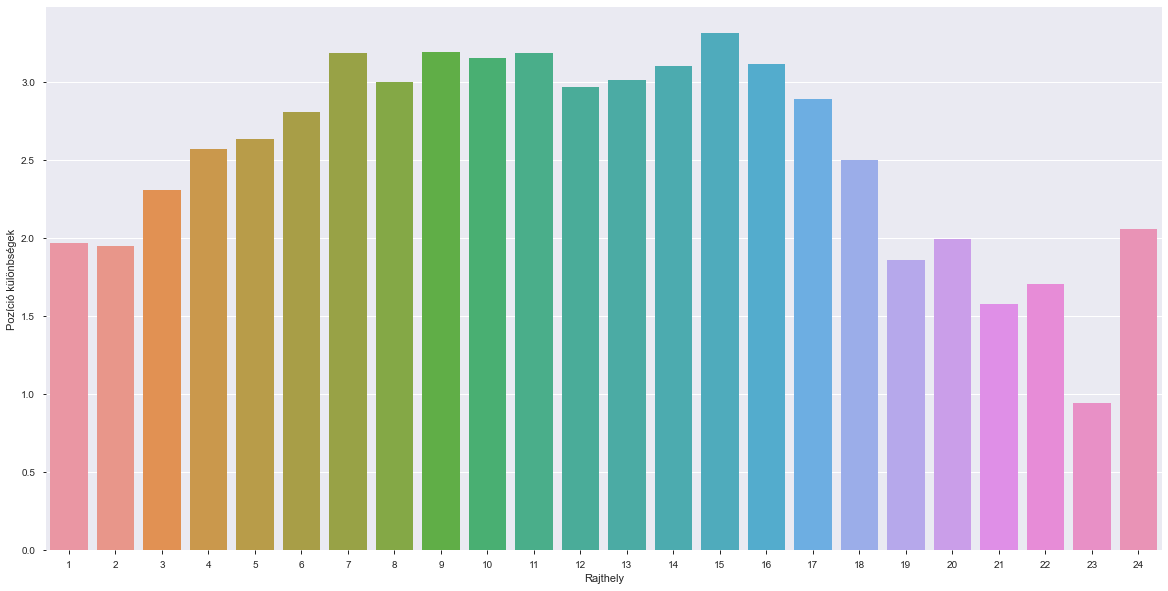

In [115]:
# Set the width and height of the figure
plt.figure(figsize = (20,10))

# Bar chart showing average arrival delay for Spirit Airlines flights by month
sns.barplot(x = gridQ, y = avgDiff)

# Add label for axises
plt.ylabel("Pozíció különbségek")
plt.xlabel("Rajthely")

In [116]:
dbTT = 0
dbTF = 0
dbFT = 0
dbFF = 0
i = 0
while i < len(Q.index):
    if Q['WinFP'][i] == True and Q['WinQ'][i] == True:
        dbTT = dbTT + 1
    if Q['WinFP'][i] == True and Q['WinQ'][i] == False:
        dbTF = dbTF + 1
    if Q['WinFP'][i] == False and Q['WinQ'][i] == True:
        dbFT = dbFT + 1
    if Q['WinFP'][i] == False and Q['WinQ'][i] == False:
        dbFF = dbFF + 1
    i = i + 1
x_array = ['Win-Win', 'Win-Lose', 'Lose-Win', 'Lose-Lose']
y_array = [dbTT, dbTF, dbFT, dbFF]

Text(0.5, 0, 'Végeredmény')

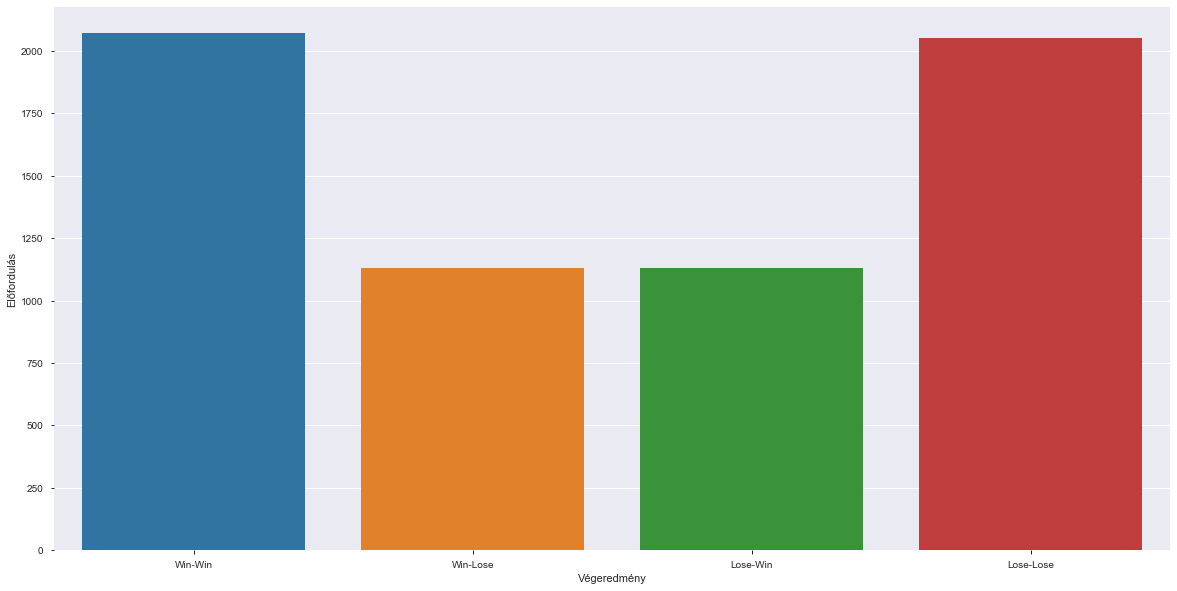

In [117]:
# Set the width and height of the figure
plt.figure(figsize = (20,10))

# Bar chart showing average arrival delay for Spirit Airlines flights by month
sns.barplot(x = x_array, y = y_array)

# Add label for axises
plt.ylabel("Előfordulás")
plt.xlabel("Végeredmény")

In [118]:
gridQ = []
sumDiff = []
db = []
avgDiff = []
i = 0
while i < 24:
    gridQ.append(i + 1)
    sumDiff.append(0)
    db.append(0)
    avgDiff.append(0)
    i = i + 1
i = 0

#Q11 = Q.loc[Q.Year != 2011]
#Q11 = Q11.reset_index()
#Q11 = Q11.drop(columns = ['index'])
while i < len(Q.index):
    sumDiff[Q['PositionQ'][i] - 1] = sumDiff[Q['PositionQ'][i] - 1] + abs(Q['PositionQ'][i] - Q['PositionR'][i])
    db[Q['PositionQ'][i] - 1] = db[Q['PositionQ'][i] - 1] + 1
    i = i + 1
i = 0
while i < 24:
    avgDiff[i] = round(sumDiff[i] / db[i], 3)
    i = i + 1
print(gridQ)
print(sumDiff)
print(db)
print(avgDiff)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]
[808.0, 1001.0, 1097.0, 974.0, 1266.0, 1244.0, 1231.0, 1306.0, 1272.0, 1118.0, 1258.0, 1175.0, 1178.0, 1145.0, 1168.0, 1155.0, 1180.0, 1207.0, 1086.0, 1189.0, 561.0, 683.0, 222.0, 277.0]
[301, 300, 301, 300, 303, 301, 300, 301, 301, 300, 300, 300, 300, 300, 302, 301, 300, 300, 295, 278, 153, 143, 56, 51]
[2.684, 3.337, 3.645, 3.247, 4.178, 4.133, 4.103, 4.339, 4.226, 3.727, 4.193, 3.917, 3.927, 3.817, 3.868, 3.837, 3.933, 4.023, 3.681, 4.277, 3.667, 4.776, 3.964, 5.431]


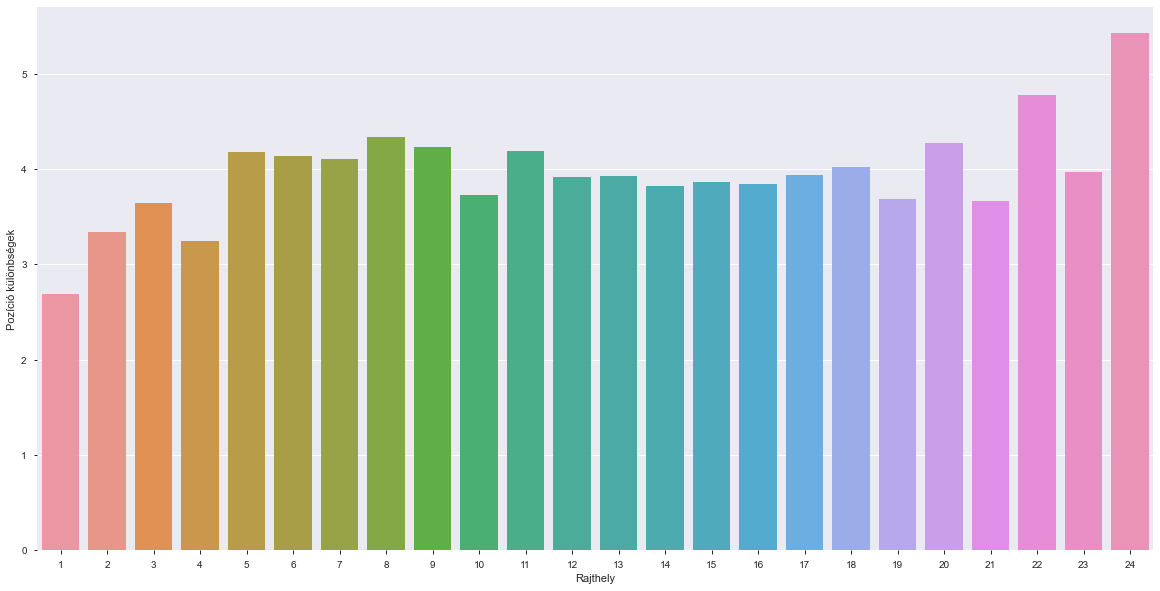

In [119]:
# Set the width and height of the figure
plt.figure(figsize = (20,10))

# Bar chart showing average arrival delay for Spirit Airlines flights by month
sns.barplot(x = gridQ, y = avgDiff)

# Add label for axises
plt.ylabel("Pozíció különbségek")
plt.xlabel("Rajthely")
sns.set(font_scale = 3)

In [120]:
dbTT = 0
dbTF = 0
dbFT = 0
dbFF = 0
i = 0
while i < len(Q.index):
    if Q['WinQ'][i] == True and Q['WinR'][i] == True:
        dbTT = dbTT + 1
    if Q['WinQ'][i] == True and Q['WinR'][i] == False:
        dbTF = dbTF + 1
    if Q['WinQ'][i] == False and Q['WinR'][i] == True:
        dbFT = dbFT + 1
    if Q['WinQ'][i] == False and Q['WinR'][i] == False:
        dbFF = dbFF + 1
    i = i + 1
x_array = ['Win-Win', 'Win-Lose', 'Lose-Win', 'Lose-Lose']
y_array = [dbTT, dbTF, dbFT, dbFF]

Text(0.5, 0, 'Végeredmény')

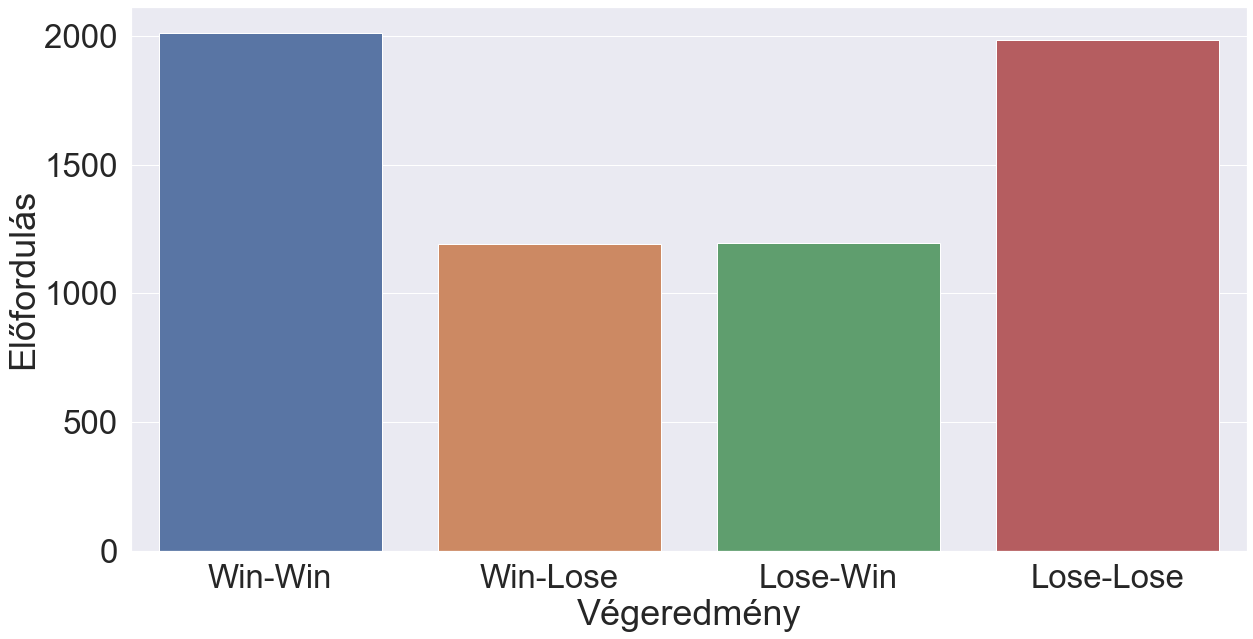

In [121]:
# Set the width and height of the figure
plt.figure(figsize = (20,10))

# Bar chart showing average arrival delay for Spirit Airlines flights by month
sns.barplot(x = x_array, y = y_array)

# Add label for axises
plt.ylabel("Előfordulás")
plt.xlabel("Végeredmény")

# Add some other features

In [122]:
list(Q.columns)

['Name',
 'Short',
 'Number',
 'Car',
 'Engine',
 'Date',
 'Year',
 'Month',
 'Day',
 'Track',
 'Length',
 'Record',
 'Speed',
 'FP1',
 'FP2',
 'FP3',
 'BestFP',
 'LapsFP',
 'PositionFP',
 'WinFP',
 'Q1',
 'Q2',
 'Q3',
 'BestQ',
 'LapsQ',
 'PositionQ',
 'LapsR',
 'PositionR',
 'Points',
 'Teammate',
 'FormQ',
 'FormR',
 'WinQ',
 'Top6',
 'WinR',
 'WinnerQ',
 'Top3',
 'WinnerR']

In [123]:
Q = Q.sort_values(['Year', 'Month', 'Day', 'Car'])
Q = Q.reset_index()
Q = Q.drop(columns = ['index'])
gap = []
i = 0
while i < len(Q.index):
    if i == 6386:
        if Q['Date'][i] == Q['Date'][i - 1] and Q['Car'][i] == Q['Car'][i - 1]:
            if Q['BestFP'][i] == 0 or Q['BestFP'][i - 1] == 0:
                gap.append(0)
                i = i + 1
                continue
            else:
                gap.append(Q['BestFP'][i] - Q['BestFP'][i - 1])
                i = i + 1
                continue
        gap.append(0)
        i = i + 1
        continue
    if Q['Date'][i] == Q['Date'][i + 1] and Q['Car'][i] == Q['Car'][i + 1]:
        if Q['BestFP'][i] == 0 or Q['BestFP'][i + 1] == 0:
            gap.append(0)
            i = i + 1
            continue
        else:
            gap.append(Q['BestFP'][i] - Q['BestFP'][i + 1])
            i = i + 1
            continue
    if Q['Date'][i] == Q['Date'][i - 1] and Q['Car'][i] == Q['Car'][i - 1]:
        if Q['BestFP'][i] == 0 or Q['BestFP'][i - 1] == 0:
            gap.append(0)
            i = i + 1
            continue
        else:
            gap.append(Q['BestFP'][i] - Q['BestFP'][i - 1])
            i = i + 1
            continue
    gap.append(0)
    i = i + 1
len(gap)

6387

In [124]:
Q['GapFP'] = gap
Q

,Name,Short,Number,Car,Engine,Date,Year,Month,Day,Track,Length,Record,Speed,FP1,FP2,FP3,BestFP,LapsFP,PositionFP,WinFP,Q1,Q2,Q3,BestQ,LapsQ,PositionQ,LapsR,PositionR,Points,Teammate,FormQ,FormR,WinQ,Top6,WinR,WinnerQ,Top3,WinnerR,GapFP
0,57,30,16,0,0,0,2006,3,12,5,5412,87.264,225.50,0.000,93.848,94.094,93.848,21.0,13.0,0,93.374,91.958,93.926,91.958,24,10,56.0,12.0,0.0,29,0,0,1,0,1,0,0,0,0.935
1,28,80,17,0,0,0,2006,3,12,5,5412,87.264,225.50,0.000,96.264,92.913,92.913,23.0,7.0,1,93.882,92.456,0.000,92.456,11,11,29.0,21.0,0.0,58,0,0,0,0,0,0,0,0,-0.935
2,87,41,20,1,1,0,2006,3,12,5,5412,87.264,225.50,95.083,92.703,95.351,92.703,45.0,6.0,1,94.439,93.416,0.000,93.416,13,15,57.0,11.0,0.0,76,0,0,1,0,1,0,0,0,-1.581
3,75,70,21,1,1,0,2006,3,12,5,5412,87.264,225.50,95.371,94.284,95.532,94.284,42.0,17.0,0,93.995,94.606,0.000,93.995,10,16,56.0,13.0,0.0,88,0,0,0,0,0,0,0,0,1.581
4,21,3,1,2,5,0,2006,3,12,5,5412,87.264,225.50,0.000,92.538,91.975,91.975,26.0,3.0,1,92.433,91.215,91.702,91.215,20,4,57.0,1.0,10.0,25,0,0,1,1,1,0,1,1,-0.075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6382,85,7,77,10,4,299,2021,9,26,32,5848,91.304,233.92,94.427,93.593,0.000,93.593,63.0,1.0,1,106.396,105.306,104.710,104.710,24,7,53.0,5.0,10.0,45,3,3,0,1,0,0,0,0,-0.044
6383,51,78,33,11,3,299,2021,9,26,32,5848,91.304,233.92,94.654,94.621,0.000,94.621,53.0,6.0,1,0.000,0.000,0.000,0.000,2,20,53.0,2.0,18.0,81,10,7,0,1,1,0,1,0,-0.317
6384,80,56,11,11,3,299,2021,9,26,32,5848,91.304,233.92,96.188,94.938,0.000,94.938,66.0,11.0,0,106.455,105.834,105.337,105.337,24,9,53.0,9.0,2.0,52,0,3,1,0,0,0,0,0,0.317
6385,23,65,63,14,4,299,2021,9,26,32,5848,91.304,233.92,98.013,95.094,0.000,95.094,61.0,13.0,1,108.303,106.435,102.983,102.983,26,3,53.0,10.0,1.0,57,9,6,1,0,1,0,0,0,-0.317


In [125]:
Q = Q.sort_values(['Year', 'Month', 'Day', 'Car'])
Q = Q.reset_index()
Q = Q.drop(columns = ['index'])
gap = []
i = 0
while i < len(Q.index):
    if i == 6386:
        if Q['Date'][i] == Q['Date'][i - 1] and Q['Car'][i] == Q['Car'][i - 1]:
            if Q['BestQ'][i] == 0 or Q['BestQ'][i - 1] == 0:
                gap.append(0)
                i = i + 1
                continue
            else:
                gap.append(Q['BestQ'][i] - Q['BestQ'][i - 1])
                i = i + 1
                continue
        gap.append(0)
        i = i + 1
        continue
    if Q['Date'][i] == Q['Date'][i + 1] and Q['Car'][i] == Q['Car'][i + 1]:
        if Q['BestQ'][i] == 0 or Q['BestQ'][i + 1] == 0:
            gap.append(0)
            i = i + 1
            continue
        else:
            gap.append(Q['BestQ'][i] - Q['BestQ'][i + 1])
            i = i + 1
            continue
    if Q['Date'][i] == Q['Date'][i - 1] and Q['Car'][i] == Q['Car'][i - 1]:
        if Q['BestQ'][i] == 0 or Q['BestQ'][i - 1] == 0:
            gap.append(0)
            i = i + 1
            continue
        else:
            gap.append(Q['BestQ'][i] - Q['BestQ'][i - 1])
            i = i + 1
            continue
    gap.append(0)
    i = i + 1
len(gap)

6387

In [126]:
Q["GapQ"] = gap
Q

,Name,Short,Number,Car,Engine,Date,Year,Month,Day,Track,Length,Record,Speed,FP1,FP2,FP3,BestFP,LapsFP,PositionFP,WinFP,Q1,Q2,Q3,BestQ,LapsQ,PositionQ,LapsR,PositionR,Points,Teammate,FormQ,FormR,WinQ,Top6,WinR,WinnerQ,Top3,WinnerR,GapFP,GapQ
0,57,30,16,0,0,0,2006,3,12,5,5412,87.264,225.50,0.000,93.848,94.094,93.848,21.0,13.0,0,93.374,91.958,93.926,91.958,24,10,56.0,12.0,0.0,29,0,0,1,0,1,0,0,0,0.935,-0.498
1,28,80,17,0,0,0,2006,3,12,5,5412,87.264,225.50,0.000,96.264,92.913,92.913,23.0,7.0,1,93.882,92.456,0.000,92.456,11,11,29.0,21.0,0.0,58,0,0,0,0,0,0,0,0,-0.935,0.498
2,87,41,20,1,1,0,2006,3,12,5,5412,87.264,225.50,95.083,92.703,95.351,92.703,45.0,6.0,1,94.439,93.416,0.000,93.416,13,15,57.0,11.0,0.0,76,0,0,1,0,1,0,0,0,-1.581,-0.579
3,75,70,21,1,1,0,2006,3,12,5,5412,87.264,225.50,95.371,94.284,95.532,94.284,42.0,17.0,0,93.995,94.606,0.000,93.995,10,16,56.0,13.0,0.0,88,0,0,0,0,0,0,0,0,1.581,0.579
4,21,3,1,2,5,0,2006,3,12,5,5412,87.264,225.50,0.000,92.538,91.975,91.975,26.0,3.0,1,92.433,91.215,91.702,91.215,20,4,57.0,1.0,10.0,25,0,0,1,1,1,0,1,1,-0.075,-0.616
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6382,85,7,77,10,4,299,2021,9,26,32,5848,91.304,233.92,94.427,93.593,0.000,93.593,63.0,1.0,1,106.396,105.306,104.710,104.710,24,7,53.0,5.0,10.0,45,3,3,0,1,0,0,0,0,-0.044,0.660
6383,51,78,33,11,3,299,2021,9,26,32,5848,91.304,233.92,94.654,94.621,0.000,94.621,53.0,6.0,1,0.000,0.000,0.000,0.000,2,20,53.0,2.0,18.0,81,10,7,0,1,1,0,1,0,-0.317,0.000
6384,80,56,11,11,3,299,2021,9,26,32,5848,91.304,233.92,96.188,94.938,0.000,94.938,66.0,11.0,0,106.455,105.834,105.337,105.337,24,9,53.0,9.0,2.0,52,0,3,1,0,0,0,0,0,0.317,0.000
6385,23,65,63,14,4,299,2021,9,26,32,5848,91.304,233.92,98.013,95.094,0.000,95.094,61.0,13.0,1,108.303,106.435,102.983,102.983,26,3,53.0,10.0,1.0,57,9,6,1,0,1,0,0,0,-0.317,-5.269


In [127]:
### The tests with Fernando Alonso's datas! ###
FA = Q.loc[Q.Name == dictName.get('Fernando Alonso')]
FA = FA.drop(columns = ['Name', 'Short', 'Number'])
FA = FA.reset_index()
FA = FA.drop(columns = ['index'])

np.set_printoptions(threshold = sys.maxsize)

FA

,Car,Engine,Date,Year,Month,Day,Track,Length,Record,Speed,FP1,FP2,FP3,BestFP,LapsFP,PositionFP,WinFP,Q1,Q2,Q3,BestQ,LapsQ,PositionQ,LapsR,PositionR,Points,Teammate,FormQ,FormR,WinQ,Top6,WinR,WinnerQ,Top3,WinnerR,GapFP,GapQ
0,2,5,0,2006,3,12,5,5412,87.264,225.500,0.000,92.538,91.975,91.975,26.0,3.0,1,92.433,91.215,91.702,91.215,20,4,57.0,1.0,10.0,25,0,0,1,1,1,0,1,1,-0.075,-0.616
1,2,5,1,2006,3,19,25,5543,90.076,221.720,0.000,95.806,94.180,94.180,29.0,2.0,1,95.514,93.997,95.747,93.997,22,8,56.0,2.0,8.0,25,1,1,0,1,0,0,1,0,-0.405,0.374
2,2,5,2,2006,4,2,2,5280,80.486,240.000,0.000,87.443,99.654,87.443,27.0,2.0,1,88.569,85.729,85.778,85.729,24,3,57.0,1.0,10.0,25,1,1,0,1,1,0,1,1,-0.837,0.094
3,2,5,3,2006,4,23,18,4909,73.609,245.450,0.000,85.043,84.068,84.068,33.0,2.0,1,83.536,83.743,83.709,83.536,21,5,62.0,2.0,8.0,25,1,2,1,1,1,0,1,0,-0.309,-0.235
4,2,5,4,2006,5,7,30,5148,85.269,214.500,0.000,93.579,91.807,91.807,30.0,6.0,0,91.138,90.336,89.819,89.819,20,1,60.0,2.0,8.0,25,2,3,1,1,1,1,1,0,0.223,-1.378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,2,5,295,2021,8,1,17,4381,73.447,219.050,78.385,78.169,77.992,77.992,68.0,10.0,0,77.123,76.541,76.715,76.541,15,9,70.0,4.0,12.0,19,6,5,1,1,0,0,0,0,0.233,-0.112
254,2,5,296,2021,8,29,9,7004,101.252,250.143,106.612,104.953,119.613,104.953,47.0,4.0,1,121.653,118.205,0.000,118.205,16,14,1.0,11.0,0.0,19,6,5,0,0,0,0,0,0,-0.349,0.851
255,2,5,297,2021,9,5,29,4260,68.885,224.211,72.158,71.280,70.670,70.670,64.0,5.0,1,70.435,70.020,69.956,69.956,13,9,71.0,6.0,8.0,19,6,5,0,1,1,0,0,0,-0.404,0.037
256,2,5,298,2021,9,12,21,5793,78.887,263.318,81.926,84.539,0.000,81.926,64.0,8.0,1,81.487,81.069,0.000,81.069,11,13,53.0,8.0,4.0,19,6,6,1,0,1,0,0,0,-0.608,-0.034


# Feature selection

# (Correlation UP!)

In [128]:
### Removing features with low variance! It is the same for all target values of course. ### 
sel = VarianceThreshold(threshold = (.8 * (1 - .8)))
sel.fit_transform(FA)

array([[ 2.00000e+00,  5.00000e+00,  0.00000e+00,  2.00600e+03,
         3.00000e+00,  1.20000e+01,  5.00000e+00,  5.41200e+03,
         8.72640e+01,  2.25500e+02,  0.00000e+00,  9.25380e+01,
         9.19750e+01,  9.19750e+01,  2.60000e+01,  3.00000e+00,
         1.00000e+00,  9.24330e+01,  9.12150e+01,  9.17020e+01,
         9.12150e+01,  2.00000e+01,  4.00000e+00,  5.70000e+01,
         1.00000e+00,  1.00000e+01,  2.50000e+01,  0.00000e+00,
         0.00000e+00,  1.00000e+00,  1.00000e+00,  1.00000e+00,
         1.00000e+00, -7.50000e-02, -6.16000e-01],
       [ 2.00000e+00,  5.00000e+00,  1.00000e+00,  2.00600e+03,
         3.00000e+00,  1.90000e+01,  2.50000e+01,  5.54300e+03,
         9.00760e+01,  2.21720e+02,  0.00000e+00,  9.58060e+01,
         9.41800e+01,  9.41800e+01,  2.90000e+01,  2.00000e+00,
         1.00000e+00,  9.55140e+01,  9.39970e+01,  9.57470e+01,
         9.39970e+01,  2.20000e+01,  8.00000e+00,  5.60000e+01,
         2.00000e+00,  8.00000e+00,  2.50000e+01,  1.

In [129]:
### Univariate feature selection! ###
X = FA.drop(columns = ['GapQ', 'GapFP', 'WinQ', 'WinR', 'WinnerQ', 'WinnerR', 'Top3', 'Top6', 'PositionQ', 'Q1', 'Q2', 'Q3', 'LapsQ', 'LapsR', 'BestQ', 'PositionR', 'Points'])
Y = FA.loc[:, ['WinQ']]
X_new = SelectKBest(chi2, k = 5).fit_transform(X, Y)
print(X.shape)
print(X_new.shape)
X_new

(258, 20)
(258, 5)


array([[1.20000e+01, 5.41200e+03, 9.19750e+01, 2.60000e+01, 2.50000e+01],
       [1.90000e+01, 5.54300e+03, 9.41800e+01, 2.90000e+01, 2.50000e+01],
       [2.00000e+00, 5.28000e+03, 9.96540e+01, 2.70000e+01, 2.50000e+01],
       [2.30000e+01, 4.90900e+03, 8.40680e+01, 3.30000e+01, 2.50000e+01],
       [7.00000e+00, 5.14800e+03, 9.18070e+01, 3.00000e+01, 2.50000e+01],
       [1.40000e+01, 4.67500e+03, 7.65950e+01, 2.80000e+01, 2.50000e+01],
       [2.80000e+01, 3.34000e+03, 7.38230e+01, 5.00000e+01, 2.50000e+01],
       [1.10000e+01, 5.14100e+03, 8.18700e+01, 2.70000e+01, 2.50000e+01],
       [2.50000e+01, 4.36100e+03, 7.54550e+01, 3.70000e+01, 2.50000e+01],
       [2.00000e+00, 4.19200e+03, 7.22020e+01, 3.00000e+01, 2.50000e+01],
       [1.60000e+01, 4.41200e+03, 7.84470e+01, 3.10000e+01, 2.50000e+01],
       [3.00000e+01, 4.57400e+03, 7.64270e+01, 2.80000e+01, 2.50000e+01],
       [6.00000e+00, 4.38100e+03, 8.21190e+01, 4.10000e+01, 2.50000e+01],
       [2.70000e+01, 5.33300e+03, 8.79

In [130]:
### Univariate feature selection! ###
X = FA.drop(columns = ['GapQ', 'GapFP', 'WinQ', 'WinR', 'WinnerQ', 'WinnerR', 'Top3', 'Top6', 'PositionQ', 'Q1', 'Q2', 'Q3', 'LapsQ', 'LapsR', 'BestQ', 'PositionR', 'Points'])
Y = FA.loc[:, ['WinnerQ']]
X_new = SelectKBest(chi2, k = 5).fit_transform(X, Y)
print(X.shape)
print(X_new.shape)
X_new

(258, 20)
(258, 5)


array([[0.00000e+00, 5.41200e+03, 0.00000e+00, 3.00000e+00, 2.50000e+01],
       [1.00000e+00, 5.54300e+03, 0.00000e+00, 2.00000e+00, 2.50000e+01],
       [2.00000e+00, 5.28000e+03, 0.00000e+00, 2.00000e+00, 2.50000e+01],
       [3.00000e+00, 4.90900e+03, 0.00000e+00, 2.00000e+00, 2.50000e+01],
       [4.00000e+00, 5.14800e+03, 0.00000e+00, 6.00000e+00, 2.50000e+01],
       [5.00000e+00, 4.67500e+03, 0.00000e+00, 8.00000e+00, 2.50000e+01],
       [6.00000e+00, 3.34000e+03, 7.67120e+01, 1.00000e+00, 2.50000e+01],
       [7.00000e+00, 5.14100e+03, 0.00000e+00, 6.00000e+00, 2.50000e+01],
       [8.00000e+00, 4.36100e+03, 0.00000e+00, 1.00000e+00, 2.50000e+01],
       [9.00000e+00, 4.19200e+03, 0.00000e+00, 6.00000e+00, 2.50000e+01],
       [1.00000e+01, 4.41200e+03, 0.00000e+00, 7.00000e+00, 2.50000e+01],
       [1.10000e+01, 4.57400e+03, 7.83280e+01, 1.10000e+01, 2.50000e+01],
       [1.20000e+01, 4.38100e+03, 0.00000e+00, 6.00000e+00, 2.50000e+01],
       [1.30000e+01, 5.33300e+03, 0.00

In [131]:
### Univariate feature selection! ###
X = FA.drop(columns = ['GapQ', 'GapFP', 'WinR', 'WinnerR', 'Top3', 'Top6', 'LapsR', 'PositionR', 'Points'])
Y = FA.loc[:, ['WinR']]
X_new = SelectKBest(chi2, k = 5).fit_transform(X, Y)
print(X.shape)
print(X_new.shape)
X_new

(258, 28)
(258, 5)


array([[  0.   ,   3.   ,  91.702,   4.   ,  25.   ],
       [  1.   ,   2.   ,  95.747,   8.   ,  25.   ],
       [  2.   ,   2.   ,  85.778,   3.   ,  25.   ],
       [  3.   ,   2.   ,  83.709,   5.   ,  25.   ],
       [  4.   ,   6.   ,  89.819,   1.   ,  25.   ],
       [  5.   ,   8.   ,  74.648,   1.   ,  25.   ],
       [  6.   ,   1.   ,  73.962,   1.   ,  25.   ],
       [  7.   ,   6.   ,  80.253,   1.   ,  25.   ],
       [  8.   ,   1.   ,  74.942,   1.   ,  25.   ],
       [  9.   ,   6.   ,  72.449,   5.   ,  25.   ],
       [ 10.   ,   7.   ,  75.785,   3.   ,  25.   ],
       [ 11.   ,  11.   ,  75.282,   7.   ,  25.   ],
       [ 12.   ,   6.   ,   0.   ,  15.   ,  25.   ],
       [ 13.   ,   2.   ,  87.321,   3.   ,  25.   ],
       [ 14.   ,   5.   ,  85.688,  10.   ,  25.   ],
       [ 15.   ,   3.   , 104.36 ,   1.   ,  25.   ],
       [ 16.   ,   5.   ,  90.371,   5.   ,  25.   ],
       [ 17.   ,   7.   ,  71.567,   4.   ,  25.   ],
       [ 18.   ,   7.   ,  8

In [132]:
### Univariate feature selection! ###
X = FA.drop(columns = ['GapQ', 'GapFP', 'WinR', 'WinnerR', 'Top3', 'Top6', 'LapsR', 'PositionR', 'Points'])
Y = FA.loc[:, ['WinnerR']]
X_new = SelectKBest(chi2, k = 5).fit_transform(X, Y)
print(X.shape)
print(X_new.shape)
X_new

(258, 28)
(258, 5)


array([[  0.   ,   3.   ,  91.702,   4.   ,  25.   ],
       [  1.   ,   2.   ,  95.747,   8.   ,  25.   ],
       [  2.   ,   2.   ,  85.778,   3.   ,  25.   ],
       [  3.   ,   2.   ,  83.709,   5.   ,  25.   ],
       [  4.   ,   6.   ,  89.819,   1.   ,  25.   ],
       [  5.   ,   8.   ,  74.648,   1.   ,  25.   ],
       [  6.   ,   1.   ,  73.962,   1.   ,  25.   ],
       [  7.   ,   6.   ,  80.253,   1.   ,  25.   ],
       [  8.   ,   1.   ,  74.942,   1.   ,  25.   ],
       [  9.   ,   6.   ,  72.449,   5.   ,  25.   ],
       [ 10.   ,   7.   ,  75.785,   3.   ,  25.   ],
       [ 11.   ,  11.   ,  75.282,   7.   ,  25.   ],
       [ 12.   ,   6.   ,   0.   ,  15.   ,  25.   ],
       [ 13.   ,   2.   ,  87.321,   3.   ,  25.   ],
       [ 14.   ,   5.   ,  85.688,  10.   ,  25.   ],
       [ 15.   ,   3.   , 104.36 ,   1.   ,  25.   ],
       [ 16.   ,   5.   ,  90.371,   5.   ,  25.   ],
       [ 17.   ,   7.   ,  71.567,   4.   ,  25.   ],
       [ 18.   ,   7.   ,  8

In [133]:
### Univariate feature selection! ###
X = FA.drop(columns = ['GapQ', 'GapFP', 'WinR', 'WinnerR', 'Top3', 'Top6', 'LapsR', 'PositionR', 'Points'])
Y = FA.loc[:, ['Top3']]
X_new = SelectKBest(chi2, k = 5).fit_transform(X, Y)
print(X.shape)
print(X_new.shape)
X_new

(258, 28)
(258, 5)


array([[  0.   ,   3.   ,  91.702,   4.   ,  25.   ],
       [  1.   ,   2.   ,  95.747,   8.   ,  25.   ],
       [  2.   ,   2.   ,  85.778,   3.   ,  25.   ],
       [  3.   ,   2.   ,  83.709,   5.   ,  25.   ],
       [  4.   ,   6.   ,  89.819,   1.   ,  25.   ],
       [  5.   ,   8.   ,  74.648,   1.   ,  25.   ],
       [  6.   ,   1.   ,  73.962,   1.   ,  25.   ],
       [  7.   ,   6.   ,  80.253,   1.   ,  25.   ],
       [  8.   ,   1.   ,  74.942,   1.   ,  25.   ],
       [  9.   ,   6.   ,  72.449,   5.   ,  25.   ],
       [ 10.   ,   7.   ,  75.785,   3.   ,  25.   ],
       [ 11.   ,  11.   ,  75.282,   7.   ,  25.   ],
       [ 12.   ,   6.   ,   0.   ,  15.   ,  25.   ],
       [ 13.   ,   2.   ,  87.321,   3.   ,  25.   ],
       [ 14.   ,   5.   ,  85.688,  10.   ,  25.   ],
       [ 15.   ,   3.   , 104.36 ,   1.   ,  25.   ],
       [ 16.   ,   5.   ,  90.371,   5.   ,  25.   ],
       [ 17.   ,   7.   ,  71.567,   4.   ,  25.   ],
       [ 18.   ,   7.   ,  8

In [134]:
### Univariate feature selection! ###
X = FA.drop(columns = ['GapQ', 'GapFP', 'WinR', 'WinnerR', 'Top3', 'Top6', 'LapsR', 'PositionR', 'Points'])
Y = FA.loc[:, ['Top6']]
X_new = SelectKBest(chi2, k = 5).fit_transform(X, Y)
print(X.shape)
print(X_new.shape)
X_new

(258, 28)
(258, 5)


array([[  0.   ,   3.   ,  91.702,   4.   ,  25.   ],
       [  1.   ,   2.   ,  95.747,   8.   ,  25.   ],
       [  2.   ,   2.   ,  85.778,   3.   ,  25.   ],
       [  3.   ,   2.   ,  83.709,   5.   ,  25.   ],
       [  4.   ,   6.   ,  89.819,   1.   ,  25.   ],
       [  5.   ,   8.   ,  74.648,   1.   ,  25.   ],
       [  6.   ,   1.   ,  73.962,   1.   ,  25.   ],
       [  7.   ,   6.   ,  80.253,   1.   ,  25.   ],
       [  8.   ,   1.   ,  74.942,   1.   ,  25.   ],
       [  9.   ,   6.   ,  72.449,   5.   ,  25.   ],
       [ 10.   ,   7.   ,  75.785,   3.   ,  25.   ],
       [ 11.   ,  11.   ,  75.282,   7.   ,  25.   ],
       [ 12.   ,   6.   ,   0.   ,  15.   ,  25.   ],
       [ 13.   ,   2.   ,  87.321,   3.   ,  25.   ],
       [ 14.   ,   5.   ,  85.688,  10.   ,  25.   ],
       [ 15.   ,   3.   , 104.36 ,   1.   ,  25.   ],
       [ 16.   ,   5.   ,  90.371,   5.   ,  25.   ],
       [ 17.   ,   7.   ,  71.567,   4.   ,  25.   ],
       [ 18.   ,   7.   ,  8

In [135]:
### RFE! ###
X = FA.drop(columns = ['GapQ', 'WinQ', 'WinR', 'WinnerQ', 'WinnerR', 'Top3', 'Top6', 'PositionQ', 'Q1', 'Q2', 'Q3', 'LapsQ', 'LapsR', 'BestQ', 'PositionR', 'Points'])
Y = FA.loc[:, ['WinQ']]
estimator = SVR(kernel = "linear")
selector = RFE(estimator, n_features_to_select = 5, step = 1)
selector = selector.fit(X, Y.values.ravel())
selector.support_

array([ True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True, False,
        True, False,  True])

In [136]:
X.iloc[[0], [0, 15, 16, 18, 20]]

,Car,PositionFP,WinFP,FormQ,GapFP
0,2,3.0,1,0,-0.075


In [137]:
selector.ranking_

array([ 1,  6, 14, 10,  7, 11, 17, 13,  8, 12,  9,  4, 16,  3,  2,  1,  1,
       15,  1,  5,  1])

In [138]:
### RFE! ###
X = FA.drop(columns = ['GapQ', 'WinQ', 'WinR', 'WinnerQ', 'WinnerR', 'Top3', 'Top6', 'PositionQ', 'Q1', 'Q2', 'Q3', 'LapsQ', 'LapsR', 'BestQ', 'PositionR', 'Points'])
Y = FA.loc[:, ['WinnerQ']]
estimator = SVR(kernel = "linear")
selector = RFE(estimator, n_features_to_select = 5, step = 1)
selector = selector.fit(X, Y.values.ravel())
selector.support_

array([False,  True, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
        True, False,  True])

In [139]:
X.iloc[[0], [1, 4, 16, 18, 20]]

,Engine,Month,WinFP,FormQ,GapFP
0,5,3,1,0,-0.075


In [140]:
selector.ranking_

array([ 7,  1,  3,  2,  1, 14, 11, 17, 16, 15,  9, 10, 12,  4,  8,  5,  1,
       13,  1,  6,  1])

In [141]:
### RFE! ###
X = FA.drop(columns = ['WinR', 'WinnerR', 'Top3', 'Top6', 'LapsR', 'PositionR', 'Points'])
Y = FA.loc[:, ['WinR']]
estimator = SVR(kernel = "linear")
selector = RFE(estimator, n_features_to_select = 5, step = 1)
selector = selector.fit(X, Y.values.ravel())
selector.support_

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False,  True, False, False, False,  True,
       False,  True,  True])

In [142]:
X.iloc[[0], [16, 22, 26, 28, 29]]

,WinFP,PositionQ,WinQ,GapFP,GapQ
0,1,4,1,-0.075,-0.616


In [143]:
selector.ranking_

array([ 4,  2, 10,  9,  6, 13, 21, 26,  7, 23, 25, 15, 24,  5, 20, 11,  1,
        8, 17, 22, 12, 14,  1, 16,  3, 18,  1, 19,  1,  1])

In [144]:
### RFE! ###
X = FA.drop(columns = ['WinR', 'WinnerR', 'Top3', 'Top6', 'LapsR', 'PositionR', 'Points'])
Y = FA.loc[:, ['WinnerR']]
estimator = SVR(kernel = "linear")
selector = RFE(estimator, n_features_to_select = 5, step = 1)
selector = selector.fit(X, Y.values.ravel())
selector.support_

array([ True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False,  True,
       False,  True,  True])

In [145]:
X.iloc[[0], [0, 22, 26, 28, 29]]

,Car,PositionQ,WinQ,GapFP,GapQ
0,2,4,1,-0.075,-0.616


In [146]:
selector.ranking_

array([ 1,  6, 18,  9,  5, 15, 17, 26, 13, 22, 23, 14, 19, 11, 21,  3,  2,
        8, 25, 20,  7, 10,  1, 16,  4, 12,  1, 24,  1,  1])

In [147]:
### RFE! ###
X = FA.drop(columns = ['WinR', 'WinnerR', 'Top3', 'Top6', 'LapsR', 'PositionR', 'Points'])
Y = FA.loc[:, ['Top3']]
estimator = SVR(kernel = "linear")
selector = RFE(estimator, n_features_to_select = 5, step = 1)
selector = selector.fit(X, Y.values.ravel())
selector.support_

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True, False,
       False, False, False, False,  True, False, False, False,  True,
       False,  True, False])

In [148]:
X.iloc[[0], [15, 16, 22, 26, 28]]

,PositionFP,WinFP,PositionQ,WinQ,GapFP
0,3.0,1,4,1,-0.075


In [149]:
selector.ranking_

array([ 3, 17, 26,  2,  7, 25, 19, 23,  8, 18, 14, 15, 20, 11, 24,  1,  1,
        9, 21, 16, 12, 10,  1, 13,  4,  6,  1, 22,  1,  5])

In [ ]:
### RFE! ### Last time, it crashed the program...
#X = FA.drop(columns = ['WinR', 'WinnerR', 'Top3', 'Top6', 'LapsR', 'PositionR', 'Points'])
#Y = FA.loc[:, ['Top6']]
#estimator = SVR(kernel = "linear")
#selector = RFE(estimator, n_features_to_select = 5, step = 1)
#selector = selector.fit(X, Y.values.ravel())
#selector.support_

In [ ]:
#X.iloc[[0], [1, 4, 16, 18, 20]]

In [ ]:
#selector.ranking_

# Models

In [150]:
array_drivers_2021 = []
ds_drivers_2021 = Q.loc[Q.Year == 2021]
ds_drivers_2021 = ds_drivers_2021.reset_index()
ds_drivers_2021 = ds_drivers_2021.drop(columns = ['index'])
key_list = list(dictName.keys())
val_list = list(dictName.values())
for idx in ds_drivers_2021.index:
    position = val_list.index(ds_drivers_2021['Name'][idx])
    driver = key_list[position]
    if driver not in array_drivers_2021:
        array_drivers_2021.append(driver)
array_drivers_2021.remove('Robert Kubica')
array_drivers_2021

['Kimi Räikkönen',
 'Antonio Giovinazzi',
 'Yuki Tsunoda',
 'Pierre Gasly',
 'Esteban Ocon',
 'Fernando Alonso',
 'Lance Stroll',
 'Sebastian Vettel',
 'Charles Leclerc',
 'Carlos Sainz',
 'Mick Schumacher',
 'Nikita Mazepin',
 'Lando Norris',
 'Daniel Ricciardo',
 'Lewis Hamilton',
 'Valtteri Bottas',
 'Max Verstappen',
 'Sergio Perez',
 'George Russell',
 'Nicholas Latifi']

In [151]:
array_drivers_2021.sort()
array_drivers_2021

['Antonio Giovinazzi',
 'Carlos Sainz',
 'Charles Leclerc',
 'Daniel Ricciardo',
 'Esteban Ocon',
 'Fernando Alonso',
 'George Russell',
 'Kimi Räikkönen',
 'Lance Stroll',
 'Lando Norris',
 'Lewis Hamilton',
 'Max Verstappen',
 'Mick Schumacher',
 'Nicholas Latifi',
 'Nikita Mazepin',
 'Pierre Gasly',
 'Sebastian Vettel',
 'Sergio Perez',
 'Valtteri Bottas',
 'Yuki Tsunoda']

In [152]:
models = []

AG = []
CS = []
CL = []
DR = []
EO = []
FA = []
GR = []
KR = []
LS = []
LN = []
LH = []
MV = []
MS = []
NL = []
NM = []
PG = []
SV = []
SP = []
VB = []
YT = []

models.append(AG)
models.append(CS)
models.append(CL)
models.append(DR)
models.append(EO)
models.append(FA)
models.append(GR)
models.append(KR)
models.append(LS)
models.append(LN)
models.append(LH)
models.append(MV)
models.append(MS)
models.append(NL)
models.append(NM)
models.append(PG)
models.append(SV)
models.append(SP)
models.append(VB)
models.append(YT)

models

[[],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 []]

In [153]:
# Model for Qualifying Pairs! (before the weekend)
def modelQPbWwT(driver_models, x):
    driver = array_drivers_2021[x]
    df = Q.loc[Q.Name == dictName.get(driver)]
    X = df.loc[:, ['Year', 'Track', 'Speed', 'Teammate', 'FormQ', 'FormR']]
    Y = df.loc[:, ['WinQ']]
    Y = Y.reset_index()
    Y = Y.drop(columns = ['index'])
    if len(Y.WinQ.unique()) == 1:
        if Y['WinQ'][0] == 0:
            driver_models.append(0)
        else:
            driver_models.append(1)
        return
    db0 = 0
    db1 = 0
    i = 0
    while db0 < 5 and db1 < 5 and i < len(Y.index):
        if Y['WinQ'][i] == 0:
            db0 = db0 + 1
        if Y['WinQ'][i] == 1:
            db1 = db1 + 1
        i = i + 1
    if db0 < 5 or db1 < 5:
        sm = SMOTE(k_neighbors = 1)
    else:
        sm = SMOTE(k_neighbors = 5)
    X, Y = sm.fit_resample(X, Y)
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)
    clf = RandomForestClassifier()
    clf.fit(X_train, Y_train.values.ravel())
    Y_pred = clf.predict(X_test)
    print("Accuracy: ", metrics.accuracy_score(Y_test, Y_pred))
    driver_models.append(clf)

In [154]:
i = 0
while i < len(models):
    modelQPbWwT(models[i], i)
    i = i + 1
models

Accuracy:  0.7222222222222222
Accuracy:  0.4878048780487805
Accuracy:  0.7878787878787878
Accuracy:  0.6944444444444444
Accuracy:  0.6129032258064516
Accuracy:  0.7107438016528925
Accuracy:  0.9354838709677419
Accuracy:  0.6483516483516484
Accuracy:  0.7804878048780488
Accuracy:  0.55
Accuracy:  0.6018518518518519
Accuracy:  0.7321428571428571
Accuracy:  1.0
Accuracy:  0.625
Accuracy:  0.75
Accuracy:  0.6274509803921569
Accuracy:  0.5555555555555556
Accuracy:  0.6481481481481481


[[RandomForestClassifier()],
 [RandomForestClassifier()],
 [RandomForestClassifier()],
 [RandomForestClassifier()],
 [RandomForestClassifier()],
 [RandomForestClassifier()],
 [RandomForestClassifier()],
 [RandomForestClassifier()],
 [RandomForestClassifier()],
 [RandomForestClassifier()],
 [RandomForestClassifier()],
 [RandomForestClassifier()],
 [1],
 [RandomForestClassifier()],
 [RandomForestClassifier()],
 [RandomForestClassifier()],
 [RandomForestClassifier()],
 [RandomForestClassifier()],
 [RandomForestClassifier()],
 [0]]

In [155]:
# Model for Qualifying Pairs! (after free practices)
def modelQPaFPwT(driver_models, x):
    driver = array_drivers_2021[x]
    df = Q.loc[Q.Name == dictName.get(driver)]
    X = df.loc[:, ['Year', 'Track', 'Speed', 'Teammate', 'FormQ', 'WinFP', 'FormR']]
    Y = df.loc[:, ['WinQ']]
    Y = Y.reset_index()
    Y = Y.drop(columns = ['index'])
    if len(Y.WinQ.unique()) == 1:
        if Y['WinQ'][0] == 0:
            driver_models.append(0)
        else:
            driver_models.append(1)
        return
    db0 = 0
    db1 = 0
    i = 0
    while db0 < 5 and db1 < 5 and i < len(Y.index):
        if Y['WinQ'][i] == 0:
            db0 = db0 + 1
        if Y['WinQ'][i] == 1:
            db1 = db1 + 1
        i = i + 1
    if db0 < 5 or db1 < 5:
        sm = SMOTE(k_neighbors = 1)
    else:
        sm = SMOTE(k_neighbors = 5)
    X, Y = sm.fit_resample(X, Y)
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)
    clf = RandomForestClassifier()
    clf.fit(X_train, Y_train.values.ravel())
    Y_pred = clf.predict(X_test)
    print("Accuracy: ", metrics.accuracy_score(Y_test, Y_pred))
    driver_models.append(clf)

In [156]:
i = 0
while i < len(models):
    modelQPaFPwT(models[i], i)
    i = i + 1
models

Accuracy:  0.7222222222222222
Accuracy:  0.6585365853658537
Accuracy:  0.7575757575757576
Accuracy:  0.7777777777777778
Accuracy:  0.6774193548387096
Accuracy:  0.8429752066115702
Accuracy:  0.967741935483871
Accuracy:  0.6923076923076923
Accuracy:  0.7073170731707317
Accuracy:  0.7
Accuracy:  0.6296296296296297
Accuracy:  0.75
Accuracy:  1.0
Accuracy:  0.875
Accuracy:  0.75
Accuracy:  0.6862745098039216
Accuracy:  0.6031746031746031
Accuracy:  0.6481481481481481


[[RandomForestClassifier(), RandomForestClassifier()],
 [RandomForestClassifier(), RandomForestClassifier()],
 [RandomForestClassifier(), RandomForestClassifier()],
 [RandomForestClassifier(), RandomForestClassifier()],
 [RandomForestClassifier(), RandomForestClassifier()],
 [RandomForestClassifier(), RandomForestClassifier()],
 [RandomForestClassifier(), RandomForestClassifier()],
 [RandomForestClassifier(), RandomForestClassifier()],
 [RandomForestClassifier(), RandomForestClassifier()],
 [RandomForestClassifier(), RandomForestClassifier()],
 [RandomForestClassifier(), RandomForestClassifier()],
 [RandomForestClassifier(), RandomForestClassifier()],
 [1, 1],
 [RandomForestClassifier(), RandomForestClassifier()],
 [RandomForestClassifier(), RandomForestClassifier()],
 [RandomForestClassifier(), RandomForestClassifier()],
 [RandomForestClassifier(), RandomForestClassifier()],
 [RandomForestClassifier(), RandomForestClassifier()],
 [RandomForestClassifier(), RandomForestClassifier()],
 

In [157]:
# Model for Race Pairs! (before the weekend)
def modelRPbWwT(driver_models, x):
    driver = array_drivers_2021[x]
    df = Q.loc[Q.Name == dictName.get(driver)]
    X = df.loc[:, ['Year', 'Track', 'Speed', 'Teammate', 'FormR']]
    Y = df.loc[:, ['WinR']]
    Y = Y.reset_index()
    Y = Y.drop(columns = ['index'])
    if len(Y.WinR.unique()) == 1:
        if Y['WinR'][0] == 0:
            driver_models.append(0)
        else:
            driver_models.append(1)
        return
    db0 = 0
    db1 = 0
    i = 0
    while db0 < 5 and db1 < 5 and i < len(Y.index):
        if Y['WinR'][i] == 0:
            db0 = db0 + 1
        if Y['WinR'][i] == 1:
            db1 = db1 + 1
        i = i + 1
    if db0 < 5 or db1 < 5:
        sm = SMOTE(k_neighbors = 1)
    else:
        sm = SMOTE(k_neighbors = 5)
    X, Y = sm.fit_resample(X, Y)
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)
    clf = RandomForestClassifier()
    clf.fit(X_train, Y_train.values.ravel())
    Y_pred = clf.predict(X_test)
    print("Accuracy: ", metrics.accuracy_score(Y_test, Y_pred))
    driver_models.append(clf)

In [158]:
i = 0
while i < len(models):
    modelRPbWwT(models[i], i)
    i = i + 1
models

Accuracy:  0.6086956521739131
Accuracy:  0.6744186046511628
Accuracy:  0.72
Accuracy:  0.5970149253731343
Accuracy:  0.42857142857142855
Accuracy:  0.7
Accuracy:  0.782608695652174
Accuracy:  0.575
Accuracy:  0.625
Accuracy:  0.7647058823529411
Accuracy:  0.5523809523809524
Accuracy:  0.6862745098039216
Accuracy:  1.0
Accuracy:  0.5384615384615384
Accuracy:  0.7142857142857143
Accuracy:  0.6538461538461539
Accuracy:  0.6732673267326733
Accuracy:  0.47619047619047616
Accuracy:  0.671875
Accuracy:  0.7142857142857143


[[RandomForestClassifier(),
  RandomForestClassifier(),
  RandomForestClassifier()],
 [RandomForestClassifier(),
  RandomForestClassifier(),
  RandomForestClassifier()],
 [RandomForestClassifier(),
  RandomForestClassifier(),
  RandomForestClassifier()],
 [RandomForestClassifier(),
  RandomForestClassifier(),
  RandomForestClassifier()],
 [RandomForestClassifier(),
  RandomForestClassifier(),
  RandomForestClassifier()],
 [RandomForestClassifier(),
  RandomForestClassifier(),
  RandomForestClassifier()],
 [RandomForestClassifier(),
  RandomForestClassifier(),
  RandomForestClassifier()],
 [RandomForestClassifier(),
  RandomForestClassifier(),
  RandomForestClassifier()],
 [RandomForestClassifier(),
  RandomForestClassifier(),
  RandomForestClassifier()],
 [RandomForestClassifier(),
  RandomForestClassifier(),
  RandomForestClassifier()],
 [RandomForestClassifier(),
  RandomForestClassifier(),
  RandomForestClassifier()],
 [RandomForestClassifier(),
  RandomForestClassifier(),
  RandomF

In [159]:
# Model for Race Pairs! (after Q)
def modelRPaQwT(driver_models, x):
    driver = array_drivers_2021[x]
    df = Q.loc[Q.Name == dictName.get(driver)]
    X = df.loc[:, ['Year', 'Track', 'Speed', 'Teammate', 'FormR', 'WinQ']]
    Y = df.loc[:, ['WinR']]
    Y = Y.reset_index()
    Y = Y.drop(columns = ['index'])
    if len(Y.WinR.unique()) == 1:
        if Y['WinR'][0] == 0:
            driver_models.append(0)
        else:
            driver_models.append(1)
        return
    db0 = 0
    db1 = 0
    i = 0
    while db0 < 5 and db1 < 5 and i < len(Y.index):
        if Y['WinR'][i] == 0:
            db0 = db0 + 1
        if Y['WinR'][i] == 1:
            db1 = db1 + 1
        i = i + 1
    if db0 < 5 or db1 < 5:
        sm = SMOTE(k_neighbors = 1)
    else:
        sm = SMOTE(k_neighbors = 5)
    X, Y = sm.fit_resample(X, Y)
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)
    clf = RandomForestClassifier()
    clf.fit(X_train, Y_train.values.ravel())
    Y_pred = clf.predict(X_test)
    print("Accuracy: ", metrics.accuracy_score(Y_test, Y_pred))
    driver_models.append(clf)

In [160]:
i = 0
while i < len(models):
    modelRPaQwT(models[i], i)
    i = i + 1
models

Accuracy:  0.6956521739130435
Accuracy:  0.4883720930232558
Accuracy:  0.64
Accuracy:  0.5223880597014925
Accuracy:  0.6785714285714286
Accuracy:  0.7
Accuracy:  0.8260869565217391
Accuracy:  0.6125
Accuracy:  0.59375
Accuracy:  0.7058823529411765
Accuracy:  0.7047619047619048
Accuracy:  0.6862745098039216
Accuracy:  0.7142857142857143
Accuracy:  0.7692307692307693
Accuracy:  0.7142857142857143
Accuracy:  0.6538461538461539
Accuracy:  0.6831683168316832
Accuracy:  0.49206349206349204
Accuracy:  0.671875
Accuracy:  0.7142857142857143


[[RandomForestClassifier(),
  RandomForestClassifier(),
  RandomForestClassifier(),
  RandomForestClassifier()],
 [RandomForestClassifier(),
  RandomForestClassifier(),
  RandomForestClassifier(),
  RandomForestClassifier()],
 [RandomForestClassifier(),
  RandomForestClassifier(),
  RandomForestClassifier(),
  RandomForestClassifier()],
 [RandomForestClassifier(),
  RandomForestClassifier(),
  RandomForestClassifier(),
  RandomForestClassifier()],
 [RandomForestClassifier(),
  RandomForestClassifier(),
  RandomForestClassifier(),
  RandomForestClassifier()],
 [RandomForestClassifier(),
  RandomForestClassifier(),
  RandomForestClassifier(),
  RandomForestClassifier()],
 [RandomForestClassifier(),
  RandomForestClassifier(),
  RandomForestClassifier(),
  RandomForestClassifier()],
 [RandomForestClassifier(),
  RandomForestClassifier(),
  RandomForestClassifier(),
  RandomForestClassifier()],
 [RandomForestClassifier(),
  RandomForestClassifier(),
  RandomForestClassifier(),
  RandomFore

In [161]:
# Model for Race Top3! (before the weekend)
def modelR3bWwT(driver_models, x):
    driver = array_drivers_2021[x]
    df = Q.loc[Q.Name == dictName.get(driver)]
    X = df.loc[:, ['Year', 'Track', 'Speed', 'Car']]
    Y = df.loc[:, ['Top3']]
    Y = Y.reset_index()
    Y = Y.drop(columns = ['index'])
    if len(Y.Top3.unique()) == 1:
        if Y['Top3'][0] == 0:
            driver_models.append(0)
        else:
            driver_models.append(1)
        return
    db0 = 0
    db1 = 0
    i = 0
    while i < len(Y.index):
        if Y['Top3'][i] == 0:
            db0 = db0 + 1
        if Y['Top3'][i] == 1:
            db1 = db1 + 1
        i = i + 1
    if db1 != 1:
        if db0 < 6 or db1 < 6:
            sm = SMOTE(k_neighbors = 1)
        else:
            sm = SMOTE(k_neighbors = 5)
        print(driver)
        print(db0)
        print(db1)
        X, Y = sm.fit_resample(X, Y)
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)
    clf = RandomForestClassifier()
    clf.fit(X_train, Y_train.values.ravel())
    Y_pred = clf.predict(X_test)
    print("Accuracy: ", metrics.accuracy_score(Y_test, Y_pred))
    driver_models.append(clf)

In [162]:
i = 0
while i < len(models):
    modelR3bWwT(models[i], i)
    i = i + 1
models

Carlos Sainz
128
5
Accuracy:  0.974025974025974
Charles Leclerc
61
13
Accuracy:  0.8378378378378378
Daniel Ricciardo
171
32
Accuracy:  0.883495145631068
Esteban Ocon
80
2
Accuracy:  0.9791666666666666
Fernando Alonso
184
74
Accuracy:  0.8108108108108109
Accuracy:  1.0
Kimi Räikkönen
185
73
Accuracy:  0.6936936936936937
Lance Stroll
90
3
Accuracy:  0.9814814814814815
Lando Norris
48
5
Accuracy:  0.896551724137931
Lewis Hamilton
105
176
Accuracy:  0.6415094339622641
Max Verstappen
80
53
Accuracy:  0.7916666666666666
Pierre Gasly
75
3
Accuracy:  0.9777777777777777
Sebastian Vettel
150
122
Accuracy:  0.6888888888888889
Sergio Perez
196
12
Accuracy:  0.8813559322033898
Valtteri Bottas
108
64
Accuracy:  0.7076923076923077


[[RandomForestClassifier(),
  RandomForestClassifier(),
  RandomForestClassifier(),
  RandomForestClassifier(),
  0],
 [RandomForestClassifier(),
  RandomForestClassifier(),
  RandomForestClassifier(),
  RandomForestClassifier(),
  RandomForestClassifier()],
 [RandomForestClassifier(),
  RandomForestClassifier(),
  RandomForestClassifier(),
  RandomForestClassifier(),
  RandomForestClassifier()],
 [RandomForestClassifier(),
  RandomForestClassifier(),
  RandomForestClassifier(),
  RandomForestClassifier(),
  RandomForestClassifier()],
 [RandomForestClassifier(),
  RandomForestClassifier(),
  RandomForestClassifier(),
  RandomForestClassifier(),
  RandomForestClassifier()],
 [RandomForestClassifier(),
  RandomForestClassifier(),
  RandomForestClassifier(),
  RandomForestClassifier(),
  RandomForestClassifier()],
 [RandomForestClassifier(),
  RandomForestClassifier(),
  RandomForestClassifier(),
  RandomForestClassifier(),
  RandomForestClassifier()],
 [RandomForestClassifier(),
  Random

In [163]:
# Model for Race Top6! (before the weekend)
def modelR6bWwT(driver_models, x):
    driver = array_drivers_2021[x]
    df = Q.loc[Q.Name == dictName.get(driver)]
    X = df.loc[:, ['Year', 'Track', 'Speed', 'Car']]
    Y = df.loc[:, ['Top6']]
    Y = Y.reset_index()
    Y = Y.drop(columns = ['index'])
    if len(Y.Top6.unique()) == 1:
        if Y['Top6'][0] == 0:
            driver_models.append(0)
        else:
            driver_models.append(1)
        return
    db0 = 0
    db1 = 0
    i = 0
    while i < len(Y.index):
        if Y['Top6'][i] == 0:
            db0 = db0 + 1
        if Y['Top6'][i] == 1:
            db1 = db1 + 1
        i = i + 1
    if db1 != 1:
        if db0 < 6 or db1 < 6:
            sm = SMOTE(k_neighbors = 1)
        else:
            sm = SMOTE(k_neighbors = 5)
        print(driver)
        print(db0)
        print(db1)
        X, Y = sm.fit_resample(X, Y)
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)
    clf = RandomForestClassifier()
    clf.fit(X_train, Y_train.values.ravel())
    Y_pred = clf.predict(X_test)
    print("Accuracy: ", metrics.accuracy_score(Y_test, Y_pred))
    driver_models.append(clf)

In [164]:
i = 0
while i < len(models):
    modelR6bWwT(models[i], i)
    i = i + 1
models

Accuracy:  0.9411764705882353
Carlos Sainz
101
32
Accuracy:  0.8032786885245902
Charles Leclerc
40
34
Accuracy:  0.7916666666666666
Daniel Ricciardo
119
84
Accuracy:  0.6944444444444444
Esteban Ocon
67
15
Accuracy:  0.8292682926829268
Fernando Alonso
129
129
Accuracy:  0.6923076923076923
Accuracy:  0.9375
Kimi Räikkönen
127
131
Accuracy:  0.6329113924050633
Lance Stroll
85
8
Accuracy:  0.8823529411764706
Lando Norris
34
19
Accuracy:  0.7619047619047619
Lewis Hamilton
58
223
Accuracy:  0.7089552238805971
Max Verstappen
49
84
Accuracy:  0.7647058823529411
Pierre Gasly
61
17
Accuracy:  0.6486486486486487
Sebastian Vettel
84
188
Accuracy:  0.7433628318584071
Sergio Perez
161
47
Accuracy:  0.7422680412371134
Valtteri Bottas
67
105
Accuracy:  0.6666666666666666
Accuracy:  0.8


[[RandomForestClassifier(),
  RandomForestClassifier(),
  RandomForestClassifier(),
  RandomForestClassifier(),
  0,
  RandomForestClassifier()],
 [RandomForestClassifier(),
  RandomForestClassifier(),
  RandomForestClassifier(),
  RandomForestClassifier(),
  RandomForestClassifier(),
  RandomForestClassifier()],
 [RandomForestClassifier(),
  RandomForestClassifier(),
  RandomForestClassifier(),
  RandomForestClassifier(),
  RandomForestClassifier(),
  RandomForestClassifier()],
 [RandomForestClassifier(),
  RandomForestClassifier(),
  RandomForestClassifier(),
  RandomForestClassifier(),
  RandomForestClassifier(),
  RandomForestClassifier()],
 [RandomForestClassifier(),
  RandomForestClassifier(),
  RandomForestClassifier(),
  RandomForestClassifier(),
  RandomForestClassifier(),
  RandomForestClassifier()],
 [RandomForestClassifier(),
  RandomForestClassifier(),
  RandomForestClassifier(),
  RandomForestClassifier(),
  RandomForestClassifier(),
  RandomForestClassifier()],
 [RandomF

In [165]:
# Model for Q Winner! (before the weekend)
def modelQWbWwT(driver_models, x):
    driver = array_drivers_2021[x]
    df = Q.loc[Q.Name == dictName.get(driver)]
    X = df.loc[:, ['Year', 'Track', 'Speed', 'Car']]
    Y = df.loc[:, ['WinnerQ']]
    Y = Y.reset_index()
    Y = Y.drop(columns = ['index'])
    if len(Y.WinnerQ.unique()) == 1:
        if Y['WinnerQ'][0] == 0:
            driver_models.append(0)
        else:
            driver_models.append(1)
        return
    db0 = 0
    db1 = 0
    i = 0
    while i < len(Y.index):
        if Y['WinnerQ'][i] == 0:
            db0 = db0 + 1
        if Y['WinnerQ'][i] == 1:
            db1 = db1 + 1
        i = i + 1
    if db1 != 1:
        if db0 < 6 or db1 < 6:
            sm = SMOTE(k_neighbors = 1)
        else:
            sm = SMOTE(k_neighbors = 5)
        print(driver)
        print(db0)
        print(db1)
        X, Y = sm.fit_resample(X, Y)
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)
    clf = RandomForestClassifier()
    clf.fit(X_train, Y_train.values.ravel())
    Y_pred = clf.predict(X_test)
    print("Accuracy: ", metrics.accuracy_score(Y_test, Y_pred))
    driver_models.append(clf)

In [166]:
i = 0
while i < len(models):
    modelQWbWwT(models[i], i)
    i = i + 1
models

Charles Leclerc
66
8
Accuracy:  0.825
Daniel Ricciardo
200
3
Accuracy:  0.9833333333333333
Fernando Alonso
244
14
Accuracy:  0.9659863945578231
Kimi Räikkönen
248
10
Accuracy:  0.87248322147651
Accuracy:  0.9642857142857143
Accuracy:  0.9375
Lewis Hamilton
179
102
Accuracy:  0.6111111111111112
Max Verstappen
123
10
Accuracy:  0.8513513513513513
Sebastian Vettel
215
57
Accuracy:  0.7984496124031008
Valtteri Bottas
154
18
Accuracy:  0.8387096774193549


[[RandomForestClassifier(),
  RandomForestClassifier(),
  RandomForestClassifier(),
  RandomForestClassifier(),
  0,
  RandomForestClassifier(),
  0],
 [RandomForestClassifier(),
  RandomForestClassifier(),
  RandomForestClassifier(),
  RandomForestClassifier(),
  RandomForestClassifier(),
  RandomForestClassifier(),
  0],
 [RandomForestClassifier(),
  RandomForestClassifier(),
  RandomForestClassifier(),
  RandomForestClassifier(),
  RandomForestClassifier(),
  RandomForestClassifier(),
  RandomForestClassifier()],
 [RandomForestClassifier(),
  RandomForestClassifier(),
  RandomForestClassifier(),
  RandomForestClassifier(),
  RandomForestClassifier(),
  RandomForestClassifier(),
  RandomForestClassifier()],
 [RandomForestClassifier(),
  RandomForestClassifier(),
  RandomForestClassifier(),
  RandomForestClassifier(),
  RandomForestClassifier(),
  RandomForestClassifier(),
  0],
 [RandomForestClassifier(),
  RandomForestClassifier(),
  RandomForestClassifier(),
  RandomForestClassifie

In [167]:
# Model for Q Winner! (before the weekend)
def modelRWbWwT(driver_models, x):
    driver = array_drivers_2021[x]
    df = Q.loc[Q.Name == dictName.get(driver)]
    X = df.loc[:, ['Year', 'Track', 'Speed', 'Car']]
    Y = df.loc[:, ['WinnerR']]
    Y = Y.reset_index()
    Y = Y.drop(columns = ['index'])
    if len(Y.WinnerR.unique()) == 1:
        if Y['WinnerR'][0] == 0:
            driver_models.append(0)
        else:
            driver_models.append(1)
        return
    db0 = 0
    db1 = 0
    i = 0
    while i < len(Y.index):
        if Y['WinnerR'][i] == 0:
            db0 = db0 + 1
        if Y['WinnerR'][i] == 1:
            db1 = db1 + 1
        i = i + 1
    if db1 != 1:
        if db0 < 6 or db1 < 6:
            sm = SMOTE(k_neighbors = 1)
        else:
            sm = SMOTE(k_neighbors = 5)
        print(driver)
        print(db0)
        print(db1)
        X, Y = sm.fit_resample(X, Y)
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)
    clf = RandomForestClassifier()
    clf.fit(X_train, Y_train.values.ravel())
    Y_pred = clf.predict(X_test)
    print("Accuracy: ", metrics.accuracy_score(Y_test, Y_pred))
    driver_models.append(clf)

In [168]:
i = 0
while i < len(models):
    modelRWbWwT(models[i], i)
    i = i + 1
models

Charles Leclerc
72
2
Accuracy:  0.9545454545454546
Daniel Ricciardo
195
8
Accuracy:  0.9230769230769231
Accuracy:  1.0
Fernando Alonso
234
24
Accuracy:  0.8936170212765957
Kimi Räikkönen
246
12
Accuracy:  0.9459459459459459
Lewis Hamilton
181
100
Accuracy:  0.6330275229357798
Max Verstappen
116
17
Accuracy:  0.9
Accuracy:  0.9583333333333334
Sebastian Vettel
219
53
Accuracy:  0.8560606060606061
Sergio Perez
206
2
Accuracy:  0.9919354838709677
Valtteri Bottas
163
9
Accuracy:  0.8163265306122449


[[RandomForestClassifier(),
  RandomForestClassifier(),
  RandomForestClassifier(),
  RandomForestClassifier(),
  0,
  RandomForestClassifier(),
  0,
  0],
 [RandomForestClassifier(),
  RandomForestClassifier(),
  RandomForestClassifier(),
  RandomForestClassifier(),
  RandomForestClassifier(),
  RandomForestClassifier(),
  0,
  0],
 [RandomForestClassifier(),
  RandomForestClassifier(),
  RandomForestClassifier(),
  RandomForestClassifier(),
  RandomForestClassifier(),
  RandomForestClassifier(),
  RandomForestClassifier(),
  RandomForestClassifier()],
 [RandomForestClassifier(),
  RandomForestClassifier(),
  RandomForestClassifier(),
  RandomForestClassifier(),
  RandomForestClassifier(),
  RandomForestClassifier(),
  RandomForestClassifier(),
  RandomForestClassifier()],
 [RandomForestClassifier(),
  RandomForestClassifier(),
  RandomForestClassifier(),
  RandomForestClassifier(),
  RandomForestClassifier(),
  RandomForestClassifier(),
  0,
  RandomForestClassifier()],
 [RandomFores

In [169]:
def useModel(driver, year, track):
    i = 0
    while i < 20:
        if driver == array_drivers_2021[i]:
            break
        i = i + 1
    teammate = ''
    formQ = 0
    if track == 'Jeddah':
        speed = 259.724
    elif track == 'Qatar':
        speed = 239.623
    else:
        df = Q.loc[Q.Track == dictTrack.get(track)]
        speeddf = df.iloc[-1:]
        speeddf = speeddf.reset_index()
        speeddf = speeddf.drop(columns = ['index'])
        speed = speeddf.loc[0, 'Speed']
    df = Q.loc[Q.Name == dictName.get(driver)]
    teammatedf = df.iloc[-1:]
    teammatedf = teammatedf.reset_index()
    teammatedf = teammatedf.drop(columns = ['index'])
    teammate = teammatedf.loc[0, 'Teammate']
    formQ = teammatedf.loc[0, 'FormQ']
    formR = teammatedf.loc[0, 'FormR']
    
    if models[i][0] == 1:
        win = 1.00
        lose = 0.00
    elif models[i][0] == 0:
        win = 0.00
        lose = 1.00
    else:
        win = models[i][0].predict_proba([[year, dictTrack.get(track), dictTrackSpeed.get(track), teammate, formQ, formR]])[0][1]
        lose = models[i][0].predict_proba([[year, dictTrack.get(track), dictTrackSpeed.get(track), teammate, formQ, formR]])[0][0]
    
    key_list = list(dictTeammate.keys())
    val_list = list(dictTeammate.values())
    position = val_list.index(teammate)
    i = 0
    while i < 20:
        if key_list[position] == array_drivers_2021[i]:
            break
        i = i + 1
    form = 0
    df = Q.loc[Q.Name == dictName.get(key_list[position])]
    teammatedf = df.iloc[-1:]
    teammatedf = teammatedf.reset_index()
    teammatedf = teammatedf.drop(columns = ['index'])
    formQ = teammatedf.loc[0, 'FormQ']
    formR = teammatedf.loc[0, 'FormR']
    if models[i][0] == 1:
        win2 = 1.00
        lose2 = 0.00
    elif models[i][0] == 0:
        win2 = 0.00
        lose2 = 1.00
    else:
        win2 = models[i][0].predict_proba([[year, dictTrack.get(track), dictTrackSpeed.get(track), dictTeammate.get(driver), formQ, formR]])[0][1]
        lose2 = models[i][0].predict_proba([[year, dictTrack.get(track), dictTrackSpeed.get(track), dictTeammate.get(driver), formQ, formR]])[0][0]
    avgwin = (win + lose2) / 2
    avglose = (lose + win2) / 2
    
    return str('Win: ' + str(avgwin) + ' Lose: ' + str(avglose))

In [170]:
def useModel1(driver, year, track, FPWinCondition):
    i = 0
    while i < 20:
        if driver == array_drivers_2021[i]:
            break
        i = i + 1
    teammate = ''
    form = 0
    if track == 'Jeddah':
        speed = 259.724
    elif track == 'Qatar':
        speed = 239.623
    else:
        df = Q.loc[Q.Track == dictTrack.get(track)]
        speeddf = df.iloc[-1:]
        speeddf = speeddf.reset_index()
        speeddf = speeddf.drop(columns = ['index'])
        speed = speeddf.loc[0, 'Speed']
    df = Q.loc[Q.Name == dictName.get(driver)]
    teammatedf = df.iloc[-1:]
    teammatedf = teammatedf.reset_index()
    teammatedf = teammatedf.drop(columns = ['index'])
    teammate = teammatedf.loc[0, 'Teammate']
    formQ = teammatedf.loc[0, 'FormQ']
    formR = teammatedf.loc[0, 'FormR']
    
    if models[i][1] == 1:
        win = 1.00
        lose = 0.00
    elif models[i][1] == 0:
        win = 0.00
        lose = 1.00
    else:
        win = models[i][1].predict_proba([[year, dictTrack.get(track), dictTrackSpeed.get(track), teammate, formQ, FPWinCondition, formR]])[0][1]
        lose = models[i][1].predict_proba([[year, dictTrack.get(track), dictTrackSpeed.get(track), teammate, formQ, FPWinCondition, formR]])[0][0]
    
    key_list = list(dictTeammate.keys())
    val_list = list(dictTeammate.values())
    position = val_list.index(teammate)
    i = 0
    while i < 20:
        if key_list[position] == array_drivers_2021[i]:
            break
        i = i + 1
    form = 0
    df = Q.loc[Q.Name == dictName.get(key_list[position])]
    teammatedf = df.iloc[-1:]
    teammatedf = teammatedf.reset_index()
    teammatedf = teammatedf.drop(columns = ['index'])
    formQ = teammatedf.loc[0, 'FormQ']
    formR = teammatedf.loc[0, 'FormR']
    if models[i][1] == 1:
        win2 = 1.00
        lose2 = 0.00
    elif models[i][1] == 0:
        win2 = 0.00
        lose2 = 1.00
    else:
        if FPWinCondition == 1:
            FPWinCondition = 0
        else:
            FPWinCondition = 1
        win2 = models[i][1].predict_proba([[year, dictTrack.get(track), dictTrackSpeed.get(track), dictTeammate.get(driver), formQ, FPWinCondition, formR]])[0][1]
        lose2 = models[i][1].predict_proba([[year, dictTrack.get(track), dictTrackSpeed.get(track), dictTeammate.get(driver), formQ, FPWinCondition, formR]])[0][0]
    avgwin = (win + lose2) / 2
    avglose = (lose + win2) / 2
    
    return str('Win: ' + str(avgwin) + ' Lose: ' + str(avglose))

In [171]:
def useModel2(driver, year, track):
    i = 0
    while i < 20:
        if driver == array_drivers_2021[i]:
            break
        i = i + 1
    teammate = ''
    form = 0
    if track == 'Jeddah':
        speed = 259.724
    elif track == 'Qatar':
        speed = 239.623
    else:
        df = Q.loc[Q.Track == dictTrack.get(track)]
        speeddf = df.iloc[-1:]
        speeddf = speeddf.reset_index()
        speeddf = speeddf.drop(columns = ['index'])
        speed = speeddf.loc[0, 'Speed']
    df = Q.loc[Q.Name == dictName.get(driver)]
    teammatedf = df.iloc[-1:]
    teammatedf = teammatedf.reset_index()
    teammatedf = teammatedf.drop(columns = ['index'])
    teammate = teammatedf.loc[0, 'Teammate']
    form = teammatedf.loc[0, 'FormR']
    
    if models[i][2] == 1:
        win = 1.00
        lose = 0.00
    elif models[i][2] == 0:
        win = 0.00
        lose = 1.00
    else:
        win = models[i][2].predict_proba([[year, dictTrack.get(track), dictTrackSpeed.get(track), teammate, form]])[0][1]
        lose = models[i][2].predict_proba([[year, dictTrack.get(track), dictTrackSpeed.get(track), teammate, form]])[0][0]
    
    key_list = list(dictTeammate.keys())
    val_list = list(dictTeammate.values())
    position = val_list.index(teammate)
    i = 0
    while i < 20:
        if key_list[position] == array_drivers_2021[i]:
            break
        i = i + 1
    form = 0
    df = Q.loc[Q.Name == dictName.get(key_list[position])]
    teammatedf = df.iloc[-1:]
    teammatedf = teammatedf.reset_index()
    teammatedf = teammatedf.drop(columns = ['index'])
    form = teammatedf.loc[0, 'FormR']
    if models[i][2] == 1:
        win2 = 1.00
        lose2 = 0.00
    elif models[i][2] == 0:
        win2 = 0.00
        lose2 = 1.00
    else:
        win2 = models[i][2].predict_proba([[year, dictTrack.get(track), dictTrackSpeed.get(track), dictTeammate.get(driver), form]])[0][1]
        lose2 = models[i][2].predict_proba([[year, dictTrack.get(track), dictTrackSpeed.get(track), dictTeammate.get(driver), form]])[0][0]
    avgwin = (win + lose2) / 2
    avglose = (lose + win2) / 2
    
    return str('Win: ' + str(avgwin) + ' Lose: ' + str(avglose))

In [172]:
def useModel3(driver, year, track, QWinCondition):
    i = 0
    while i < 20:
        if driver == array_drivers_2021[i]:
            break
        i = i + 1
    teammate = ''
    form = 0
    if track == 'Jeddah':
        speed = 259.724
    elif track == 'Qatar':
        speed = 239.623
    else:
        df = Q.loc[Q.Track == dictTrack.get(track)]
        speeddf = df.iloc[-1:]
        speeddf = speeddf.reset_index()
        speeddf = speeddf.drop(columns = ['index'])
        speed = speeddf.loc[0, 'Speed']
    df = Q.loc[Q.Name == dictName.get(driver)]
    teammatedf = df.iloc[-1:]
    teammatedf = teammatedf.reset_index()
    teammatedf = teammatedf.drop(columns = ['index'])
    teammate = teammatedf.loc[0, 'Teammate']
    form = teammatedf.loc[0, 'FormR']
    
    if models[i][3] == 1:
        win = 1.00
        lose = 0.00
    elif models[i][3] == 0:
        win = 0.00
        lose = 1.00
    else:
        win = models[i][3].predict_proba([[year, dictTrack.get(track), dictTrackSpeed.get(track), teammate, form, QWinCondition]])[0][1]
        lose = models[i][3].predict_proba([[year, dictTrack.get(track), dictTrackSpeed.get(track), teammate, form, QWinCondition]])[0][0]
    
    key_list = list(dictTeammate.keys())
    val_list = list(dictTeammate.values())
    position = val_list.index(teammate)
    i = 0
    while i < 20:
        if key_list[position] == array_drivers_2021[i]:
            break
        i = i + 1
    form = 0
    df = Q.loc[Q.Name == dictName.get(key_list[position])]
    teammatedf = df.iloc[-1:]
    teammatedf = teammatedf.reset_index()
    teammatedf = teammatedf.drop(columns = ['index'])
    form = teammatedf.loc[0, 'FormR']
    if models[i][3] == 1:
        win2 = 1.00
        lose2 = 0.00
    elif models[i][3] == 0:
        win2 = 0.00
        lose2 = 1.00
    else:
        if QWinCondition == 1:
            QWinCondition = 0
        else:
            QWinCondition = 1
        win2 = models[i][3].predict_proba([[year, dictTrack.get(track), dictTrackSpeed.get(track), dictTeammate.get(driver), form, QWinCondition]])[0][1]
        lose2 = models[i][3].predict_proba([[year, dictTrack.get(track), dictTrackSpeed.get(track), dictTeammate.get(driver), form, QWinCondition]])[0][0]
    avgwin = (win + lose2) / 2
    avglose = (lose + win2) / 2
    
    return str('Win: ' + str(avgwin) + ' Lose: ' + str(avglose))

In [173]:
def useModel4(driver, year, track):
    i = 0
    while i < 20:
        if driver == array_drivers_2021[i]:
            break
        i = i + 1
    if track == 'Jeddah':
        speed = 259.724
    elif track == 'Qatar':
        speed = 239.623
    else:
        df = Q.loc[Q.Track == dictTrack.get(track)]
        speeddf = df.iloc[-1:]
        speeddf = speeddf.reset_index()
        speeddf = speeddf.drop(columns = ['index'])
        speed = speeddf.loc[0, 'Speed']
    df = Q.loc[Q.Name == dictName.get(driver)]
    teammatedf = df.iloc[-1:]
    teammatedf = teammatedf.reset_index()
    teammatedf = teammatedf.drop(columns = ['index'])
    car = teammatedf.loc[0, 'Car']
    
    if models[i][4] == 1:
        win = 1.00
        lose = 0.00
    elif models[i][4] == 0:
        win = 0.00
        lose = 1.00
    else:
        win = models[i][4].predict_proba([[year, dictTrack.get(track), dictTrackSpeed.get(track), car]])[0][1]
        lose = models[i][4].predict_proba([[year, dictTrack.get(track), dictTrackSpeed.get(track), car]])[0][0]
    
    return str('Top3: ' + str(win) + ' Out3: ' + str(lose))

In [174]:
def useModel5(driver, year, track):
    i = 0
    while i < 20:
        if driver == array_drivers_2021[i]:
            break
        i = i + 1
    if track == 'Jeddah':
        speed = 259.724
    elif track == 'Qatar':
        speed = 239.623
    else:
        df = Q.loc[Q.Track == dictTrack.get(track)]
        speeddf = df.iloc[-1:]
        speeddf = speeddf.reset_index()
        speeddf = speeddf.drop(columns = ['index'])
        speed = speeddf.loc[0, 'Speed']
    df = Q.loc[Q.Name == dictName.get(driver)]
    teammatedf = df.iloc[-1:]
    teammatedf = teammatedf.reset_index()
    teammatedf = teammatedf.drop(columns = ['index'])
    car = teammatedf.loc[0, 'Car']
    
    if models[i][5] == 1:
        win = 1.00
        lose = 0.00
    elif models[i][5] == 0:
        win = 0.00
        lose = 1.00
    else:
        win = models[i][5].predict_proba([[year, dictTrack.get(track), dictTrackSpeed.get(track), car]])[0][1]
        lose = models[i][5].predict_proba([[year, dictTrack.get(track), dictTrackSpeed.get(track), car]])[0][0]
    
    return str('Top6: ' + str(win) + ' Out6: ' + str(lose))

In [175]:
def useModel6(driver, year, track):
    i = 0
    while i < 20:
        if driver == array_drivers_2021[i]:
            break
        i = i + 1
    if track == 'Jeddah':
        speed = 259.724
    elif track == 'Qatar':
        speed = 239.623
    else:
        df = Q.loc[Q.Track == dictTrack.get(track)]
        speeddf = df.iloc[-1:]
        speeddf = speeddf.reset_index()
        speeddf = speeddf.drop(columns = ['index'])
        speed = speeddf.loc[0, 'Speed']
    df = Q.loc[Q.Name == dictName.get(driver)]
    teammatedf = df.iloc[-1:]
    teammatedf = teammatedf.reset_index()
    teammatedf = teammatedf.drop(columns = ['index'])
    car = teammatedf.loc[0, 'Car']
    
    if models[i][6] == 1:
        win = 1.00
        lose = 0.00
    elif models[i][6] == 0:
        win = 0.00
        lose = 1.00
    else:
        win = models[i][6].predict_proba([[year, dictTrack.get(track), dictTrackSpeed.get(track), car]])[0][1]
        lose = models[i][6].predict_proba([[year, dictTrack.get(track), dictTrackSpeed.get(track), car]])[0][0]
    
    return str('Win: ' + str(win) + ' Lose: ' + str(lose))

In [176]:
def useModel7(driver, year, track):
    i = 0
    while i < 20:
        if driver == array_drivers_2021[i]:
            break
        i = i + 1
    if track == 'Jeddah':
        speed = 259.724
    elif track == 'Qatar':
        speed = 239.623
    else:
        df = Q.loc[Q.Track == dictTrack.get(track)]
        speeddf = df.iloc[-1:]
        speeddf = speeddf.reset_index()
        speeddf = speeddf.drop(columns = ['index'])
        speed = speeddf.loc[0, 'Speed']
    df = Q.loc[Q.Name == dictName.get(driver)]
    teammatedf = df.iloc[-1:]
    teammatedf = teammatedf.reset_index()
    teammatedf = teammatedf.drop(columns = ['index'])
    car = teammatedf.loc[0, 'Car']
    
    if models[i][7] == 1:
        win = 1.00
        lose = 0.00
    elif models[i][7] == 0:
        win = 0.00
        lose = 1.00
    else:
        win = models[i][7].predict_proba([[year, dictTrack.get(track), dictTrackSpeed.get(track), car]])[0][1]
        lose = models[i][7].predict_proba([[year, dictTrack.get(track), dictTrackSpeed.get(track), car]])[0][0]
    
    return str('Win: ' + str(win) + ' Lose: ' + str(lose))

In [178]:
dictTrack['Qatar'] = 37
dictTrack['Jeddah'] = 38
dictTrackSpeed['Qatar'] = 239.623
dictTrackSpeed['Jeddah'] = 259.724

# App

In [200]:
app = dash.Dash()

df = px.data.stocks()


app.layout = html.Div(id = 'parent', children = [
    html.H1(id = 'H1', children = 'F1 event predictor', style = {'textAlign' : 'center',\
                                            'marginTop' : 40, 'marginBottom' : 40, 'color' : '#e10600'}),
        dcc.Dropdown( id = 'Year',
        options = [
            {'label' : '2021', 'value' : 2021},
            {'label' : '2022', 'value' : 2022, 'disabled' : True},
        ],
        placeholder = 'Select the year!'),
        
        dcc.Dropdown( id = 'Track',
        options = [
            {'label' : 'Turkey', 'value' : 'Turkey'},
            {'label' : 'Austin', 'value' : 'Austin'},
            {'label' : 'Mexico', 'value' : 'Mexico'},
            {'label' : 'Brazil', 'value' : 'Brazil'},
            {'label' : 'Qatar', 'value' : 'Qatar'},
            {'label' : 'Jeddah', 'value' : 'Jeddah'},
            {'label' : 'Abu Dhabi', 'value' : 'Abu Dhabi'},
        ],
        placeholder = 'Select the track!'),
    
        dcc.Dropdown( id = 'Event',
        options = [
            {'label':'Qualification Pairs', 'value':'QP'},
            {'label':'Qualification Winner', 'value':'QW'},
            {'label':'Race Pairs', 'value':'RP'},
            {'label':'Race Top 6', 'value':'R6'},
            {'label':'Race Top 3', 'value':'R3'},
            {'label':'Race Winner', 'value':'RW'},
        ],
        placeholder = 'Select the event!'),
        
        dcc.Dropdown( id = 'Driver',
        options = [
            {'label':array_drivers_2021[0], 'value': array_drivers_2021[0]},
            {'label':array_drivers_2021[1], 'value': array_drivers_2021[1]},
            {'label':array_drivers_2021[2], 'value': array_drivers_2021[2]},
            {'label':array_drivers_2021[3], 'value': array_drivers_2021[3]},
            {'label':array_drivers_2021[4], 'value': array_drivers_2021[4]},
            {'label':array_drivers_2021[5], 'value': array_drivers_2021[5]},
            {'label':array_drivers_2021[6], 'value': array_drivers_2021[6]},
            {'label':array_drivers_2021[7], 'value': array_drivers_2021[7]},
            {'label':array_drivers_2021[8], 'value': array_drivers_2021[8]},
            {'label':array_drivers_2021[9], 'value': array_drivers_2021[9]},
            {'label':array_drivers_2021[10], 'value': array_drivers_2021[10]},
            {'label':array_drivers_2021[11], 'value': array_drivers_2021[11]},
            {'label':array_drivers_2021[12], 'value': array_drivers_2021[12]},
            {'label':array_drivers_2021[13], 'value': array_drivers_2021[13]},
            {'label':array_drivers_2021[14], 'value': array_drivers_2021[14]},
            {'label':array_drivers_2021[15], 'value': array_drivers_2021[15]},
            {'label':array_drivers_2021[16], 'value': array_drivers_2021[16]},
            {'label':array_drivers_2021[17], 'value': array_drivers_2021[17]},
            {'label':array_drivers_2021[18], 'value': array_drivers_2021[18]},
            {'label':array_drivers_2021[19], 'value': array_drivers_2021[19]},
            ],
        placeholder = 'Select the driver!'),
    
        dcc.Dropdown( id = 'Teammate',
        options = [
            {'label':array_drivers_2021[0], 'value': array_drivers_2021[0]},
            {'label':array_drivers_2021[1], 'value': array_drivers_2021[1]},
            {'label':array_drivers_2021[2], 'value': array_drivers_2021[2]},
            {'label':array_drivers_2021[3], 'value': array_drivers_2021[3]},
            {'label':array_drivers_2021[4], 'value': array_drivers_2021[4]},
            {'label':array_drivers_2021[5], 'value': array_drivers_2021[5]},
            {'label':array_drivers_2021[6], 'value': array_drivers_2021[6]},
            {'label':array_drivers_2021[7], 'value': array_drivers_2021[7]},
            {'label':array_drivers_2021[8], 'value': array_drivers_2021[8]},
            {'label':array_drivers_2021[9], 'value': array_drivers_2021[9]},
            {'label':array_drivers_2021[10], 'value': array_drivers_2021[10]},
            {'label':array_drivers_2021[11], 'value': array_drivers_2021[11]},
            {'label':array_drivers_2021[12], 'value': array_drivers_2021[12]},
            {'label':array_drivers_2021[13], 'value': array_drivers_2021[13]},
            {'label':array_drivers_2021[14], 'value': array_drivers_2021[14]},
            {'label':array_drivers_2021[15], 'value': array_drivers_2021[15]},
            {'label':array_drivers_2021[16], 'value': array_drivers_2021[16]},
            {'label':array_drivers_2021[17], 'value': array_drivers_2021[17]},
            {'label':array_drivers_2021[18], 'value': array_drivers_2021[18]},
            {'label':array_drivers_2021[19], 'value': array_drivers_2021[19]},
            ],
        placeholder = 'Optional: Select the second driver if the that is required for the event!'),
    
        dcc.Dropdown( id = 'WonFP',
        options = [
            {'label':'Already won the FP!', 'value': 1},
            {'label':'Already lose the FP!', 'value': 0},
            ],
        placeholder = 'Optional: Select if the FP is already finished!'),
    
        dcc.Dropdown( id = 'WonQ',
        options = [
            {'label':'Already won the Q!', 'value': 1},
            {'label':'Already lose the Q!', 'value': 0},
            ],
        placeholder = 'Optional: Select if the Q is already finished!'),
    
        html.Div(id = 'Prediction'),
    ])
    
    
@app.callback(Output(component_id = 'Prediction', component_property = 'children'),
              [Input(component_id = 'Event', component_property = 'value')],
             [Input(component_id = 'Driver', component_property = 'value')],
             [Input(component_id = 'Year', component_property = 'value')],
             [Input(component_id = 'Track', component_property = 'value')],
             [Input(component_id = 'WonFP', component_property = 'value')],
             [Input(component_id = 'WonQ', component_property = 'value')])
def prediction_update(dv1, dv2, dv3, dv4, dv5, dv6):
    if dv1 == 'QP':
        if dv5 != 1 and dv5 != 0:
            return str(useModel(dv2, dv3, dv4))
        else:
            return str(useModel1(dv2, dv3, dv4, dv5))
    elif dv1 == 'RP':
        if dv6 != 1 and dv6 != 0:
            return str(useModel2(dv2, dv3, dv4))
        else:
            return str(useModel3(dv2, dv3, dv4, dv6))
    elif dv1 == 'R6':
        return str(useModel5(dv2, dv3, dv4))
    elif dv1 == 'R3':
        return str(useModel4(dv2, dv3, dv4))
    elif dv1 == 'QW':
        return str(useModel6(dv2, dv3, dv4))
    elif dv1 == 'RW':
        return str(useModel7(dv2, dv3, dv4))
    

if __name__ == '__main__': 
    app.run_server()

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
127.0.0.1 - - [19/Dec/2021 20:50:23] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [19/Dec/2021 20:50:23] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [19/Dec/2021 20:50:23] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [19/Dec/2021 20:50:23] "GET /_dash-component-suites/dash/dcc/async-dropdown.js HTTP/1.1" 200 -
127.0.0.1 - - [19/Dec/2021 20:50:23] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [19/Dec/2021 20:50:24] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [19/Dec/2021 20:50:25] "POST /_dash-update-component HTTP/1.1" 200 -


Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexes\range.py", line 351, in get_loc
    return self._range.index(new_key)
ValueError: 0 is not in range

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\flask\app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\ProgramData\Anaconda3\lib\site-packages\flask\app.py", line 1952, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\ProgramData\Anaconda3\lib\site-packages\flask\app.py", line 1821, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "C:\ProgramData\Anaconda3\lib\site-packages\flask\_compat.py", line 39, in reraise
    raise value
  File "C:\ProgramData\Anaconda3\lib\site-packages\flask\app.py", line 1950, in full_dispatch_request
    rv = self.dispatch_

127.0.0.1 - - [19/Dec/2021 20:50:27] "POST /_dash-update-component HTTP/1.1" 500 -
127.0.0.1 - - [19/Dec/2021 20:50:29] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [19/Dec/2021 20:50:30] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [19/Dec/2021 20:50:31] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [19/Dec/2021 20:50:33] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [19/Dec/2021 20:50:34] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [19/Dec/2021 20:50:35] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [19/Dec/2021 20:50:37] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [19/Dec/2021 20:50:38] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [19/Dec/2021 20:50:40] "POST /_dash-update-component HTTP/1.1" 200 -


# App ending

# Classifiers

In [180]:
FA = Q.loc[(Q.Name == dictName.get('Fernando Alonso'))]
FA = FA.loc[:, ['Track', 'Speed', 'Teammate', 'WinFP', 'WinQ']]
FA

,Track,Speed,Teammate,WinFP,WinQ
4,5,225.500,25,1,1
27,25,221.720,25,1,0
48,2,240.000,25,1,0
70,18,245.450,25,1,1
92,30,214.500,25,0,1
...,...,...,...,...,...
6293,17,219.050,19,0,1
6312,9,250.143,19,1,0
6331,29,224.211,19,1,0
6351,21,263.318,19,1,1


In [181]:
clf = tree.DecisionTreeClassifier()
Y = FA.drop(columns = ['Track', 'Speed', 'Teammate', 'WinFP'])
X = FA.drop(columns = ['WinQ'])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33)
clf = clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
target_names = ['0', '1']
# y_true = y_test ?!
print(classification_report(Y_test, Y_pred, target_names = target_names))

              precision    recall  f1-score   support

           0       0.24      0.26      0.25        19
           1       0.78      0.76      0.77        67

    accuracy                           0.65        86
   macro avg       0.51      0.51      0.51        86
weighted avg       0.66      0.65      0.66        86



In [182]:
sm = SMOTE()
X, Y = sm.fit_resample(X, Y)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33)
clf = clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
target_names = ['0', '1']
# y_true = y_test ?!
print(classification_report(Y_test, Y_pred, target_names = target_names))

              precision    recall  f1-score   support

           0       0.76      0.67      0.71        76
           1       0.62      0.72      0.67        57

    accuracy                           0.69       133
   macro avg       0.69      0.70      0.69       133
weighted avg       0.70      0.69      0.69       133



In [183]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
print(classification_report(Y_test, Y_pred, target_names = target_names))

              precision    recall  f1-score   support

           0       0.79      0.72      0.75        76
           1       0.67      0.74      0.70        57

    accuracy                           0.73       133
   macro avg       0.73      0.73      0.73       133
weighted avg       0.73      0.73      0.73       133



In [184]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
print(classification_report(Y_test, Y_pred, target_names = target_names))

              precision    recall  f1-score   support

           0       0.73      0.80      0.77        76
           1       0.70      0.61      0.65        57

    accuracy                           0.72       133
   macro avg       0.72      0.71      0.71       133
weighted avg       0.72      0.72      0.72       133



In [185]:
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))

Accuracy: 0.7368421052631579


In [186]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))

Accuracy: 0.7218045112781954


In [187]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))

Accuracy: 0.7518796992481203


In [188]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))

Accuracy: 0.7142857142857143


# Q rankings! (AWS)

In [189]:
drivers = []
for idx in Q.index:
    if Q['Name'][idx] not in drivers:
            drivers.append(Q['Name'][idx])
drivers

[57,
 28,
 87,
 75,
 21,
 24,
 83,
 13,
 52,
 19,
 41,
 35,
 32,
 73,
 12,
 16,
 82,
 89,
 67,
 30,
 48,
 59,
 22,
 64,
 74,
 70,
 69,
 26,
 0,
 44,
 5,
 3,
 76,
 49,
 39,
 77,
 55,
 84,
 78,
 29,
 72,
 45,
 37,
 86,
 38,
 8,
 46,
 58,
 80,
 63,
 54,
 33,
 62,
 14,
 31,
 11,
 17,
 25,
 36,
 50,
 85,
 15,
 47,
 40,
 4,
 88,
 20,
 9,
 51,
 71,
 2,
 34,
 61,
 68,
 81,
 18,
 6,
 42,
 65,
 7,
 10,
 79,
 1,
 43,
 23,
 56,
 66,
 27,
 90,
 53,
 60]

In [190]:
def idk(driver):
    #print(driver)
    ds = Q.loc[Q.Name == driver]
    ds = ds.reset_index()
    ds = ds.drop(columns = ['index'])
    teammates = []
    for idx in ds.index:
        if ds['Teammate'][idx] not in teammates:
            teammates.append(ds['Teammate'][idx])
    #print(teammates)
    i = 0
    while i < len(teammates):
        dst = ds.loc[ds.Teammate == teammates[i]]
        dst = dst.reset_index()
        dst = dst.drop(columns = ['index'])
        gaps = []
        for idx in dst.index:
            gaps.append(dst['GapQ'][idx])
        gaps.sort()
        mdn = gaps[int(len(gaps) / 2)]
        #print(round(mdn, 3))
        Q2.loc[len(Q2.index)] = [driver, mdn, teammates[i], len(gaps)]
        i = i + 1

In [192]:
Q2 = pd.DataFrame({'Driver': ['Who'], 'Difference': [1.2], 'Teammate': ['He'], 'db': [0]})
Q2 = Q2.drop(0)
Q2

,Driver,Difference,Teammate,db


In [193]:
i = 0
while i < len(drivers):
    idk(drivers[i])
    i = i + 1

In [194]:
Q2

,Driver,Difference,Teammate,db
0,57.0,0.031,29.0,12.0
1,57.0,0.066,71.0,57.0
2,57.0,-0.456,77.0,1.0
3,57.0,0.330,38.0,5.0
4,57.0,0.363,87.0,10.0
...,...,...,...,...
282,66.0,0.721,41.0,2.0
283,27.0,0.096,57.0,1.0
284,90.0,0.574,66.0,15.0
285,53.0,-0.518,61.0,13.0


In [195]:
Q2 = Q2.sort_values(['db', 'Driver'], ascending = False)
Q2 = Q2.reset_index()
Q2 = Q2.drop(columns = ['index'])

In [196]:
Q2

,Driver,Difference,Teammate,db
0,76.0,-0.181,49.0,94.0
1,85.0,0.133,45.0,93.0
2,48.0,0.188,77.0,93.0
3,44.0,-0.133,86.0,93.0
4,76.0,-0.232,42.0,81.0
...,...,...,...,...
282,14.0,-0.022,55.0,1.0
283,7.0,1.360,15.0,1.0
284,4.0,-0.969,48.0,1.0
285,0.0,-1.440,50.0,1.0


In [197]:
key_list = list(dictName.keys())
val_list = list(dictName.values())
for idx in Q2.index:
    position = val_list.index(Q2['Driver'][idx])
    driver = key_list[position]
    Q2['Driver'][idx] = driver
key_list = list(dictTeammate.keys())
val_list = list(dictTeammate.values())
for idx in Q2.index:
    position = val_list.index(Q2['Teammate'][idx])
    driver = key_list[position]
    Q2['Teammate'][idx] = driver

In [198]:
Q2

,Driver,Difference,Teammate,db
0,Sebastian Vettel,-0.181,Mark Webber,94.0
1,Valtteri Bottas,0.133,Lewis Hamilton,93.0
2,Mark Webber,0.188,Sebastian Vettel,93.0
3,Lewis Hamilton,-0.133,Valtteri Bottas,93.0
4,Sebastian Vettel,-0.232,Kimi Räikkönen,81.0
...,...,...,...,...
282,Daniel Ricciardo,-0.022,Narain Karthikeyan,1.0
283,Brendon Hartley,1.360,Daniil Kvyat,1.0
284,Andre Lotterer,-0.969,Marcus Ericsson,1.0
285,Adrian Sutil,-1.440,Markus Winkelhock,1.0


In [199]:
pd.set_option('display.max_rows', 287)
Q2.head(287)

,Driver,Difference,Teammate,db
0,Sebastian Vettel,-0.181,Mark Webber,94.0
1,Valtteri Bottas,0.133,Lewis Hamilton,93.0
2,Mark Webber,0.188,Sebastian Vettel,93.0
3,Lewis Hamilton,-0.133,Valtteri Bottas,93.0
4,Sebastian Vettel,-0.232,Kimi Räikkönen,81.0
5,Kimi Räikkönen,0.232,Sebastian Vettel,81.0
6,Nico Rosberg,0.042,Lewis Hamilton,78.0
7,Lewis Hamilton,-0.039,Nico Rosberg,78.0
8,Kevin Magnussen,0.011,Romain Grosjean,77.0
9,Romain Grosjean,-0.011,Kevin Magnussen,76.0
